In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv("train1.csv")
test = pd.read_csv("test1.csv")

/home/abhi/miniconda2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# columns in dataset
train.columns

Index(['Unnamed: 0', 'MachineIdentifier', 'ProductName', 'EngineVersion',
       'AppVersion', 'AvSigVersion', 'IsBeta', 'RtpStateBitfield',
       'IsSxsPassiveMode', 'DefaultBrowsersIdentifier',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       'HasTpm', 'CountryIdentifier', 'CityIdentifier',
       'OrganizationIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'Platform', 'Processor', 'OsVer',
       'OsBuild', 'OsSuite', 'OsPlatformSubRelease', 'OsBuildLab',
       'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode', 'SMode',
       'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeN

In [4]:
#size of dataset
train.shape

(567730, 83)

In [6]:
# checking no number of null values in columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
null_var = train.isnull().sum()/train.shape[0] *100
null_var_test = test.isnull().sum()/test.shape[0] *100
print(null_var)
print(null_var_test)

Unnamed: 0                                            0.000000
MachineIdentifier                                     0.000000
ProductName                                           0.000000
EngineVersion                                         0.000000
AppVersion                                            0.000000
AvSigVersion                                          0.000000
IsBeta                                                0.000000
RtpStateBitfield                                      0.394025
IsSxsPassiveMode                                      0.000000
DefaultBrowsersIdentifier                            94.836806
AVProductStatesIdentifier                             0.470646
AVProductsInstalled                                   0.470646
AVProductsEnabled                                     0.470646
HasTpm                                                0.000000
CountryIdentifier                                     0.000000
CityIdentifier                                        3

In [7]:
# categorical features in data
x =train.select_dtypes(include=['object'])
x.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'Platform', 'Processor', 'OsVer',
       'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'PuaMode',
       'SmartScreen', 'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_ProcessorClass', 'Census_PrimaryDiskTypeName',
       'Census_ChassisTypeName', 'Census_PowerPlatformRoleName',
       'Census_InternalBatteryType', 'Census_OSVersion',
       'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSEdition',
       'Census_OSSkuName', 'Census_OSInstallTypeName',
       'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName',
       'Census_ActivationChannel', 'Census_FlightRing'],
      dtype='object')

In [8]:
numer_df = train.select_dtypes(exclude=['object'])
numer_df.columns

Index(['Unnamed: 0', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild',
       'OsSuite', 'IsProtected', 'AutoSampleOptIn', 'SMode', 'IeVerIdentifier',
       'Firewall', 'UacLuaenable', 'Census_OEMNameIdentifier',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive',
       'Census_TotalPhysicalRAM',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_InternalBatteryNumberOfChar

In [9]:
total = numer_df.isnull().sum().sort_values(ascending = False)
percent = (numer_df.isnull().sum()/numer_df.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [10]:
missing_train_data.head(50)

Total    Percent
DefaultBrowsersIdentifier                          538417  94.836806
Census_IsFlightingInternal                         469953  82.777553
Census_ThresholdOptIn                              358962  63.227591
Census_IsWIMBootEnabled                            358433  63.134412
OrganizationIdentifier                             174739  30.778539
SMode                                               38229   6.733659
CityIdentifier                                      20938   3.688021
Wdft_RegionIdentifier                               18738   3.300513
Wdft_IsGamer                                        18738   3.300513
Census_InternalBatteryNumberOfCharges               16383   2.885703
Census_FirmwareManufacturerIdentifier               12939   2.279076
Census_FirmwareVersionIdentifier                    11320   1.993906
Census_IsFlightsDisabled                            10105   1.779895
Census_OEMModelIdentifier                            6785   1.195110
Census_OEMNameIdentifier                             6303   1.110211
Firewall                                             5836   1.027953
Census_TotalPhysicalRAM                              5352   0.942702
Census_IsAlwaysOnAlwaysConnectedCapable              4504   0.793335
Census_OSInstallLanguageIdentifier                   3833   0.675145
IeVerIdentifier                                      3828   0.674264
Census_PrimaryDiskTotalCapacity                      3326   0.585842
Census_SystemVolumeTotalCapacity                     3326   0.585842
Census_InternalPrimaryDiagonalDisplaySizeInInches    2967   0.522608
Census_InternalPrimaryDisplayResolutionVertical      2954   0.520318
Census_InternalPrimaryDisplayResolutionHorizontal    2954   0.520318
AVProductsEnabled                                    2672   0.470646
AVProductsInstalled                                  2672   0.470646
AVProductStatesIdentifier                            2672   0.470646
IsProtected                                          2660   0.468533
Census_ProcessorModelIdentifier                      2508   0.441759
Census_ProcessorManufacturerIdentifier               2506   0.441407
Census_ProcessorCoreCount                            2506   0.441407
RtpStateBitfield                                     2237   0.394025
Census_IsVirtualDevice                               1039   0.183010
UacLuaenable                                          646   0.113786
GeoNameIdentifier                                      16   0.002818
HasTpm                                                  0   0.000000
IsSxsPassiveMode                                        0   0.000000
CountryIdentifier                                       0   0.000000
IsBeta                                                  0   0.000000
HasDetections                                           0   0.000000
LocaleEnglishNameIdentifier                             0   0.000000
OsBuild                                                 0   0.000000
OsSuite                                                 0   0.000000
AutoSampleOptIn                                         0   0.000000
Census_HasOpticalDiskDrive                              0   0.000000
Census_OSBuildNumber                                    0   0.000000
Census_OSBuildRevision                                  0   0.000000
Census_OSUILocaleIdentifier                             0   0.000000
Census_IsPortableOperatingSystem                        0   0.000000

### Analysis of HasDetections

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


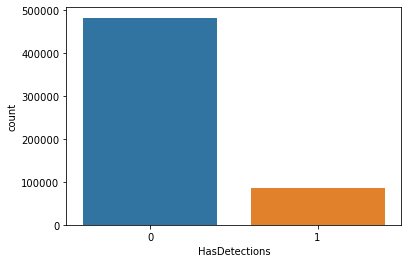

From total data  15.0 %  Malware Detected
From total data  85.0 % Malware Not Detected


In [3]:
# using countplot on HasDetections we can see it is highly imbalanced data
sns.countplot(train['HasDetections'])
plt.show()
print('From total data ',np.round(train[train['HasDetections']==1].shape[0]/train.shape[0]*100,2),'%  Malware Detected')
print('From total data ',np.round(train[train['HasDetections']==0].shape[0]/train.shape[0]*100,2),'% Malware Not Detected')

### Analysis of IsBeta - Defender state information e.g. false

In [12]:
train.IsBeta.value_counts()

0    567726
1         4
Name: IsBeta, dtype: int64

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Test')

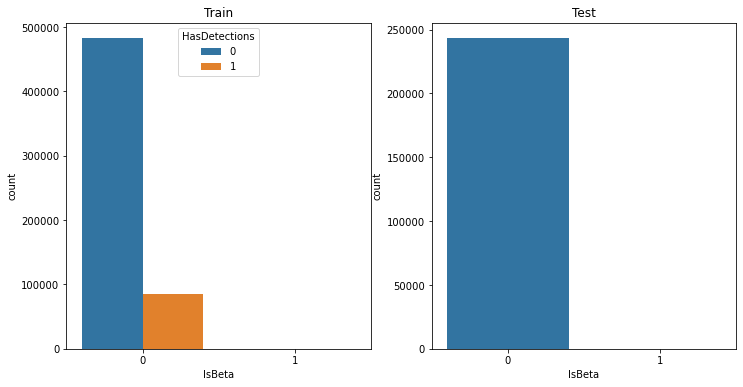

In [14]:
# plotting graph for train and test data
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(train["IsBeta"],hue=train["HasDetections"])
plt.title('Train')
plt.subplot(1,2,2)
sns.countplot(test["IsBeta"])
plt.title('Test')

In [15]:
train[train['IsBeta'] == 1]['HasDetections']

34101     0
98411     0
319509    0
489048    0
Name: HasDetections, dtype: int64

In [17]:
train["IsBeta"].isnull().sum() ## no null values

0

#### so from above analysis we can say if IsBeta =1 them there is no malware Detection

### Analysis of RtpStateBitfield - (Most likely - RTP state: (Enabled or Disabled) source. Expected binary values, don't understand why values are multiple integers though. 

In [18]:
train.RtpStateBitfield.value_counts()

7.0    548008
0.0     14285
5.0      1946
8.0       929
3.0       218
1.0       107
Name: RtpStateBitfield, dtype: int64

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Test')

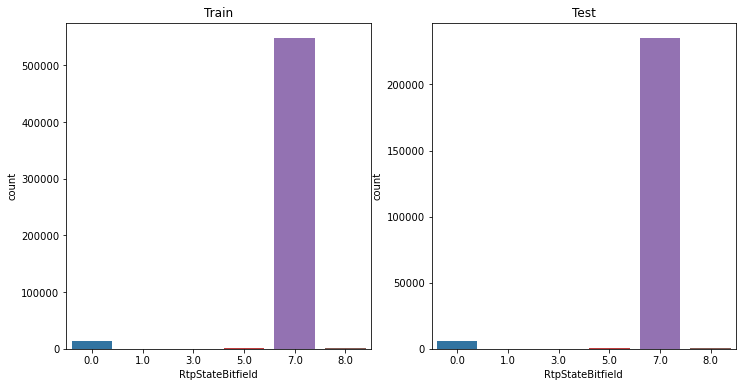

In [19]:
# plotting graph for train and test data
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(train["RtpStateBitfield"])
plt.title('Train')
plt.subplot(1,2,2)
sns.countplot(test["RtpStateBitfield"])
plt.title('Test')

Text(0.5, 1.0, 'Train')

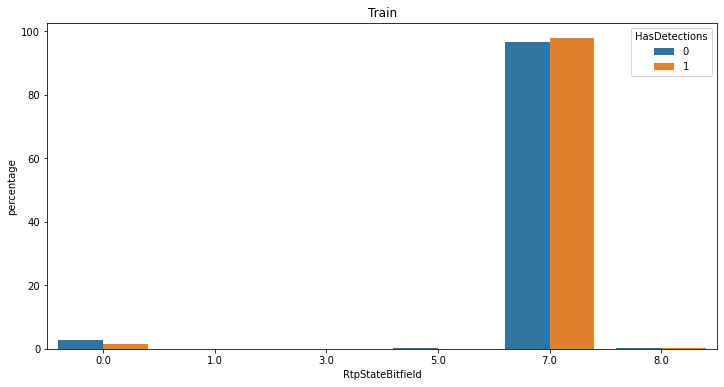

In [21]:
# percentage plot
plt.figure(figsize=(12,6))
train_card4 = (train[~train['RtpStateBitfield'].isnull()].groupby(['HasDetections'])['RtpStateBitfield']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
sns.barplot(x="RtpStateBitfield", y="percentage", hue="HasDetections", data=train_card4)
plt.title('Train')

In [22]:
train["RtpStateBitfield"].isnull().sum()

2237

In [23]:
# fill null value with 7
#train['RtpStateBitfield'].fillna(7,inplace=True)
#test['RtpStateBitfield'].fillna(7,inplace=True)

### Analysis of IsSxsPassiveMode  - Google searches suggest that this a active/passive mode of operation for Windows Defender. If another third party primary antivirus exists on the system, the Defender enters Passive mode. Passive mode obviously offers reduced functionality.

In [26]:
train. IsSxsPassiveMode.value_counts()

0    556047
1     11683
Name: IsSxsPassiveMode, dtype: int64

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Test')

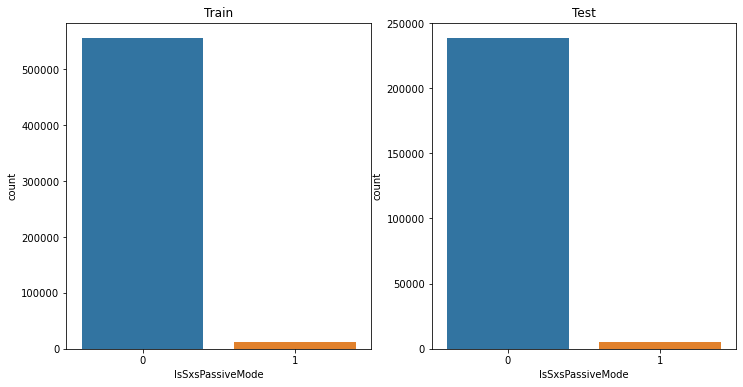

In [27]:
# plotting graph for train and test data
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(train["IsSxsPassiveMode"])
plt.title('Train')
plt.subplot(1,2,2)
sns.countplot(test["IsSxsPassiveMode"])
plt.title('Test')

Text(0.5, 1.0, 'Train')

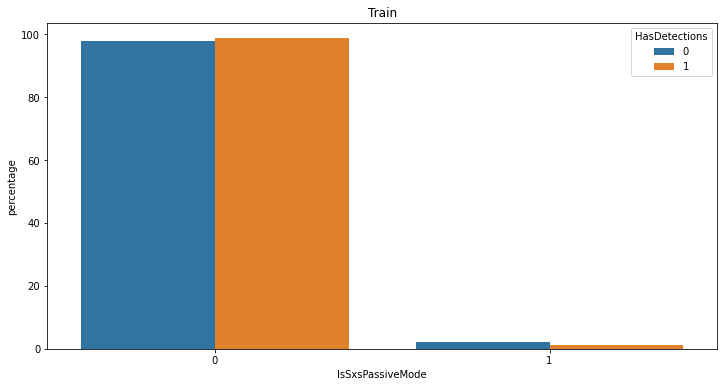

In [29]:
# percentage plot
plt.figure(figsize=(12,6))
train_card4 = (train[~train['IsSxsPassiveMode'].isnull()].groupby(['HasDetections'])['IsSxsPassiveMode']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
sns.barplot(x="IsSxsPassiveMode", y="percentage", hue="HasDetections", data=train_card4)
plt.title('Train')

In [30]:
train["IsSxsPassiveMode"].isnull().sum()

0

### Analysis Of DefaultBrowsersIdentifier - ID for the machine's default browser. [This column has 2017 unique values, so these couldn't be direct browser name mappings. So probably, a browser-version combination ? 

#### Contains  ID for the machine's default browser

In [55]:
train.DefaultBrowsersIdentifier.value_counts()

239.0     2644
3195.0    2481
1632.0    2083
3176.0    1723
146.0     1597
1910.0    1472
1727.0    1181
2064.0     970
2725.0     954
1536.0     868
788.0      780
1160.0     769
1078.0     714
1623.0     643
1823.0     536
614.0      470
2290.0     466
2273.0     437
2388.0     408
773.0      365
1622.0     354
1161.0     352
139.0      339
2168.0     302
1616.0     296
1926.0     291
2434.0     253
2170.0     199
2169.0     187
597.0      172
2182.0     157
2726.0     154
890.0      145
2987.0     139
2460.0     128
508.0      124
168.0      123
1991.0     122
223.0      117
1628.0     116
1071.0     108
1079.0     103
1870.0     101
2189.0      92
1952.0      92
311.0       89
1351.0      77
3000.0      72
2724.0      68
230.0       60
1066.0      57
1118.0      56
351.0       51
253.0       51
2373.0      51
1909.0      48
721.0       48
2620.0      42
1529.0      41
1719.0      40
2422.0      39
645.0       37
339.0       35
2421.0      35
132.0       34
430.0       33
2272.0    

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

Text(0.5, 1.0, 'Test')

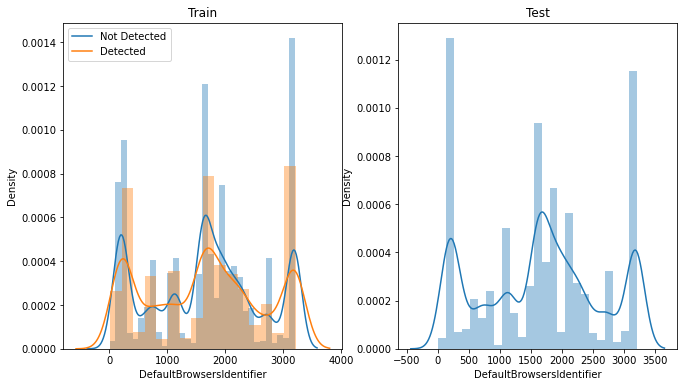

In [31]:
plt.figure(figsize=(11,6))
plt.subplot(1,2,1)
sns.distplot(train[(train['HasDetections']==0) & (~train['DefaultBrowsersIdentifier'].isnull())]['DefaultBrowsersIdentifier'])
sns.distplot(train[(train['HasDetections']==1) & (~train['DefaultBrowsersIdentifier'].isnull())]['DefaultBrowsersIdentifier'])
plt.legend(['Not Detected','Detected'])
plt.title('Train')
plt.subplot(1,2,2)
sns.distplot(test[~test['DefaultBrowsersIdentifier'].isnull()]['DefaultBrowsersIdentifier'])
plt.title('Test')

#### Doesnot find any interesting result and columns contains large null value count  so we can drop it 

In [32]:
#del train['Analysis Of DefaultBrowsersIdentifier']
#del test['Analysis Of DefaultBrowsersIdentifier']

In [35]:
print(train["DefaultBrowsersIdentifier"].isnull().sum())
test["DefaultBrowsersIdentifier"].isnull().sum()

538417


230705

###  Analysis of AVProductStatesIdentifier

####  Contains ID for the specific configuration of a user's antivirus software

In [36]:
train.AVProductStatesIdentifier.value_counts()

53447.0    341257
7945.0      36683
47238.0     21831
62773.0     19679
41571.0      8181
46413.0      7300
49480.0      7274
23657.0      7189
29199.0      4740
51954.0      4122
3371.0       3271
22728.0      3078
6630.0       2915
46669.0      2784
40431.0      2385
43856.0      2362
43927.0      2359
61343.0      2174
68585.0      2085
56914.0      1843
12202.0      1813
24213.0      1727
11280.0      1690
61100.0      1387
9471.0       1321
48510.0      1261
40535.0      1160
23141.0      1028
53386.0      1013
42652.0       941
2558.0        930
54229.0       922
59792.0       901
63682.0       889
46901.0       864
44141.0       839
50397.0       742
43581.0       737
45507.0       727
70262.0       623
7681.0        623
32113.0       593
7073.0        582
61859.0       570
46184.0       527
13513.0       488
38993.0       481
47892.0       477
23796.0       472
43807.0       471
52365.0       468
53644.0       446
61168.0       440
62412.0       436
46545.0       428
6407.0    

In [37]:
train.AVProductStatesIdentifier.describe()

count    565058.000000
mean      46659.580117
std       15299.595174
min          16.000000
25%       47238.000000
50%       53447.000000
75%       53447.000000
max       70492.000000
Name: AVProductStatesIdentifier, dtype: float64

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

Text(0.5, 1.0, 'Test')

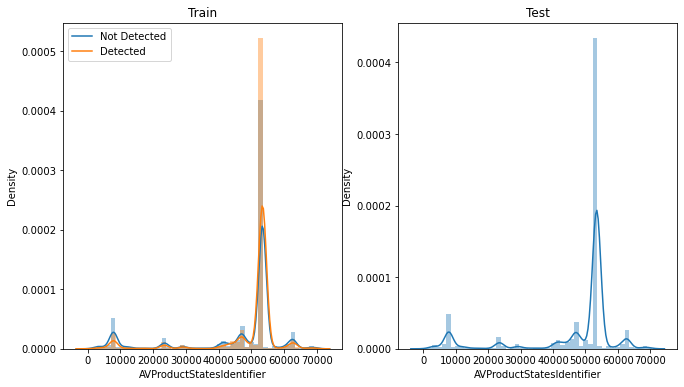

In [38]:
plt.figure(figsize=(11,6))
plt.subplot(1,2,1)
sns.distplot(train[(train['HasDetections']==0) & (~train['AVProductStatesIdentifier'].isnull())]['AVProductStatesIdentifier'])
sns.distplot(train[(train['HasDetections']==1) & (~train['AVProductStatesIdentifier'].isnull())]['AVProductStatesIdentifier'])
plt.legend(['Not Detected','Detected'])
plt.title('Train')
plt.subplot(1,2,2)
sns.distplot(test[~test['AVProductStatesIdentifier'].isnull()]['AVProductStatesIdentifier'])
plt.title('Test')

In [39]:
# fill null values with mode of a column
train['AVProductStatesIdentifier'].fillna(train['AVProductStatesIdentifier'].mode()[0], inplace=True)
test['AVProductStatesIdentifier'].fillna(test['AVProductStatesIdentifier'].mode()[0], inplace=True)

### Analysis of AVProductsInstalled 
#### Assuming this to be the number of anti-virus products installed. 90% of the machines have 1-2 products installed. We should probably drop the one row with 0 AVProductsInstalled. Again, "probably".

In [40]:
train.AVProductsInstalled.value_counts()

1.0    367973
2.0    179179
3.0     17132
4.0       736
5.0        34
6.0         4
Name: AVProductsInstalled, dtype: int64

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Test')

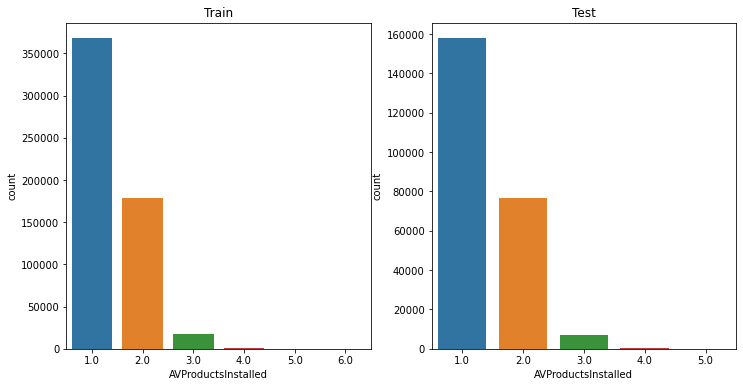

In [41]:
# plotting graph for train and test data
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(train["AVProductsInstalled"])
plt.title('Train')
plt.subplot(1,2,2)
sns.countplot(test["AVProductsInstalled"])
plt.title('Test')

Text(0.5, 1.0, 'Train')

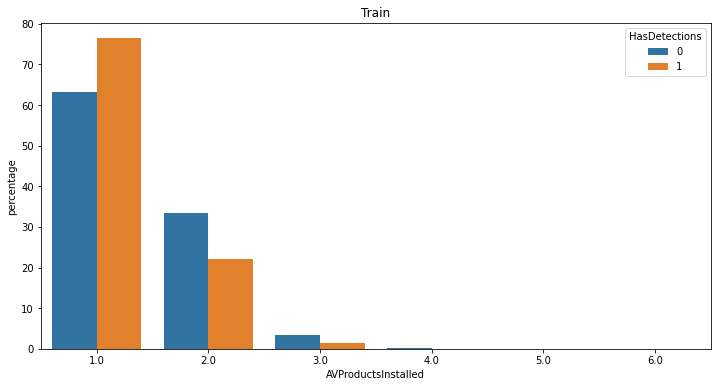

In [42]:
# percentage plot
plt.figure(figsize=(12,6))
train_card4 = (train[~train['AVProductsInstalled'].isnull()].groupby(['HasDetections'])['AVProductsInstalled']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
sns.barplot(x="AVProductsInstalled", y="percentage", hue="HasDetections", data=train_card4)
plt.title('Train')

#### From above plot we can see product installed value = 1 have higher rate for Malware being detected  in machine

In [43]:
train[train['AVProductsInstalled'] == 5]['HasDetections']

8826      0
36796     0
38745     0
42589     0
94868     0
129370    0
132820    0
133122    0
159735    0
162449    0
203259    0
203547    0
230872    0
254931    0
262014    0
315918    0
317474    0
343855    0
366117    0
367927    0
370536    0
381306    0
391925    0
413561    1
429107    0
431448    0
444585    0
491445    0
500058    0
518216    0
523767    0
530346    0
542868    0
548692    0
Name: HasDetections, dtype: int64

####  we can see product installed value = 5 have higher chances  for machine not being hit Malware.

In [47]:
train[train['AVProductsInstalled'] == 6]['HasDetections']

64536     0
178760    0
272446    0
285748    1
Name: HasDetections, dtype: int64

In [51]:
train["AVProductsInstalled"].isnull().sum()

2672

In [53]:
test["AVProductsInstalled"].isnull().sum()

1112

In [54]:
#fill na with a -ve val to indicate no antivirus
#train['AVProductsInstalled'].fillna(-99, inplace=True)
#test['AVProductsInstalled'].fillna(-99, inplace=True)

### Analysis of AVProductsEnabled 

In [55]:
train.AVProductsEnabled.value_counts()

1.0    546935
2.0     15713
0.0      1932
3.0       440
4.0        37
5.0         1
Name: AVProductsEnabled, dtype: int64

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Test')

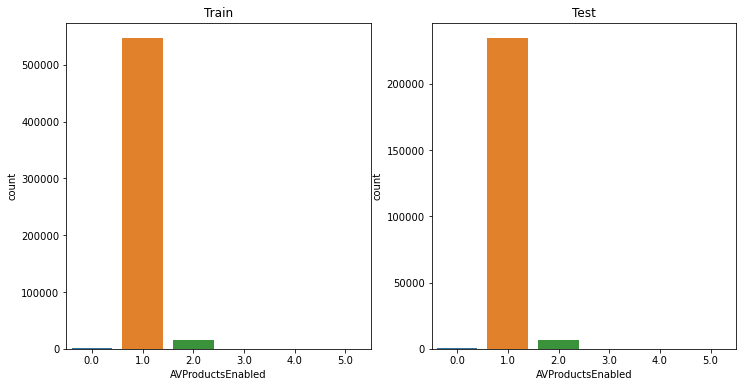

In [56]:
# plotting graph for train and test data
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(train["AVProductsEnabled"])
plt.title('Train')
plt.subplot(1,2,2)
sns.countplot(test["AVProductsEnabled"])
plt.title('Test')

Text(0.5, 1.0, 'Train')

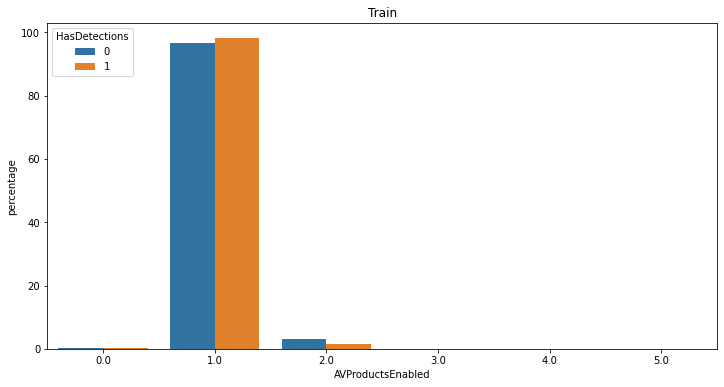

In [3]:
# percentage plot
plt.figure(figsize=(12,6))
train_card4 = (train[~train['AVProductsEnabled'].isnull()].groupby(['HasDetections'])['AVProductsEnabled']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
sns.barplot(x="AVProductsEnabled", y="percentage", hue="HasDetections", data=train_card4)
plt.title('Train')

In [ ]:
# fill null vals with ??

In [58]:
# fill Null values with mode of a column
#train['AVProductsEnabled'].fillna(train['AVProductsEnabled'].mode()[0], inplace=True)
#test['AVProductsEnabled'].fillna(test['AVProductsEnabled'].mode()[0], inplace=True)

### Analysis of HasTpm
#### True if machine has tpm. A Trusted Platform Module (TPM) is a specialized chip on an endpoint device that stores RSA encryption keys specific to the host system for hardware authentication. Each TPM chip contains an RSA key pair called the Endorsement Key (EK). The pair is maintained inside the chip and cannot be accessed by software.

In [83]:
train.HasTpm.value_counts()

1    560658
0      7072
Name: HasTpm, dtype: int64

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Test')

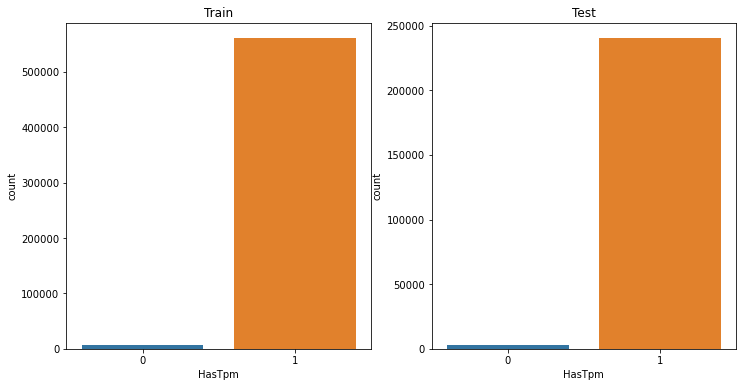

In [59]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(train["HasTpm"])
plt.title('Train')
plt.subplot(1,2,2)
sns.countplot(test["HasTpm"])
plt.title('Test')

Text(0.5, 1.0, 'Train')

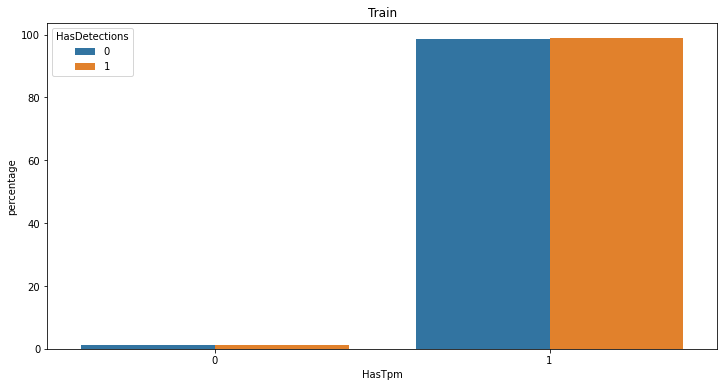

In [61]:
# percentage plot
plt.figure(figsize=(12,6))
train_card4 = (train[~train['HasTpm'].isnull()].groupby(['HasDetections'])['HasTpm']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
sns.barplot(x="HasTpm", y="percentage", hue="HasDetections", data=train_card4)
plt.title('Train')

In [62]:
train["HasTpm"].isnull().sum()

0

#### Doesnot  contain any interesting results but may be combined with other feature to find interesting results

### Analysis of  CountryIdentifier 

####  Contains ID for the country the machine is located in 

In [86]:
train.CountryIdentifier.value_counts()

43     24755
29     22009
141    20620
93     18408
171    17866
60     15019
66     13778
207    13763
201    13652
97     12626
158    11420
44     11203
89     11099
9      10987
107    10860
68     10571
51     10560
214    10255
203    10129
41      9791
35      9232
142     8621
160     8595
149     8388
195     7806
205     7267
164     7064
155     6602
173     6105
88      5622
220     5551
12      5496
159     5491
101     5485
169     5378
59      5192
91      5118
50      4946
80      4833
19      4568
2       4485
84      4268
177     4079
57      3956
11      3805
18      3434
178     3411
39      3348
110     3193
45      3024
21      3016
95      2903
53      2869
180     2802
150     2675
147     2660
86      2654
211     2641
55      2457
122     2438
81      2410
90      2393
94      2280
33      2269
170     2257
118     2190
154     2145
152     2128
179     2070
115     2018
62      2008
56      1928
108     1891
167     1845
188     1767
120     1765
151     1758

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

Text(0.5, 1.0, 'Test')

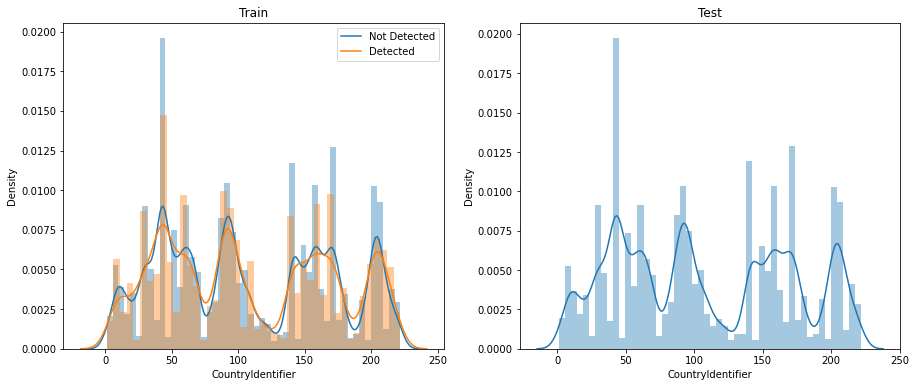

In [63]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(train[(train['HasDetections']==0) & (~train['CountryIdentifier'].isnull())]['CountryIdentifier'])
sns.distplot(train[(train['HasDetections']==1) & (~train['CountryIdentifier'].isnull())]['CountryIdentifier'])
plt.legend(['Not Detected','Detected'])
plt.title('Train')
plt.subplot(1,2,2)
sns.distplot(test[~test['CountryIdentifier'].isnull()]['CountryIdentifier'])
plt.title('Test')

In [64]:
train["CountryIdentifier"].isnull().sum()

0

###  Analysis of CityIdentifier  

####  Contains  ID for the city the machine is located in

In [65]:
train.CityIdentifier.value_counts()

130775.0    5925
16668.0     5301
82373.0     4957
10222.0     4426
143782.0    4242
66202.0     3967
92213.0     3818
61668.0     3633
136271.0    3392
66953.0     3375
96401.0     3355
22656.0     3268
58607.0     3132
74924.0     2940
39800.0     2596
143155.0    2568
20805.0     2433
37376.0     2247
67513.0     2227
20710.0     2197
159247.0    2112
77794.0     2022
87401.0     2018
75528.0     1993
56441.0     1966
86819.0     1946
13354.0     1931
90994.0     1891
5433.0      1858
62396.0     1792
133897.0    1782
26735.0     1723
95362.0     1681
117594.0    1648
117751.0    1629
7182.0      1598
4785.0      1576
77866.0     1544
167.0       1530
31735.0     1528
155216.0    1528
666.0       1518
110905.0    1510
860.0       1484
124736.0    1482
68380.0     1471
130897.0    1460
98692.0     1447
128739.0    1444
97401.0     1405
70124.0     1401
120917.0    1401
129332.0    1386
142110.0    1338
24475.0     1331
111347.0    1326
12607.0     1305
64168.0     1294
165477.0    12

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

Text(0.5, 1.0, 'Test')

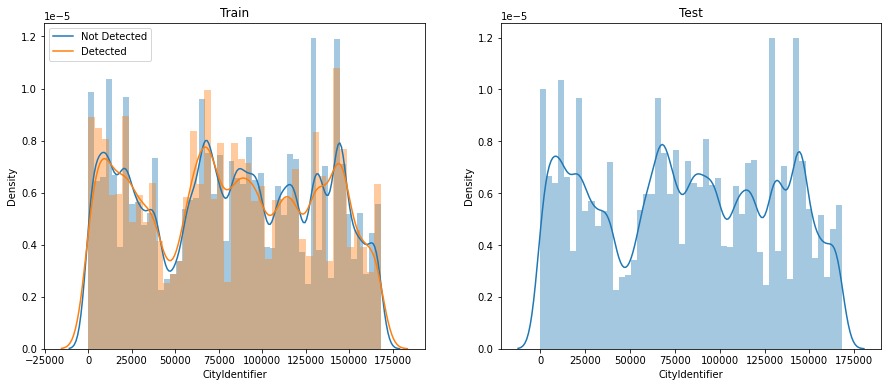

In [13]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(train[(train['HasDetections']==0) & (~train['CityIdentifier'].isnull())]['CityIdentifier'])
sns.distplot(train[(train['HasDetections']==1) & (~train['CityIdentifier'].isnull())]['CityIdentifier'])
plt.legend(['Not Detected','Detected'])
plt.title('Train')
plt.subplot(1,2,2)
sns.distplot(test[~test['CityIdentifier'].isnull()]['CityIdentifier'])
plt.title('Test')

In [14]:
train["CityIdentifier"].isnull().sum()

20938

In [71]:
# fillna with -666 should not matter 
#train['CityIdentifier'].fillna(-666, inplace=True)
#test['CityIdentifier'].fillna(-666, inplace=True)

### Analysis Of  OrganizationIdentifier

#### Contains ID for the organization the machine belongs in 
#### ID for the organization the machine belongs in, organization ID is mapped to both specific companies and broad industries. There are 49 unique organisations, 50% of the computers being under one org, another 25% not-classified.

In [4]:
train.OrganizationIdentifier.value_counts()

27.0    268832
18.0    110937
48.0      4114
50.0      2457
37.0      1253
11.0      1240
49.0       939
46.0       692
14.0       349
32.0       275
33.0       236
36.0       227
52.0       194
2.0        194
5.0        141
40.0       122
28.0       104
4.0         88
10.0        77
1.0         68
51.0        49
20.0        47
21.0        44
8.0         40
6.0         37
39.0        31
3.0         30
31.0        28
22.0        24
47.0        21
16.0        18
26.0        15
19.0        14
42.0        10
44.0         8
7.0          6
45.0         5
29.0         5
35.0         5
41.0         4
30.0         4
25.0         3
43.0         2
23.0         2
Name: OrganizationIdentifier, dtype: int64

Text(0.5, 1.0, 'Train')

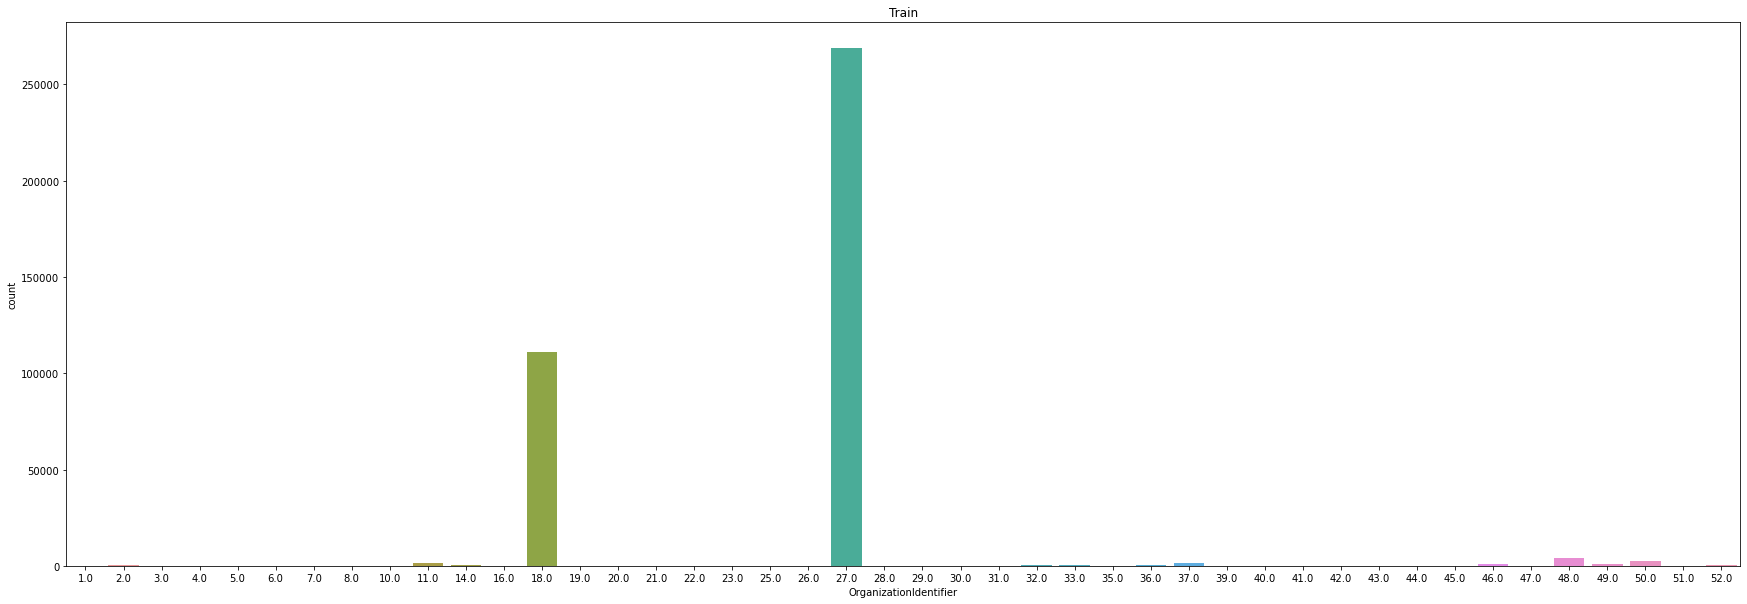

In [12]:
plt.figure(figsize=(30,10))
sns.countplot(train["OrganizationIdentifier"])
plt.title('Train')


Text(0.5, 1.0, 'Train')

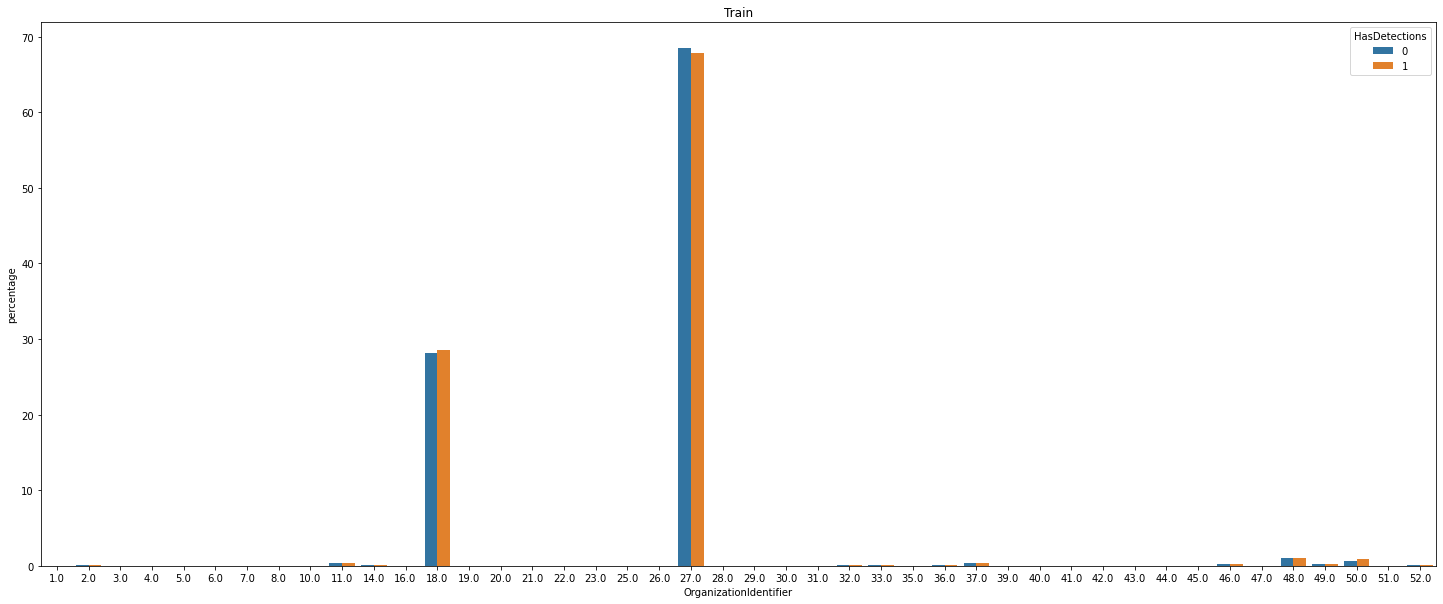

In [16]:
# percentage plot
plt.figure(figsize=(25,10))
train_card4 = (train[~train['OrganizationIdentifier'].isnull()].groupby(['HasDetections'])['OrganizationIdentifier']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
sns.barplot(x="OrganizationIdentifier", y="percentage", hue="HasDetections", data=train_card4)
plt.title('Train')

In [18]:
train["OrganizationIdentifier"].isnull().sum()

174739

In [ ]:
#fill with mode or some default value

### Analysis Of  GeoNameIdentifier 

####  Contains ID for the geographic region a machine is located in  

In [17]:
train.GeoNameIdentifier.value_counts()

277.0    95678
211.0    26762
53.0     25204
89.0     23964
240.0    22087
         ...  
61.0         1
37.0         1
106.0        1
42.0         1
54.0         1
Name: GeoNameIdentifier, Length: 268, dtype: int64

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

Text(0.5, 1.0, 'Test')

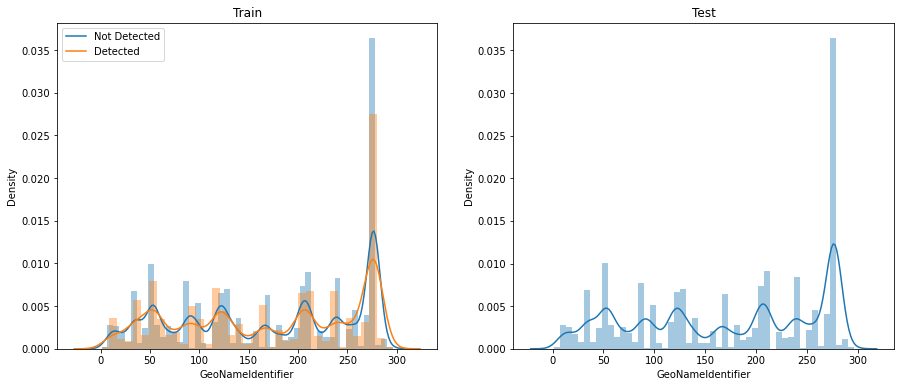

In [20]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(train[(train['HasDetections']==0) & (~train['GeoNameIdentifier'].isnull())]['GeoNameIdentifier'])
sns.distplot(train[(train['HasDetections']==1) & (~train['GeoNameIdentifier'].isnull())]['GeoNameIdentifier'])
plt.legend(['Not Detected','Detected'])
plt.title('Train')
plt.subplot(1,2,2)
sns.distplot(test[~test['GeoNameIdentifier'].isnull()]['GeoNameIdentifier'])
plt.title('Test')

In [22]:
train["GeoNameIdentifier"].isnull().sum()

16

In [ ]:
#fill with mode

### Analysis LocaleEnglishNameIdentifier  

#### Contains English name of Locale ID of the current user
####  English name of Locale ID of the current user. The column contains 276 locale int64 IDs. "A locale is neither a language nor a country, the same language may be spoken in multiple countries (often with subtle differences) and a single country may speak multiple languages. A locale is therefore an area where a particular language is spoken which may (or may not) align with geographical and/or political boundaries."

In [18]:
train.LocaleEnglishNameIdentifier.value_counts()

75     130117
182     28420
74      27570
42      25264
88      25095
        ...  
205         1
220         1
86          1
131         1
54          1
Name: LocaleEnglishNameIdentifier, Length: 237, dtype: int64

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

Text(0.5, 1.0, 'Test')

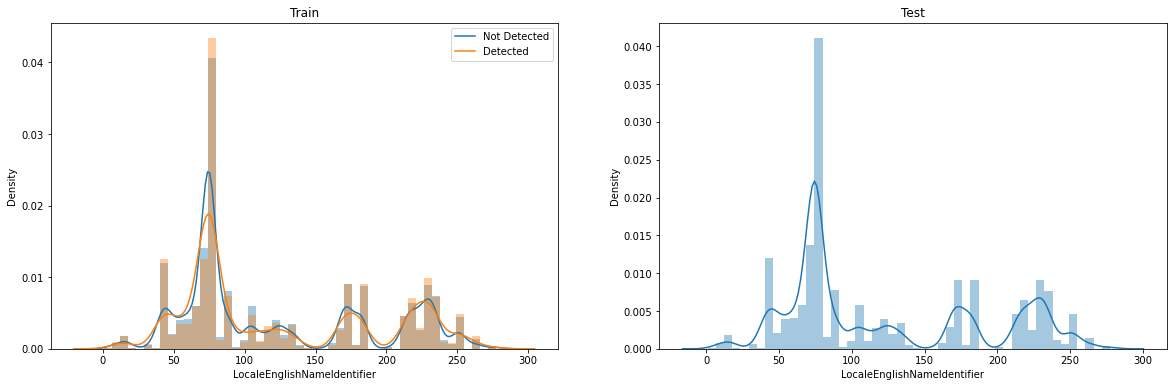

In [23]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(train[(train['HasDetections']==0) & (~train['LocaleEnglishNameIdentifier'].isnull())]['LocaleEnglishNameIdentifier'])
sns.distplot(train[(train['HasDetections']==1) & (~train['LocaleEnglishNameIdentifier'].isnull())]['LocaleEnglishNameIdentifier'])
plt.legend(['Not Detected','Detected'])
plt.title('Train')
plt.subplot(1,2,2)
sns.distplot(test[~test['LocaleEnglishNameIdentifier'].isnull()]['LocaleEnglishNameIdentifier'])
plt.title('Test')

In [24]:
train["LocaleEnglishNameIdentifier"].isnull().sum()

0

###  Analysis OsBuild  

#### Contains Build of the current operating system 

In [23]:
train.OsBuild.value_counts()

17134    242394
16299    160768
15063     50704
14393     49183
10586     27465
10240     17534
9600      12073
7601       6077
17692       227
17738       191
17744       153
17758        90
17746        86
17751        81
17713        80
17754        77
17735        57
17760        56
17741        53
17755        47
17763        41
17733        37
17672        35
17686        35
7600         34
17677        20
18234        19
17666        17
18237        13
17704        10
17682        10
17730         8
17711         6
18242         5
17747         5
17634         5
17655         4
17723         4
17650         3
18219         3
17643         3
17627         3
17661         2
17728         2
17689         1
18204         1
18241         1
17639         1
17753         1
17133         1
17618         1
18240         1
17604         1
17761         1
Name: OsBuild, dtype: int64

Text(0.5, 1.0, 'Train')

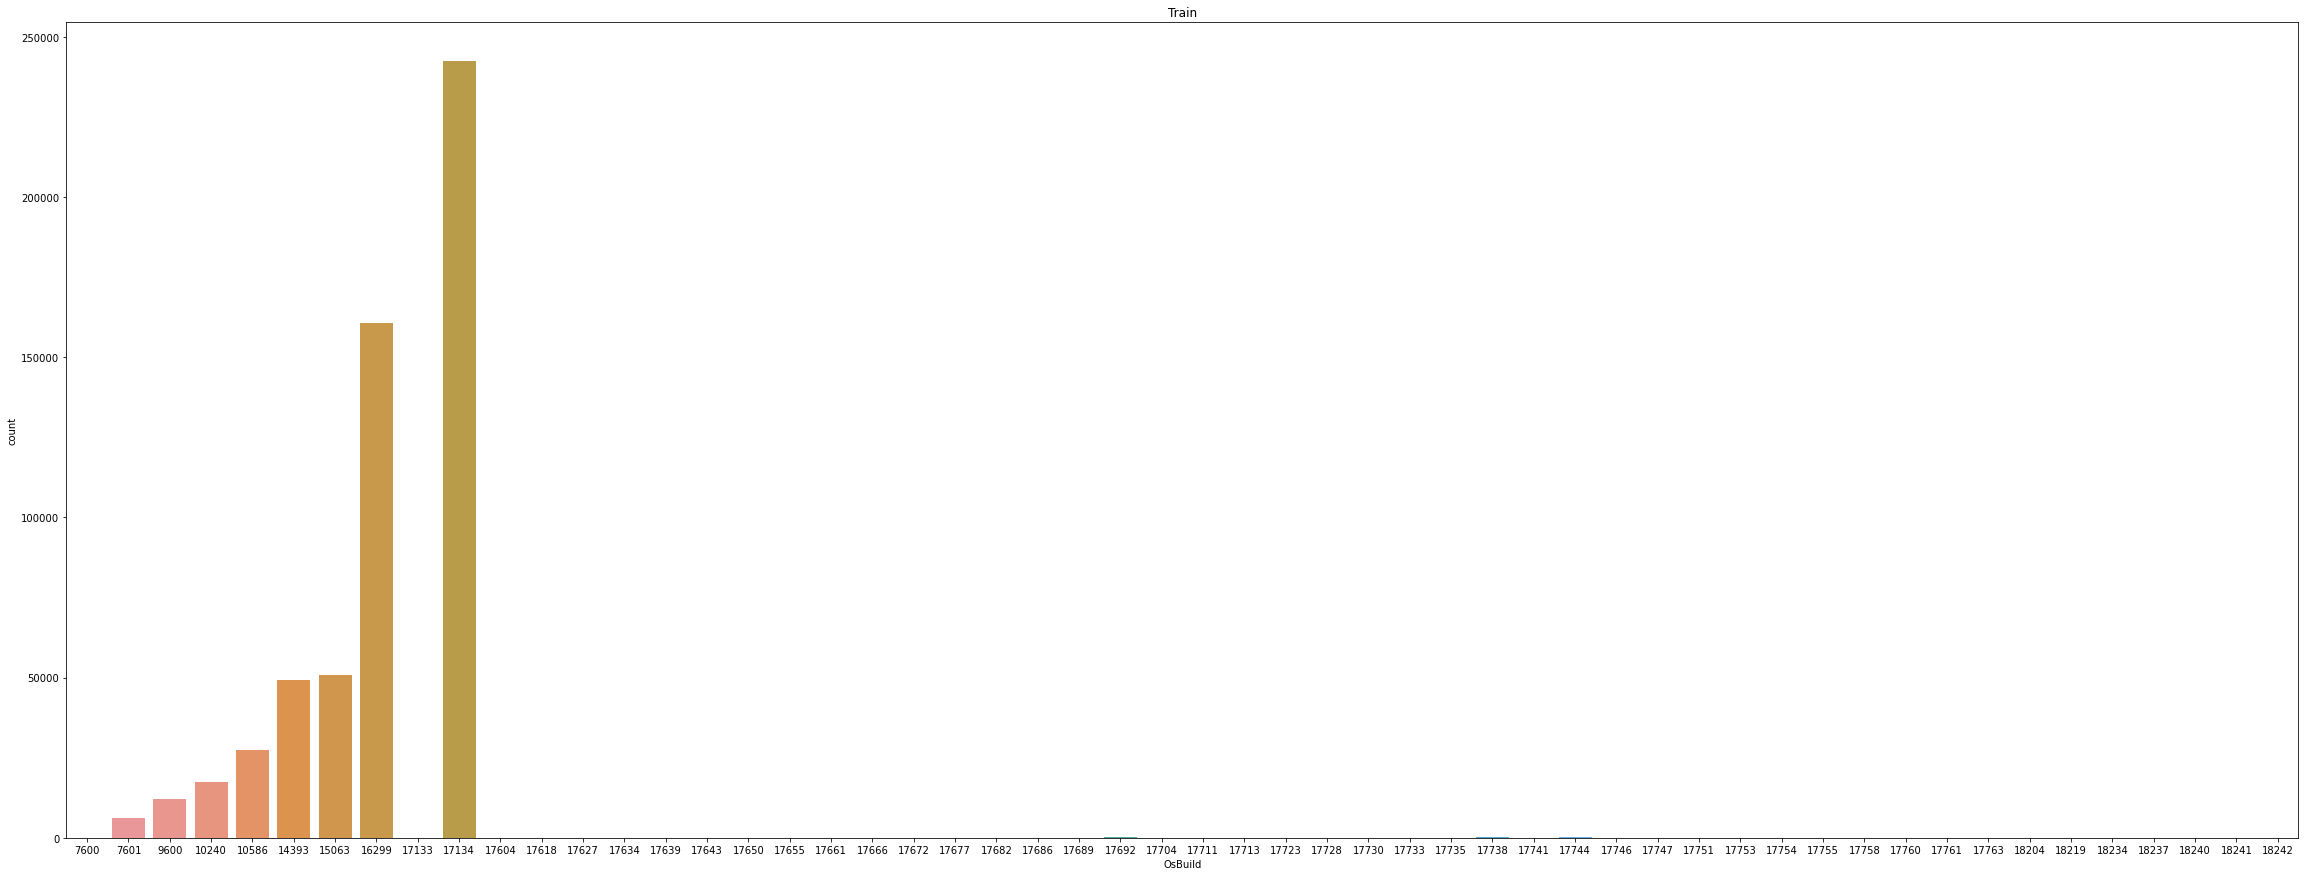

In [27]:
plt.figure(figsize=(40,15))
sns.countplot(train["OsBuild"])
plt.title('Train')


Text(0.5, 1.0, 'Train')

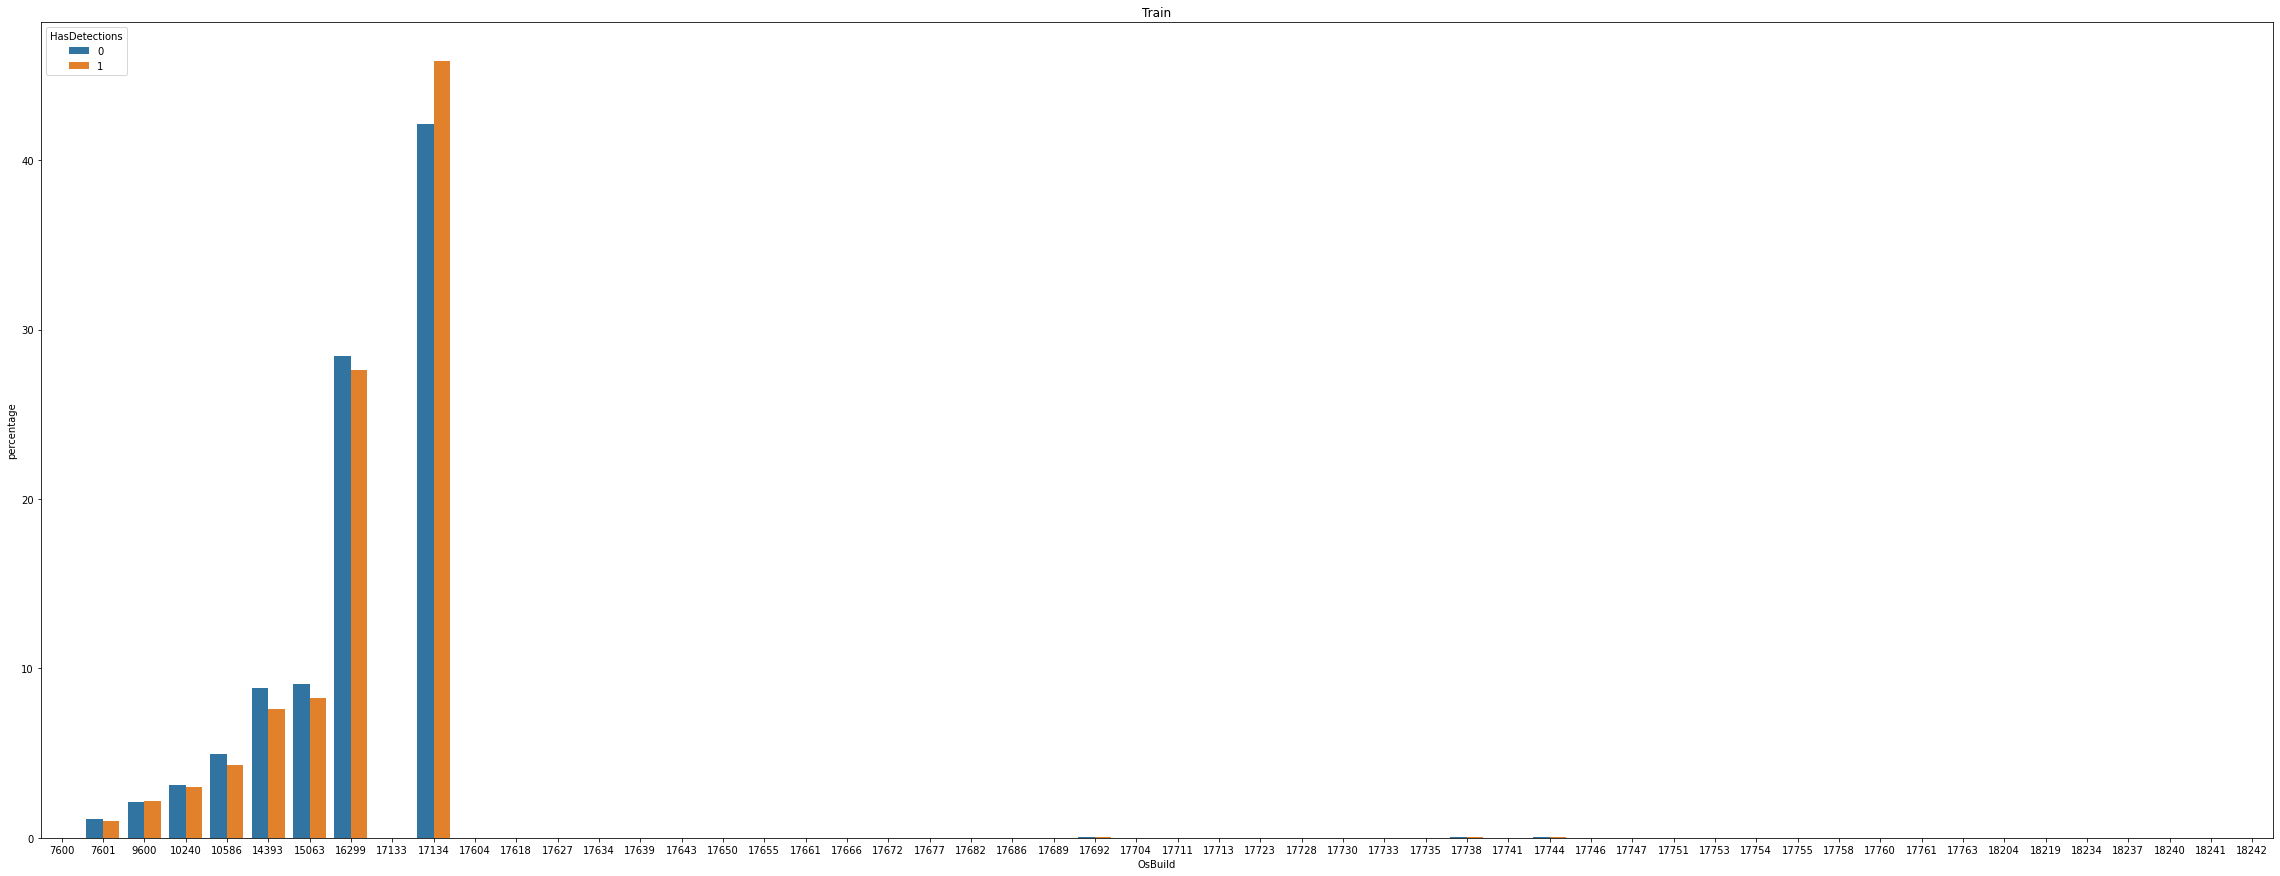

In [25]:
# percentage plot
plt.figure(figsize=(40,15))
train_card4 = (train[~train['OsBuild'].isnull()].groupby(['HasDetections'])['OsBuild']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
sns.barplot(x="OsBuild", y="percentage", hue="HasDetections", data=train_card4)
plt.title('Train')

In [26]:
top = train["OsBuild"].value_counts()
l = top[0:7]
l = l.keys()
df = train.loc[train["OsBuild"].isin(l)]
df.head(5)

MachineIdentifier   ProductName EngineVersion  \
0  6636016882e2dbc62ecbc8782c487ece  win8defender   1.1.14700.5   
1  ccf612deb9f1e9fd648a6a94213dfb08  win8defender   1.1.15100.1   
2  599373150c3a6f7ca7974d24cd9bba29  win8defender   1.1.15200.1   
3  55f5abcb72aef21237b86558097e5190  win8defender   1.1.15200.1   
4  4d6986ac61aa4740b817fe6e221c9caa  win8defender   1.1.15100.1   

         AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  4.12.17007.18022   1.265.416.0       0               7.0                 0   
1   4.18.1807.18075  1.273.1710.0       0               7.0                 0   
2   4.18.1807.18075   1.275.611.0       0               7.0                 0   
3   4.18.1807.18075   1.275.485.0       0               7.0                 0   
4    4.9.10586.1106  1.273.1668.0       0               7.0                 0   

   DefaultBrowsersIdentifier  AVProductStatesIdentifier  ...  \
0                        NaN                    65431.0  ...   
1                        NaN                    53447.0  ...   
2                        NaN                    23657.0  ...   
3                        NaN                    53447.0  ...   
4                        NaN                    53447.0  ...   

   Census_FirmwareVersionIdentifier  Census_IsSecureBootEnabled  \
0                            7314.0                           1   
1                           33778.0                           0   
2                           64578.0                           1   
3                           64415.0                           0   
4                            6585.0                           1   

   Census_IsWIMBootEnabled  Census_IsVirtualDevice  Census_IsTouchEnabled  \
0                      0.0                     0.0                      0   
1                      0.0                     0.0                      0   
2                      0.0                     0.0                      1   
3                      0.0                     0.0                      0   
4                      0.0                     0.0                      1   

   Census_IsPenCapable  Census_IsAlwaysOnAlwaysConnectedCapable  Wdft_IsGamer  \
0                    0                                      0.0           0.0   
1                    0                                      0.0           0.0   
2                    0                                      0.0           0.0   
3                    0                                      0.0           0.0   
4                    0                                      1.0           1.0   

  Wdft_RegionIdentifier HasDetections  
0                   9.0             0  
1                  15.0             1  
2                   1.0             0  
3                  15.0             0  
4                  15.0             0  

[5 rows x 83 columns]

Text(0.5, 1.0, 'Train')

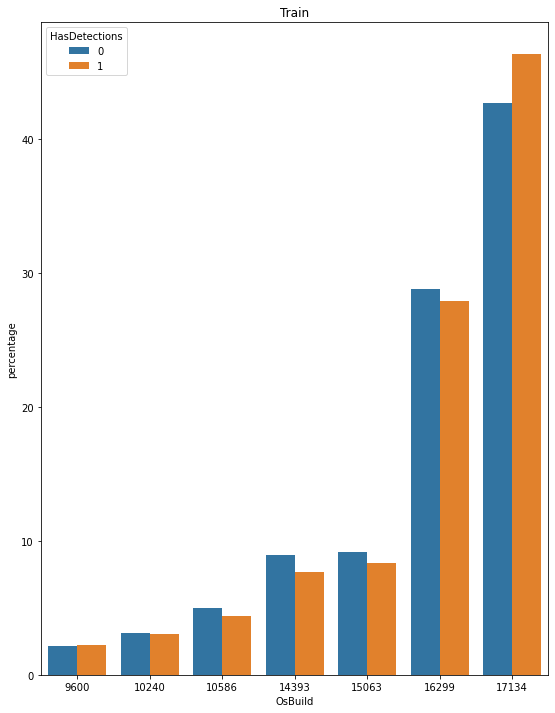

In [27]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
tr = (df[~df['OsBuild'].isnull()].groupby(['HasDetections'])['OsBuild']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('OsBuild'))

sns.barplot(x="OsBuild", y="percentage", hue="HasDetections", data=tr)
plt.title('Train')

In [28]:
train["OsBuild"].isnull().sum()

0

#### From above analysis we can see OsBuild 17134 has a higher malware detection percentage 

### Analysis Of  OsSuite  

#### Contains  Product suite mask for the current operating system

In [30]:
train.OsSuite.value_counts()

768    357939
256    208713
272       921
400        60
305        45
16         35
784        10
274         4
144         2
49          1
Name: OsSuite, dtype: int64

Text(0.5, 1.0, 'Train')

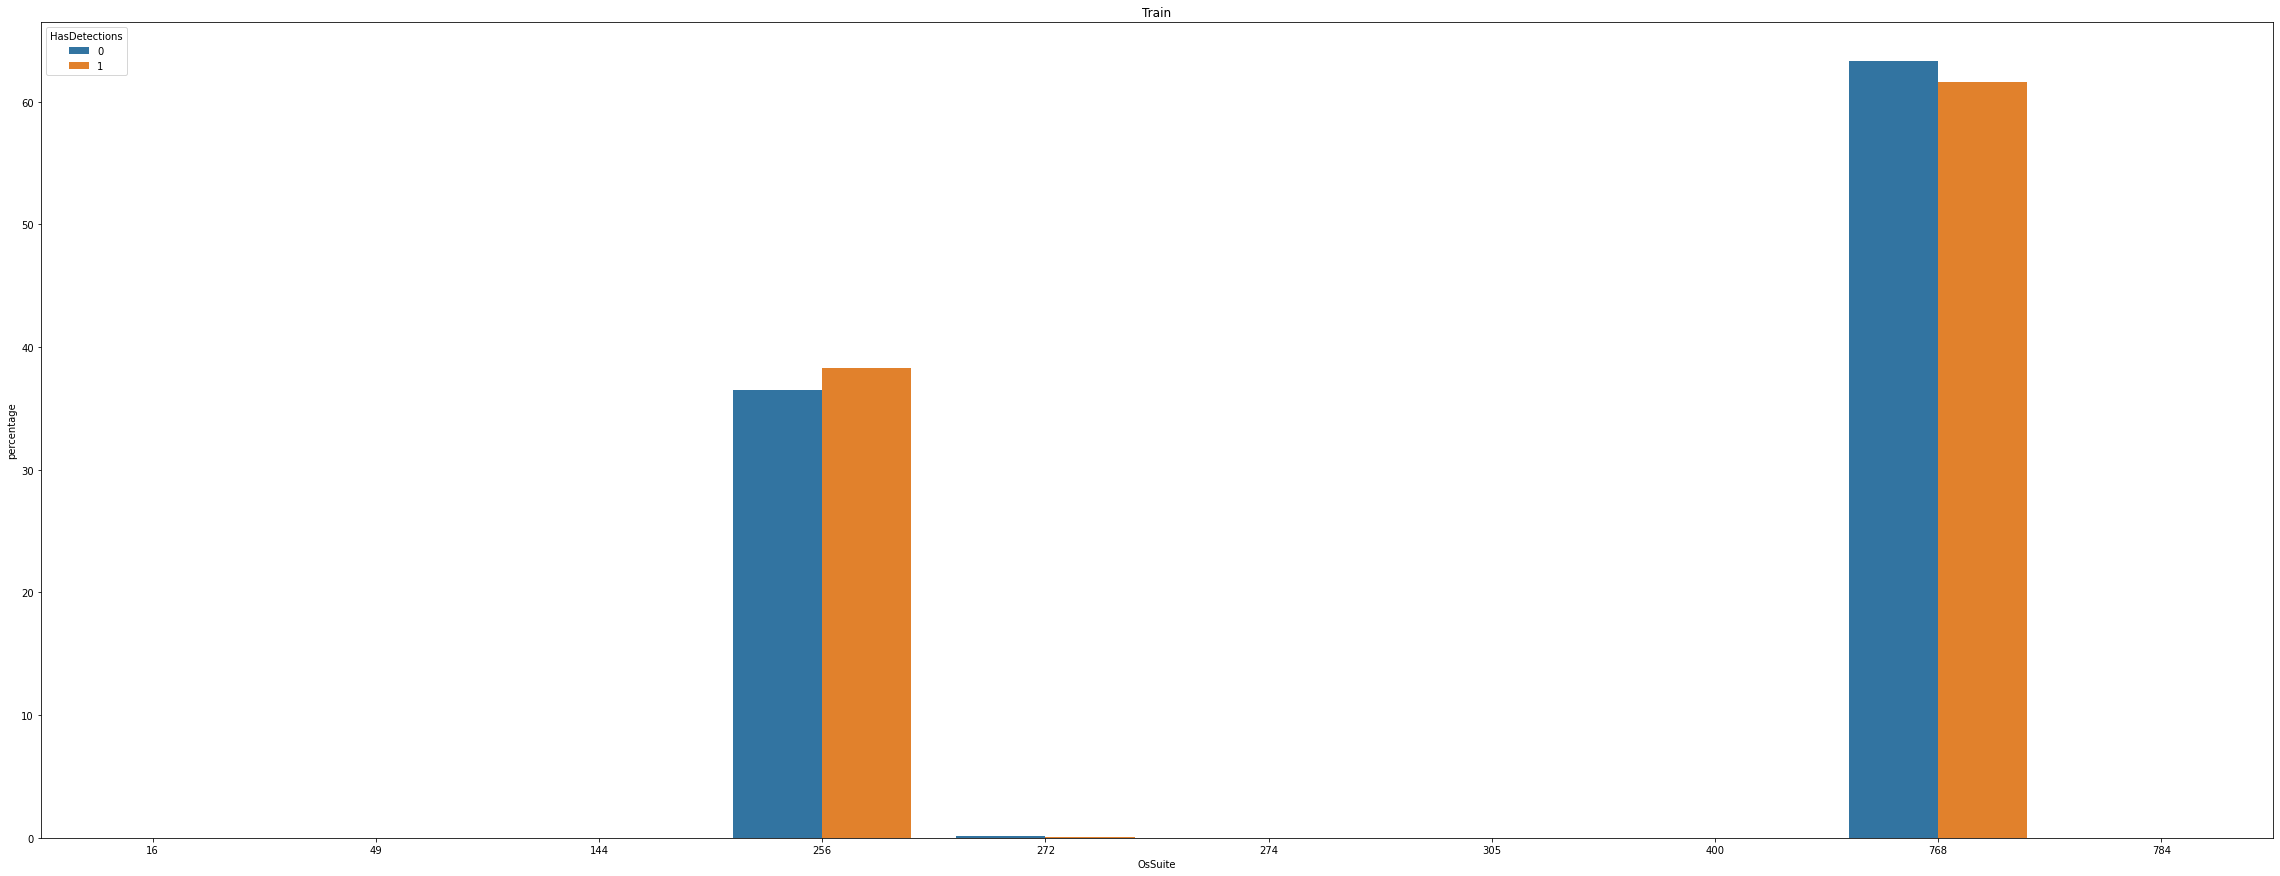

In [29]:
# percentage plot
plt.figure(figsize=(40,15))
train_card4 = (train[~train['OsSuite'].isnull()].groupby(['HasDetections'])['OsSuite']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
sns.barplot(x="OsSuite", y="percentage", hue="HasDetections", data=train_card4)
plt.title('Train')

In [30]:
train["OsSuite"].isnull().sum()

0

### Analysis Of IsProtected 

#### TRUE if there is at least one active and up-to-date antivirus product running on this machine. b. FALSE if there is no active AV product on this machine, or if the AV is active, but is not receiving the latest updates. c. null if there are no Anti Virus Products in the report. Returns: Whether a machine is protected. 

In [3]:
train.IsProtected.value_counts()

1.0    529404
0.0     35666
Name: IsProtected, dtype: int64

Text(0.5, 1.0, 'Test')

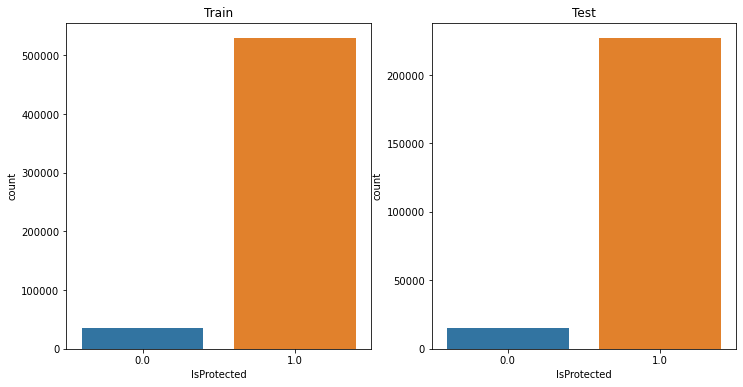

In [5]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(train["IsProtected"])
plt.title('Train')
plt.subplot(1,2,2)
sns.countplot(test["IsProtected"])
plt.title('Test')

Text(0.5, 1.0, 'Train')

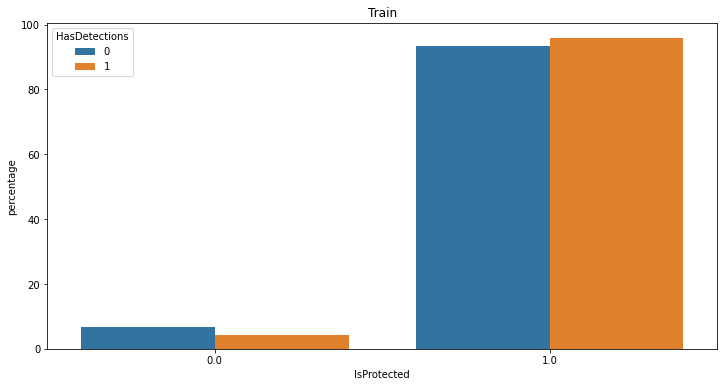

In [31]:
# percentage plot
plt.figure(figsize=(12,6))
train_card4 = (train[~train['IsProtected'].isnull()].groupby(['HasDetections'])['IsProtected']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
sns.barplot(x="IsProtected", y="percentage", hue="HasDetections", data=train_card4)
plt.title('Train')

In [33]:
train["IsProtected"].isnull().sum()

2660

In [34]:
test["IsProtected"].isnull().sum()

1107

In [ ]:
# for null assume not protected ?? 

### Analysis Of  AutoSampleOptIn

#### This is the SubmitSamplesConsent value passed in from the service  

In [7]:
train.AutoSampleOptIn.value_counts()

0    567721
1         9
Name: AutoSampleOptIn, dtype: int64

Text(0.5, 1.0, 'Train')

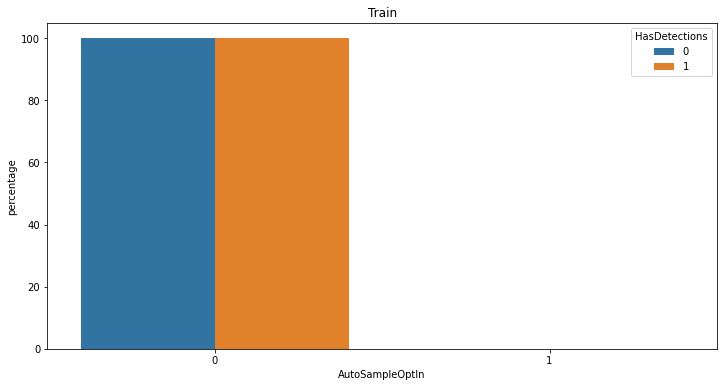

In [8]:
# percentage plot
plt.figure(figsize=(12,6))
train_card4 = (train[~train['AutoSampleOptIn'].isnull()].groupby(['HasDetections'])['AutoSampleOptIn']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
sns.barplot(x="AutoSampleOptIn", y="percentage", hue="HasDetections", data=train_card4)
plt.title('Train')

In [35]:
train[train['AutoSampleOptIn'] == 1]['HasDetections']

138168    0
167632    0
189113    0
200757    0
220881    0
335487    0
392734    0
425284    0
440017    1
Name: HasDetections, dtype: int64

In [36]:
train["AutoSampleOptIn"].isnull().sum()

0

### Analysis Of  SMode 

#### This field is set to true when the device is known to be in 'S Mode', as in, Windows 10 S mode, where only Microsoft Store apps can be installed 

In [10]:
train.SMode.value_counts()

0.0    529159
1.0       342
Name: SMode, dtype: int64

Text(0.5, 1.0, 'Train')

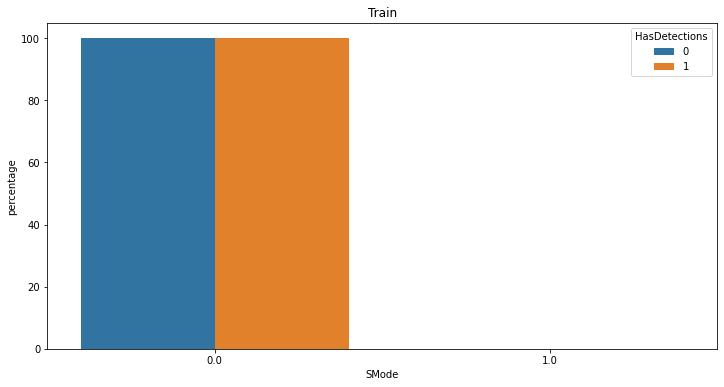

In [11]:
# percentage plot
plt.figure(figsize=(12,6))
train_card4 = (train[~train['SMode'].isnull()].groupby(['HasDetections'])['SMode']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
sns.barplot(x="SMode", y="percentage", hue="HasDetections", data=train_card4)
plt.title('Train')

In [37]:
# checking HasDetections for Smode  = 1
x = train[train['SMode'] == 1]
x['HasDetections'].value_counts()

0    330
1     12
Name: HasDetections, dtype: int64

In [38]:
train["SMode"].isnull().sum()

38229

In [ ]:
# fillna with 0 ,dist is 50/50

In [15]:
train['SMode'].fillna(0,inplace =True)
test['SMode'].fillna(0,inplace =True)

### IeVerIdentifier

#### Retrieves which version of Internet Explorer is running on this device

In [6]:
train.IeVerIdentifier.value_counts()

137.0    240517
117.0    113118
108.0     30969
111.0     29457
98.0      23470
135.0     14543
74.0      13823
53.0      13343
94.0      11624
105.0     10870
333.0      9497
107.0      8604
103.0      7907
96.0       5873
76.0       3732
71.0       2556
114.0      2552
323.0      2319
41.0       2146
335.0      1561
334.0      1367
87.0       1218
81.0        820
78.0        798
82.0        730
73.0        667
337.0       581
42.0        570
302.0       514
85.0        507
84.0        426
91.0        402
72.0        347
86.0        335
92.0        333
88.0        329
332.0       311
90.0        281
68.0        280
44.0        219
163.0       186
180.0       180
327.0       179
325.0       159
331.0       156
185.0       143
49.0        133
295.0       129
64.0        106
307.0       105
322.0       103
65.0         95
45.0         92
288.0        91
199.0        87
186.0        85
190.0        80
169.0        80
47.0         74
326.0        73
311.0        73
194.0        72
52.0    

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

Text(0.5, 1.0, 'Test')

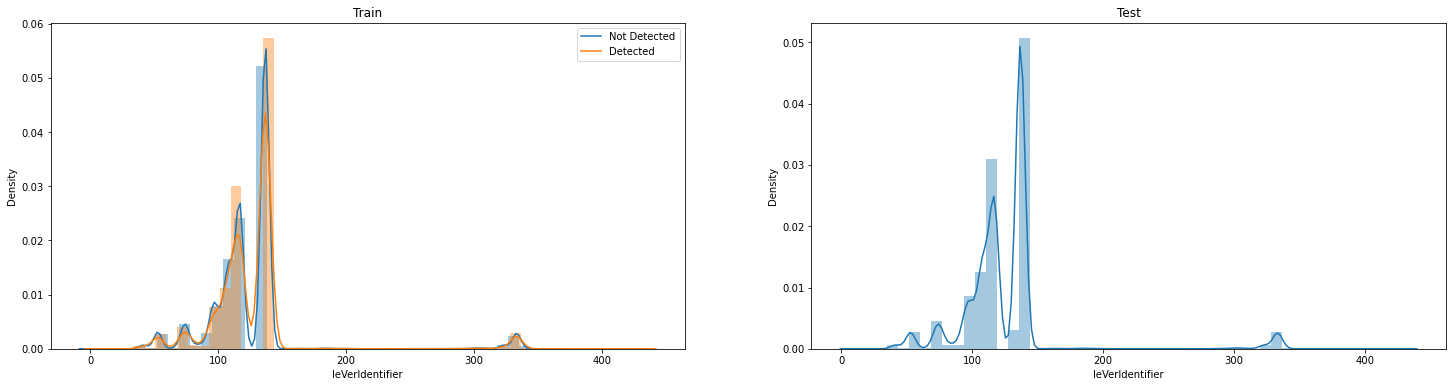

In [39]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.distplot(train[(train['HasDetections']==0) & (~train['IeVerIdentifier'].isnull())]['IeVerIdentifier'])
sns.distplot(train[(train['HasDetections']==1) & (~train['IeVerIdentifier'].isnull())]['IeVerIdentifier'])
plt.legend(['Not Detected','Detected'])
plt.title('Train')
plt.subplot(1,2,2)
sns.distplot(test[~test['IeVerIdentifier'].isnull()]['IeVerIdentifier'])
plt.title('Test')

In [40]:
train["IeVerIdentifier"].isnull().sum()

3828

In [41]:
test["IeVerIdentifier"].isnull().sum()

1617

In [ ]:
# fill na with mode

### Analysis of Firewall 

#### This attribute is true (1)  if windows firewall is enabled

In [12]:
train.Firewall.value_counts()

1.0    549713
0.0     12181
Name: Firewall, dtype: int64

Text(0.5, 1.0, 'Test')

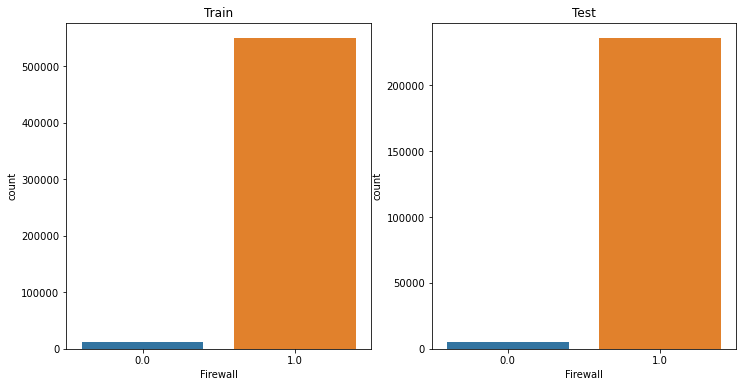

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(train["Firewall"])
plt.title('Train')
plt.subplot(1,2,2)
sns.countplot(test["Firewall"])
plt.title('Test')

Text(0.5, 1.0, 'Train')

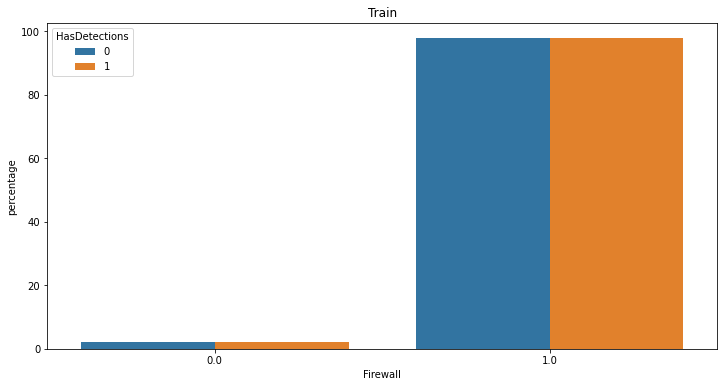

In [42]:
# percentage plot
plt.figure(figsize=(12,6))
train_card4 = (train[~train['Firewall'].isnull()].groupby(['HasDetections'])['Firewall']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
sns.barplot(x="Firewall", y="percentage", hue="HasDetections", data=train_card4)
plt.title('Train')

In [43]:
# we can create a new value -1 to represent na value for firewall

In [16]:

train['Firewall'].fillna(1,inplace =True)
test['Firewall'].fillna(1,inplace =True)

### Analysis of UacLuaenable 

#### This attribute reports whether or not the "administrator in Admin Approval Mode" user type is disabled or enabled 

In [17]:
train.UacLuaenable.value_counts()

1.0     563662
0.0       3404
48.0        16
49.0         2
Name: UacLuaenable, dtype: int64

Text(0.5, 1.0, 'Train')

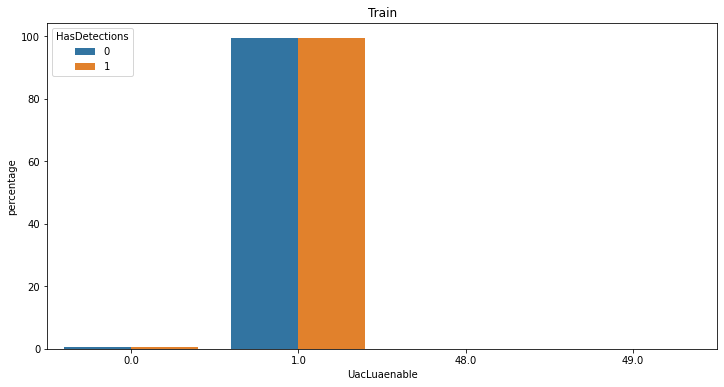

In [18]:
# percentage plot
plt.figure(figsize=(12,6))
train_card4 = (train[~train['UacLuaenable'].isnull()].groupby(['HasDetections'])['UacLuaenable']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
sns.barplot(x="UacLuaenable", y="percentage", hue="HasDetections", data=train_card4)
plt.title('Train')

In [44]:
train[train['UacLuaenable'] == 48]['HasDetections']

17112     0
42649     0
49810     1
77465     0
87049     1
105875    0
133072    0
142324    0
196641    0
247317    0
297235    0
336227    0
354358    0
408908    0
442033    0
486795    0
Name: HasDetections, dtype: int64

In [45]:
train[train['UacLuaenable'] == 49]['HasDetections']

9046      0
437184    0
Name: HasDetections, dtype: int64

In [21]:
train['UacLuaenable'].fillna(1,inplace =True)
test['UacLuaenable'].fillna(1,inplace =True)

### Analysis of  Wdft_IsGamer 

#### Indicates whether the device is a gamer device or not based on its hardware combination.

In [22]:
train.Wdft_IsGamer.value_counts()

0.0    402609
1.0    146383
Name: Wdft_IsGamer, dtype: int64

Text(0.5, 1.0, 'Test')

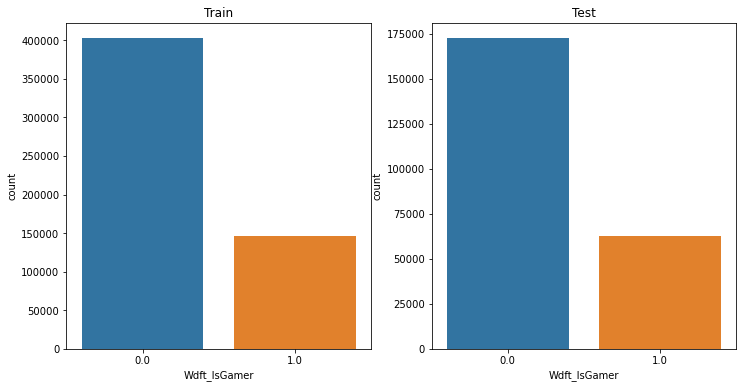

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(train["Wdft_IsGamer"])
plt.title('Train')
plt.subplot(1,2,2)
sns.countplot(test["Wdft_IsGamer"])
plt.title('Test')

Text(0.5, 1.0, 'Train')

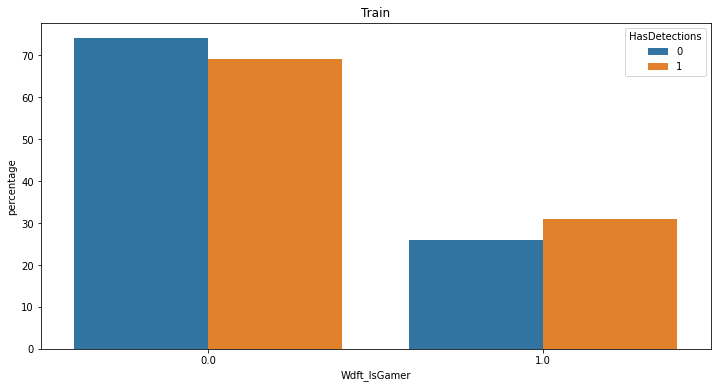

In [46]:
# percentage plot
plt.figure(figsize=(12,6))
train_card4 = (train[~train['Wdft_IsGamer'].isnull()].groupby(['HasDetections'])['Wdft_IsGamer']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
sns.barplot(x="Wdft_IsGamer", y="percentage", hue="HasDetections", data=train_card4)
plt.title('Train')

In [47]:
train["Wdft_IsGamer"].isnull().sum()

18738

In [48]:
test["Wdft_IsGamer"].isnull().sum()

8093

In [ ]:
#fill with mode i.e 0

#### if a device is gamer device then chances of Malware Detection is high 

### Wdft_RegionIdentifier 

In [25]:
train.Wdft_RegionIdentifier.value_counts()

10.0    112936
11.0     85606
3.0      83357
1.0      74015
15.0     67807
7.0      37862
8.0      17893
13.0     14734
5.0      13558
12.0     10870
6.0      10459
4.0       8916
2.0       5377
9.0       5369
14.0       233
Name: Wdft_RegionIdentifier, dtype: int64

Text(0.5, 1.0, 'Train')

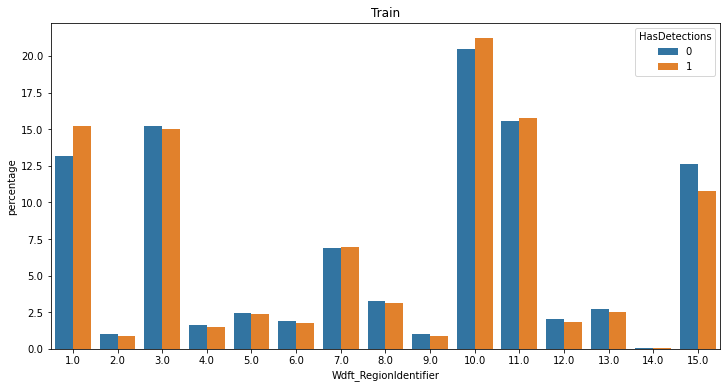

In [49]:
# percentage plot
plt.figure(figsize=(12,6))
train_card4 = (train[~train['Wdft_RegionIdentifier'].isnull()].groupby(['HasDetections'])['Wdft_RegionIdentifier']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
sns.barplot(x="Wdft_RegionIdentifier", y="percentage", hue="HasDetections", data=train_card4)
plt.title('Train')

In [50]:
train["Wdft_RegionIdentifier"].isnull().sum()

18738

In [51]:
test["Wdft_RegionIdentifier"].isnull().sum()

8093

In [ ]:
# fill with -100 or mode ??

#### we can see that  Wdft_RegionIdentifier =1,10 chances of Malware detection is high

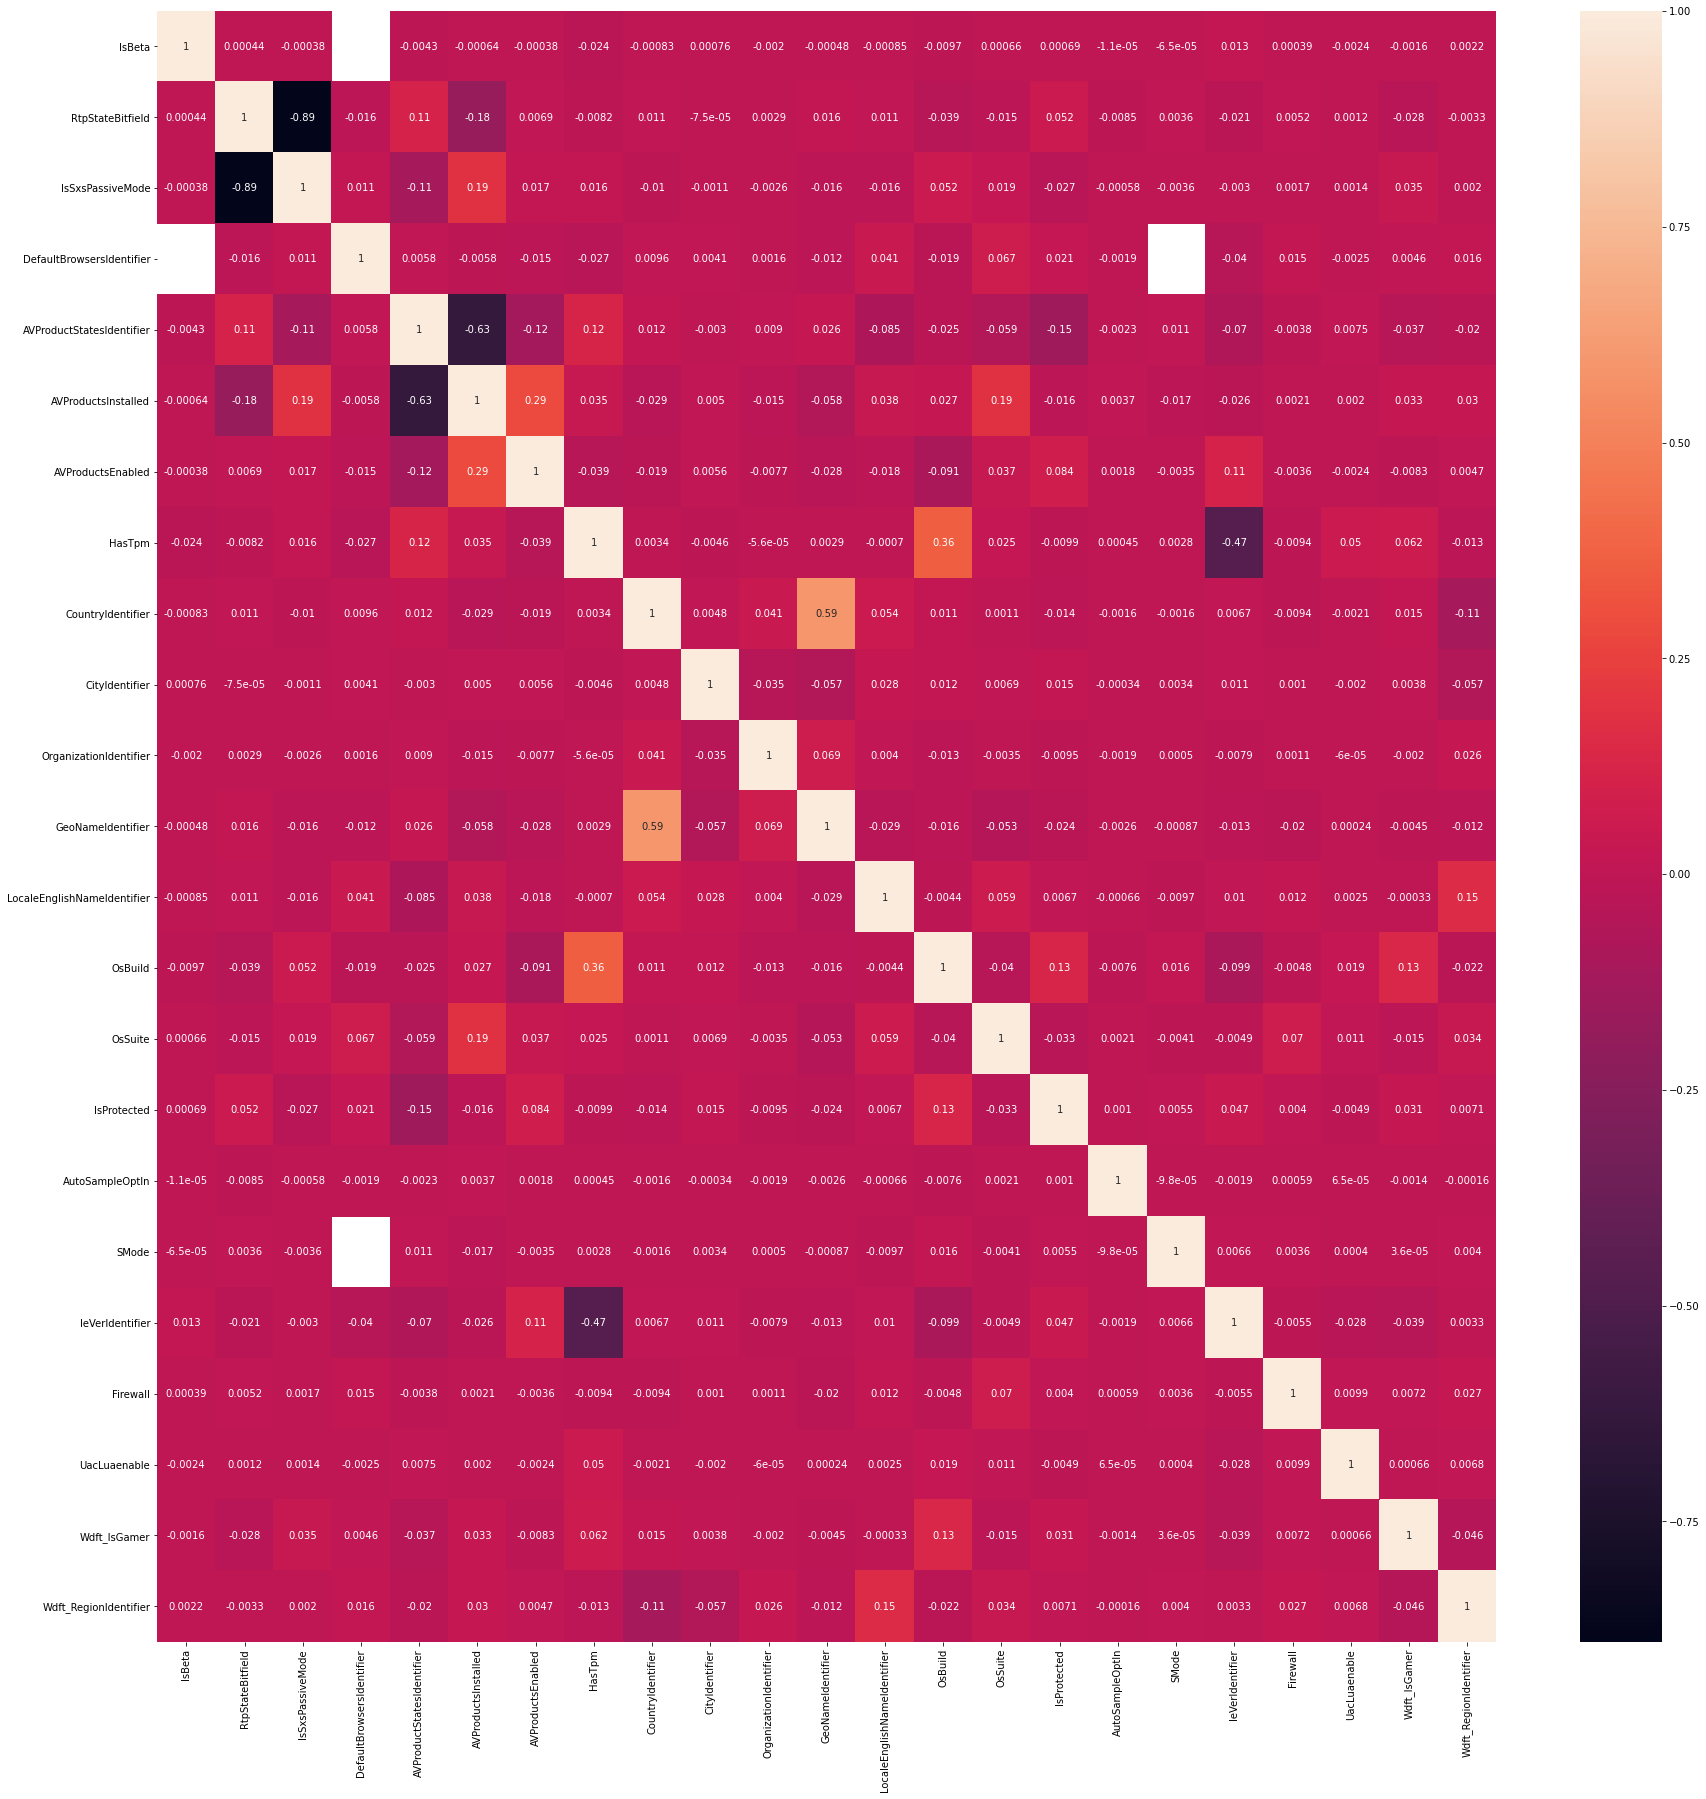

In [28]:
cor_c = train[['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode',
       'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable','Wdft_IsGamer',
       'Wdft_RegionIdentifier',]]
corre = cor_c.corr()
plt.figure(1,figsize=(30,30))
sns.heatmap(corre,annot=True)

In [11]:
def percent_plot(col):
    plt.figure(figsize=(12,6))
    train_card4 = (train[~train[col].isnull()].groupby(['HasDetections'])[col]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
    sns.barplot(x=col, y="percentage", hue="HasDetections", data=train_card4)
    plt.title('Train')

In [12]:
def count_plot(col):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.countplot(train[col])
    plt.title('Train')
    plt.subplot(1,2,2)
    sns.countplot(test[col])
    plt.title('Test')


In [13]:
def dist_plot(col):
    plt.figure(figsize=(20,15))
    plt.subplot(1,2,1)
    sns.distplot(train[(train['HasDetections']==0) & (~train[col].isnull())][col])
    sns.distplot(train[(train['HasDetections']==1) & (~train[col].isnull())][col])
    plt.legend(['Not Detected','Detected'])
    plt.title('Train')
    plt.subplot(1,2,2)
    sns.distplot(test[~test[col].isnull()][col])
    plt.title('Test')

In [14]:
def plot_top8_percent(colname):
    top = train[colname].value_counts()
    l = top[1:8]
    l = l.keys()
    df = train.loc[train[colname].isin(l)]
    #df.head(5)
    plt.figure(figsize=(30,12))
    plt.subplot(1,2,1)
    tr = (df[~df[colname].isnull()].groupby(['HasDetections'])[colname]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(colname))

    sns.barplot(x=colname, y="percentage", hue="HasDetections", data=tr)
    plt.title('Train')

In [15]:
def hist_plot(col):
    plt.figure(figsize=(20,15))
    plt.subplot(1,2,1)
    sns.histplot(data=train,x=train[col],bins=50,hue=train["HasDetections"])
    
   
    plt.title('Train')
    plt.subplot(1,2,2)
    sns.histplot(data=test,x=train[col],bins=50)
    plt.title('Test')

In [22]:
sns.histplot?

# Census_OEMNameIdentifier


In [1]:
train["Census_OEMNameIdentifier"].value_counts()

NameError: name 'train' is not defined

In [10]:
train["Census_OEMNameIdentifier"].unique().shape

(1727,)

In [11]:
train["Census_OEMNameIdentifier"].isnull().sum()

6303

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

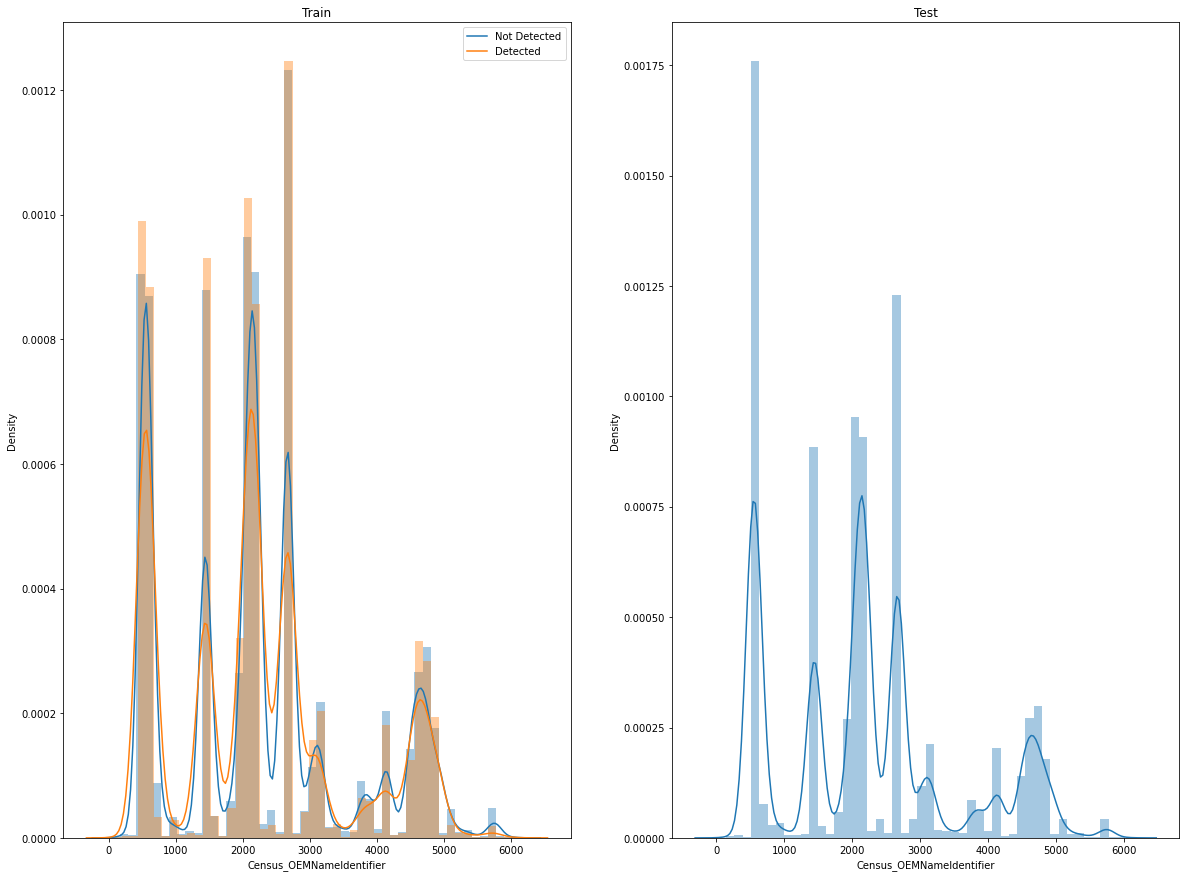

In [16]:
dist_plot("Census_OEMNameIdentifier")

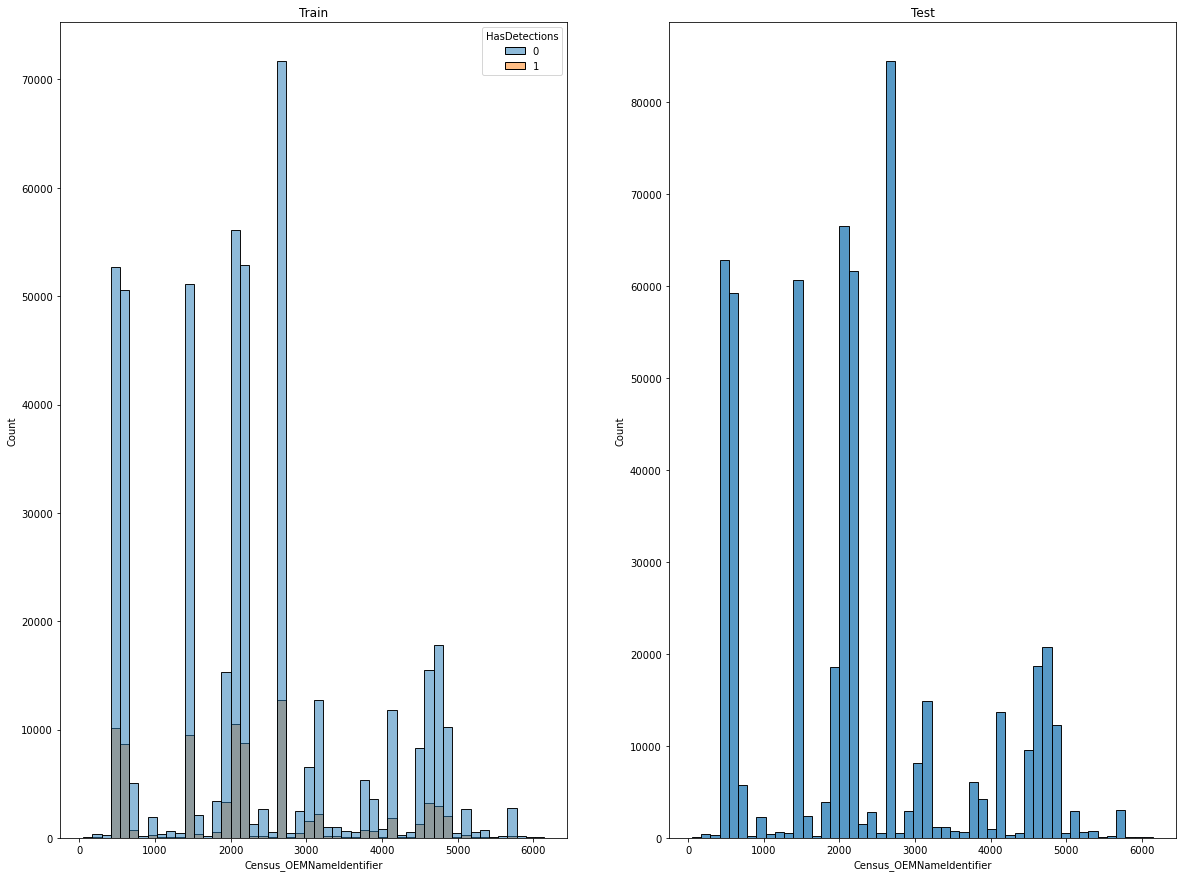

In [33]:
hist_plot("Census_OEMNameIdentifier")

In [ ]:
# fill na with mean

In [34]:
train.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode',
       'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_

In [35]:
numerical_df = train.select_dtypes(exclude=['object'])

In [36]:
numerical_df.columns

Index(['IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild',
       'OsSuite', 'IsProtected', 'AutoSampleOptIn', 'SMode', 'IeVerIdentifier',
       'Firewall', 'UacLuaenable', 'Census_OEMNameIdentifier',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive',
       'Census_TotalPhysicalRAM',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_InternalBatteryNumberOfCharges', 'Census_

# Census_ProcessorCoreCount
## Number of logical cores in the processor

In [37]:
train["Census_ProcessorCoreCount"].unique().shape

(29,)

In [38]:
train["Census_ProcessorCoreCount"].isnull().sum()

2506

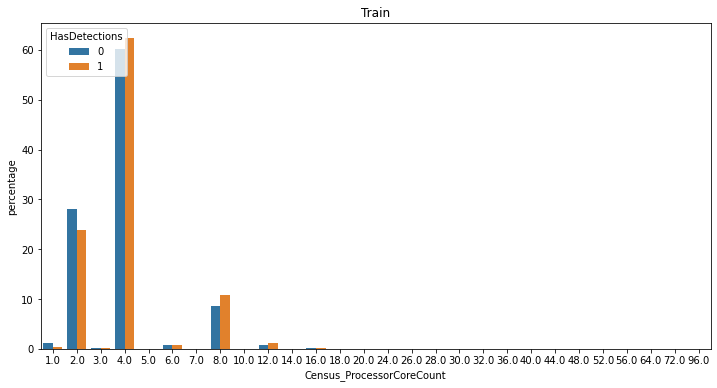

In [39]:
percent_plot("Census_ProcessorCoreCount")

In [ ]:
# 4 n 8 core have high rate

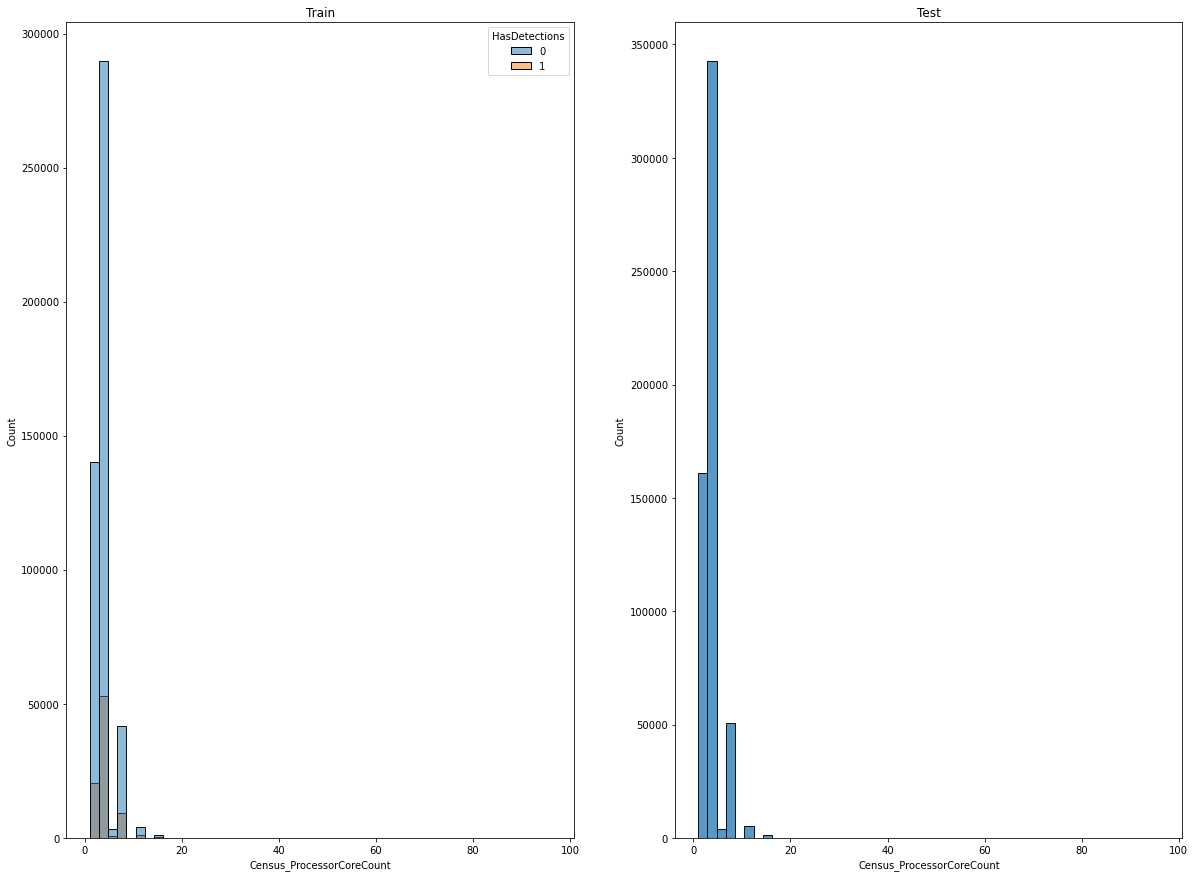

In [68]:
hist_plot("Census_ProcessorCoreCount")

In [ ]:
#skewed data , fill na values with mode

# Census_ProcessorManufacturerIdentifier
## NA

In [69]:
train["Census_ProcessorManufacturerIdentifier"].unique().shape

(5,)

In [70]:
train["Census_ProcessorManufacturerIdentifier"].isnull().sum()

2506

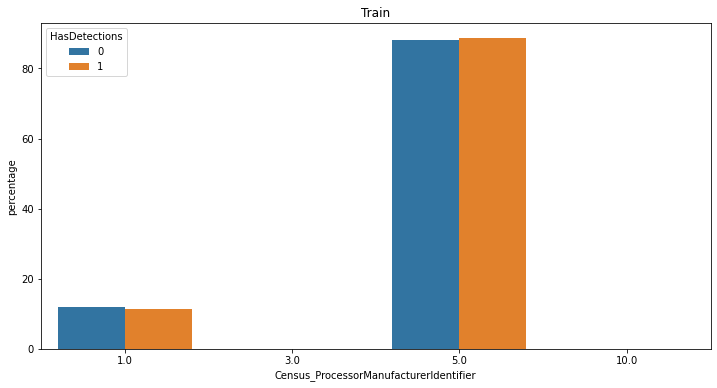

In [71]:
percent_plot("Census_ProcessorManufacturerIdentifier")

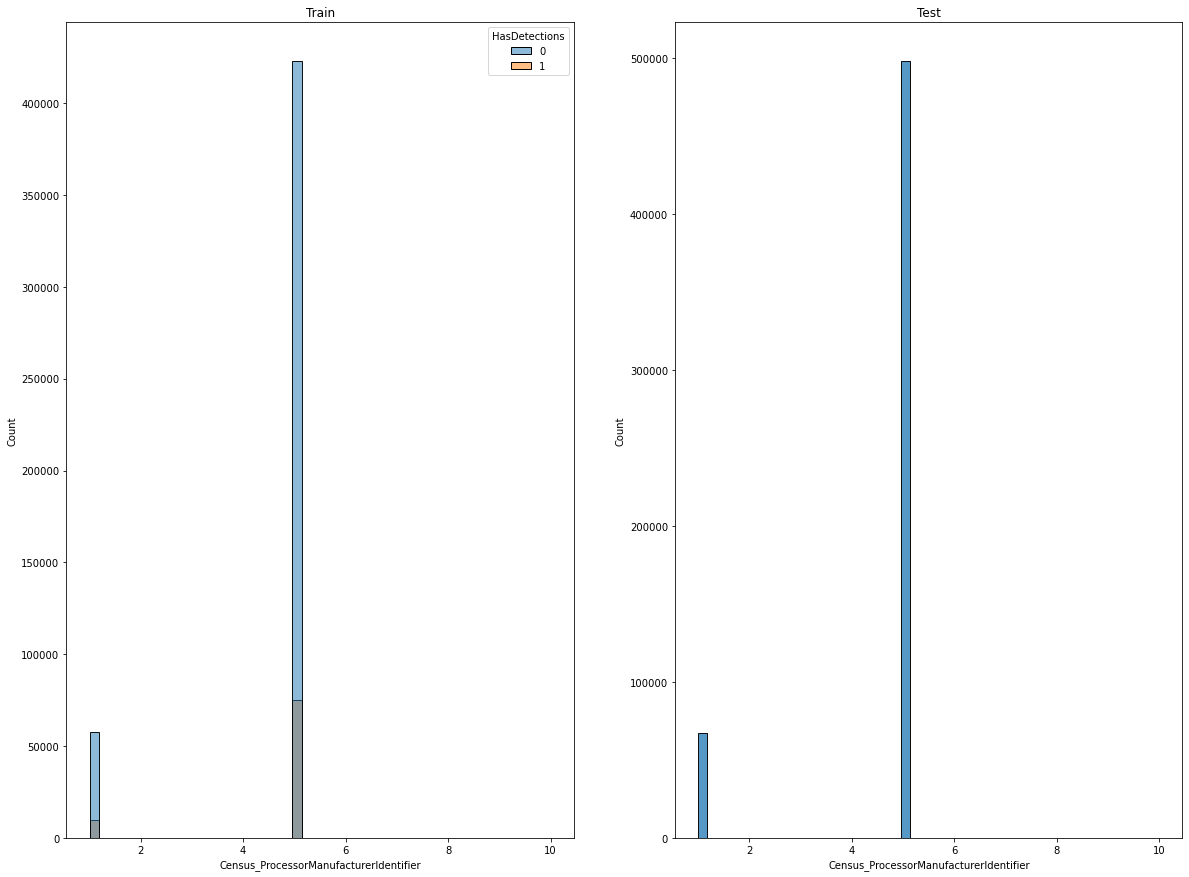

In [72]:
hist_plot("Census_ProcessorManufacturerIdentifier")

In [73]:
# fill na with mode 

# Census_ProcessorModelIdentifier
## NA

In [74]:
train["Census_ProcessorModelIdentifier"].unique().shape

(2370,)

In [75]:
train["Census_ProcessorModelIdentifier"].isnull().sum()

2508

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

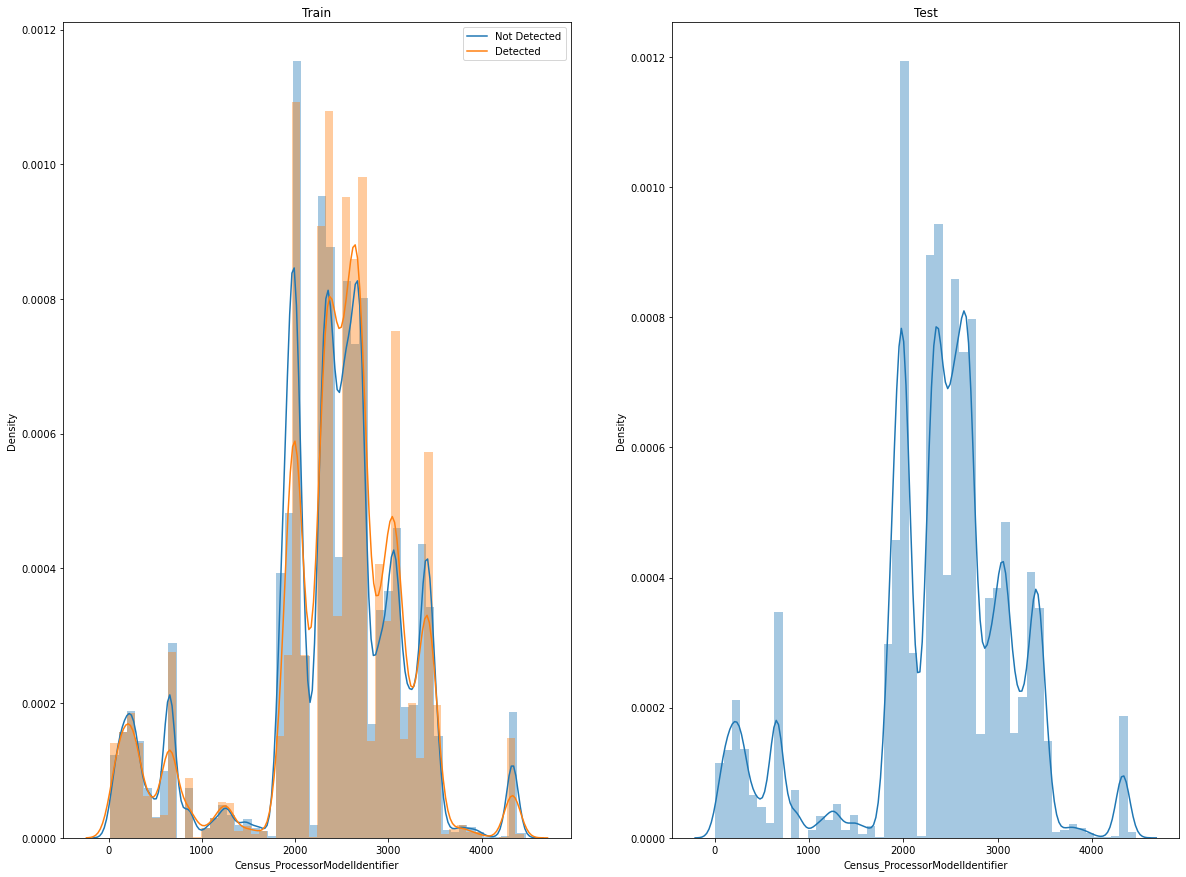

In [76]:
dist_plot("Census_ProcessorModelIdentifier")

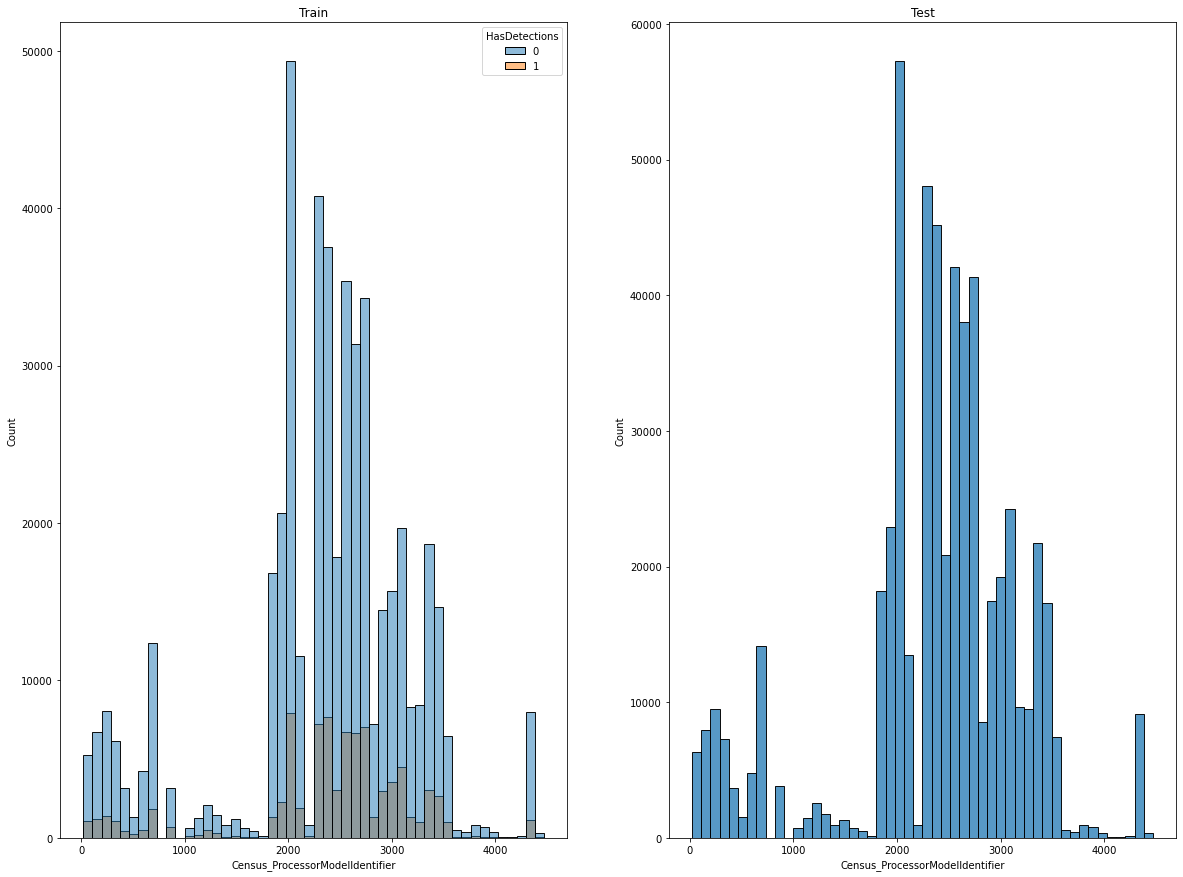

In [77]:
hist_plot("Census_ProcessorModelIdentifier")

In [ ]:
# fill na with mode or mean 

In [78]:
numerical_df.columns

Index(['IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild',
       'OsSuite', 'IsProtected', 'AutoSampleOptIn', 'SMode', 'IeVerIdentifier',
       'Firewall', 'UacLuaenable', 'Census_OEMNameIdentifier',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive',
       'Census_TotalPhysicalRAM',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_InternalBatteryNumberOfCharges', 'Census_

# Census_PrimaryDiskTotalCapacity
## Amount of disk space on primary disk of the machine in MB

In [79]:
train["Census_PrimaryDiskTotalCapacity"].isnull().sum()

3326

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

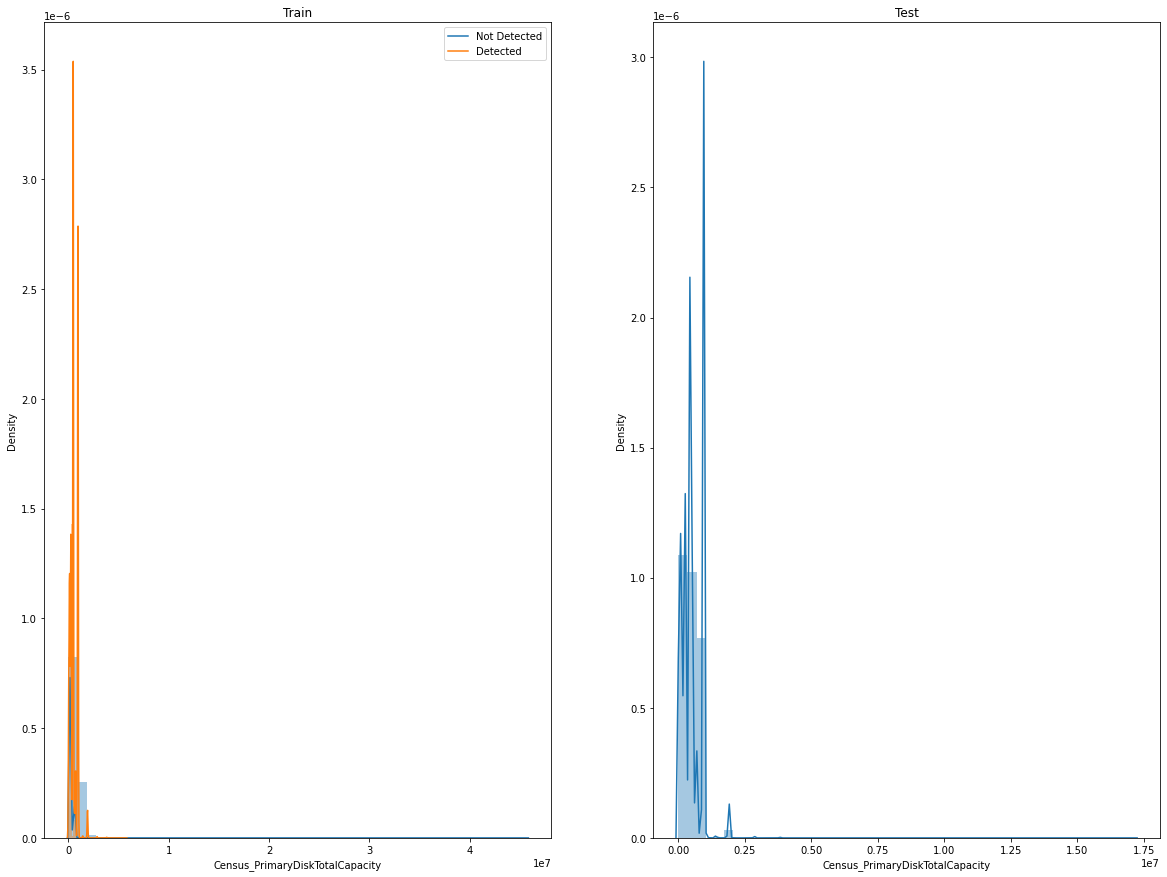

In [80]:
dist_plot("Census_PrimaryDiskTotalCapacity")

In [81]:
# very skewed data 

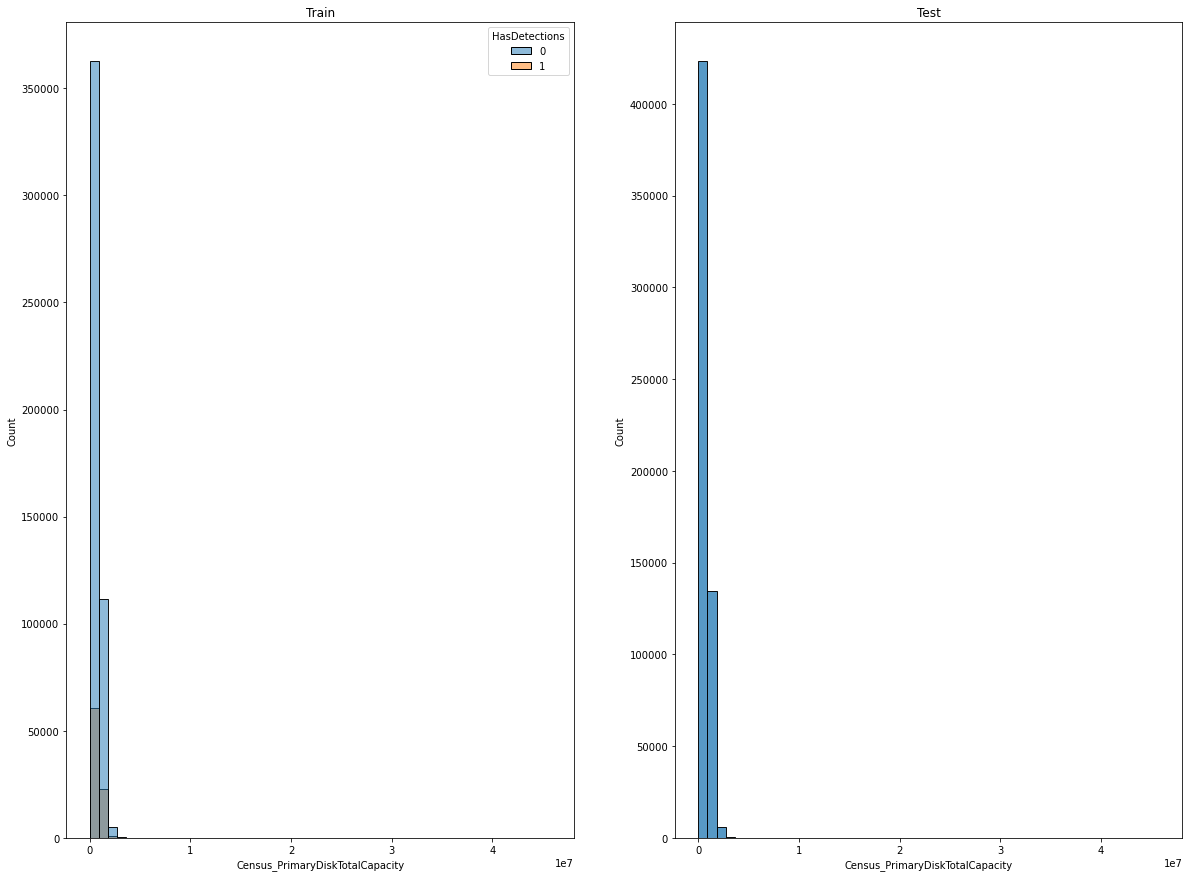

In [82]:
hist_plot("Census_PrimaryDiskTotalCapacity")

<AxesSubplot:xlabel='Census_PrimaryDiskTotalCapacity', ylabel='Density'>

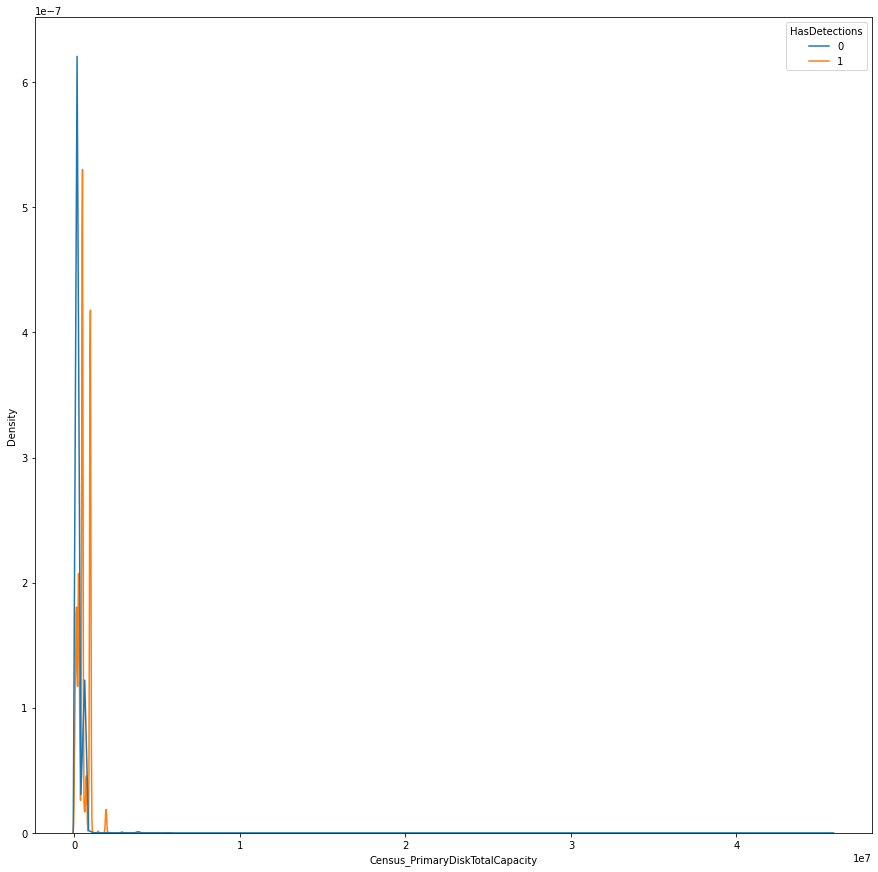

In [85]:
plt.figure(figsize=(15,15))
sns.kdeplot(train["Census_PrimaryDiskTotalCapacity"],hue=train["HasDetections"])

In [86]:
# can see high detection rate near zero values

In [87]:
# fill na with some non important value ? , maintain distribution

# Census_SystemVolumeTotalCapacity
## the size of the partition that the System volume is installed on in MB

In [88]:
train["Census_SystemVolumeTotalCapacity"].unique().shape

(151545,)

In [89]:
train["Census_SystemVolumeTotalCapacity"].isnull().sum()

3326

<AxesSubplot:xlabel='Census_SystemVolumeTotalCapacity', ylabel='Density'>

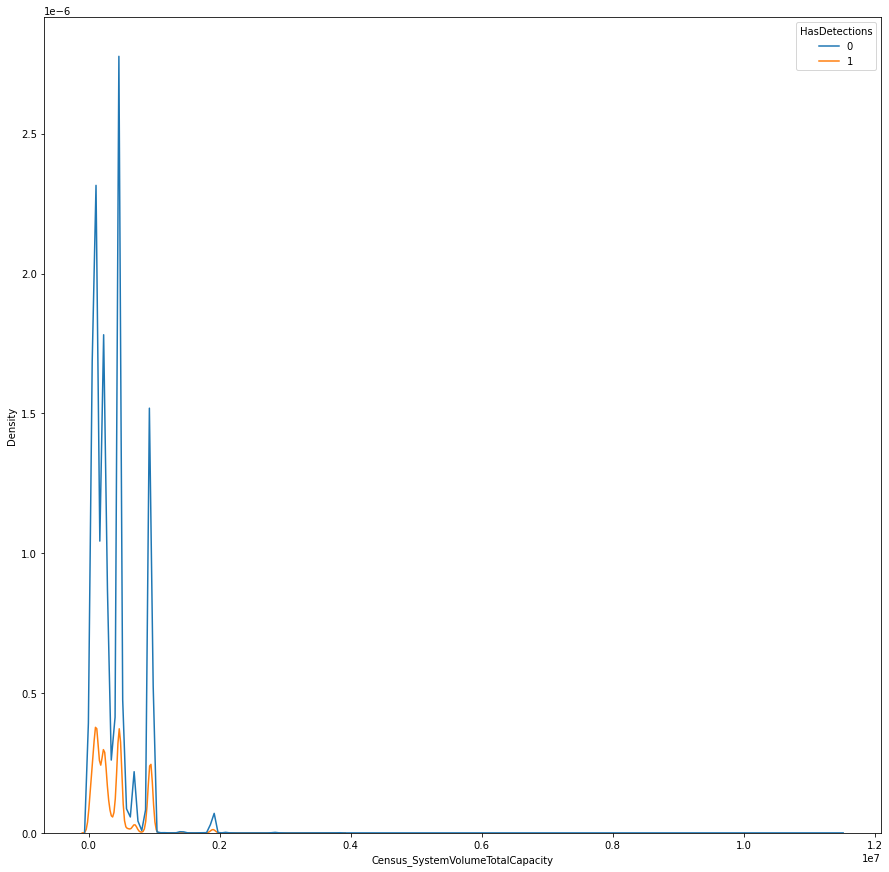

In [90]:
plt.figure(figsize=(15,15))
sns.kdeplot(train["Census_SystemVolumeTotalCapacity"],hue=train["HasDetections"])

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

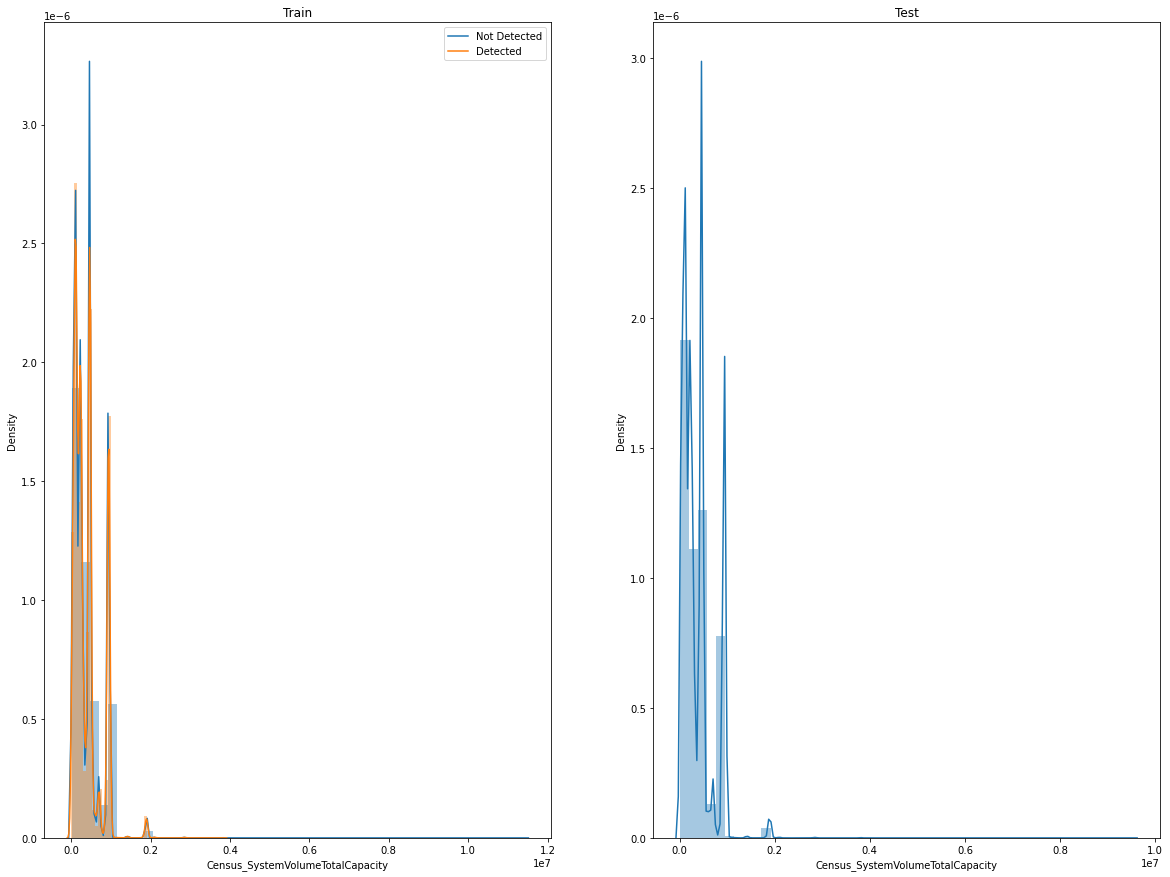

In [91]:
dist_plot("Census_SystemVolumeTotalCapacity")

In [ ]:
# fill na to maintain distribution

# Census_HasOpticalDiskDrive
## true indicates that the machine has an optical disk drive (CD/DVD)

In [93]:
train["Census_HasOpticalDiskDrive"].isnull().sum()

0

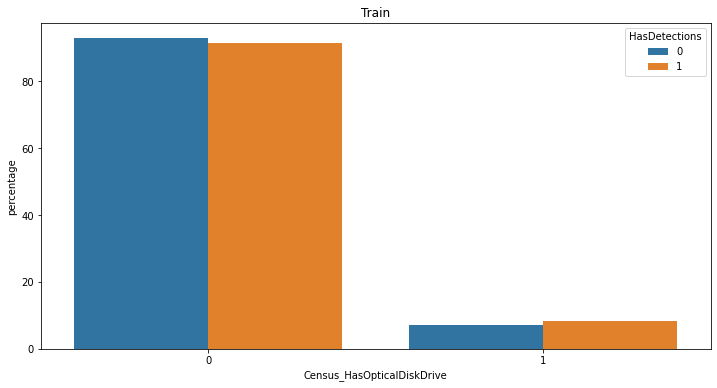

In [94]:
percent_plot("Census_HasOpticalDiskDrive")

In [95]:
# nothing interesting

# Census_TotalPhysicalRAM
##  Retrieves the physical RAM in MB

In [96]:
train["Census_TotalPhysicalRAM"].isnull().sum()

5352

<AxesSubplot:xlabel='Census_TotalPhysicalRAM', ylabel='Density'>

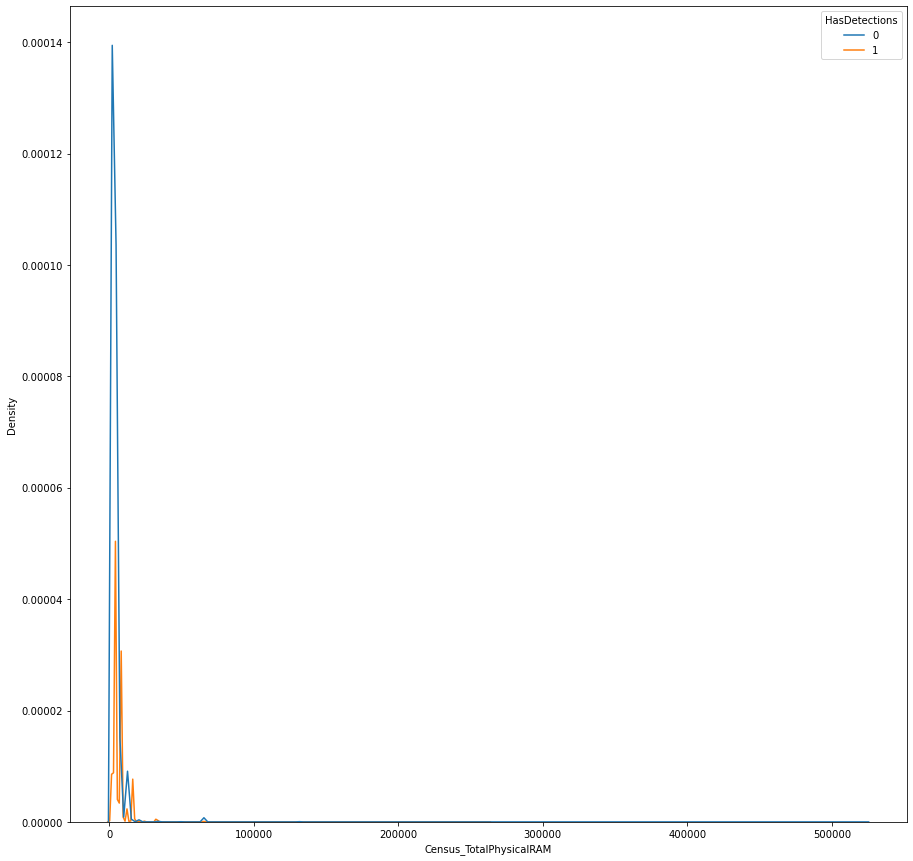

In [97]:
plt.figure(figsize=(15,15))
sns.kdeplot(train["Census_TotalPhysicalRAM"],hue=train["HasDetections"])

In [ ]:
# very skewed data

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

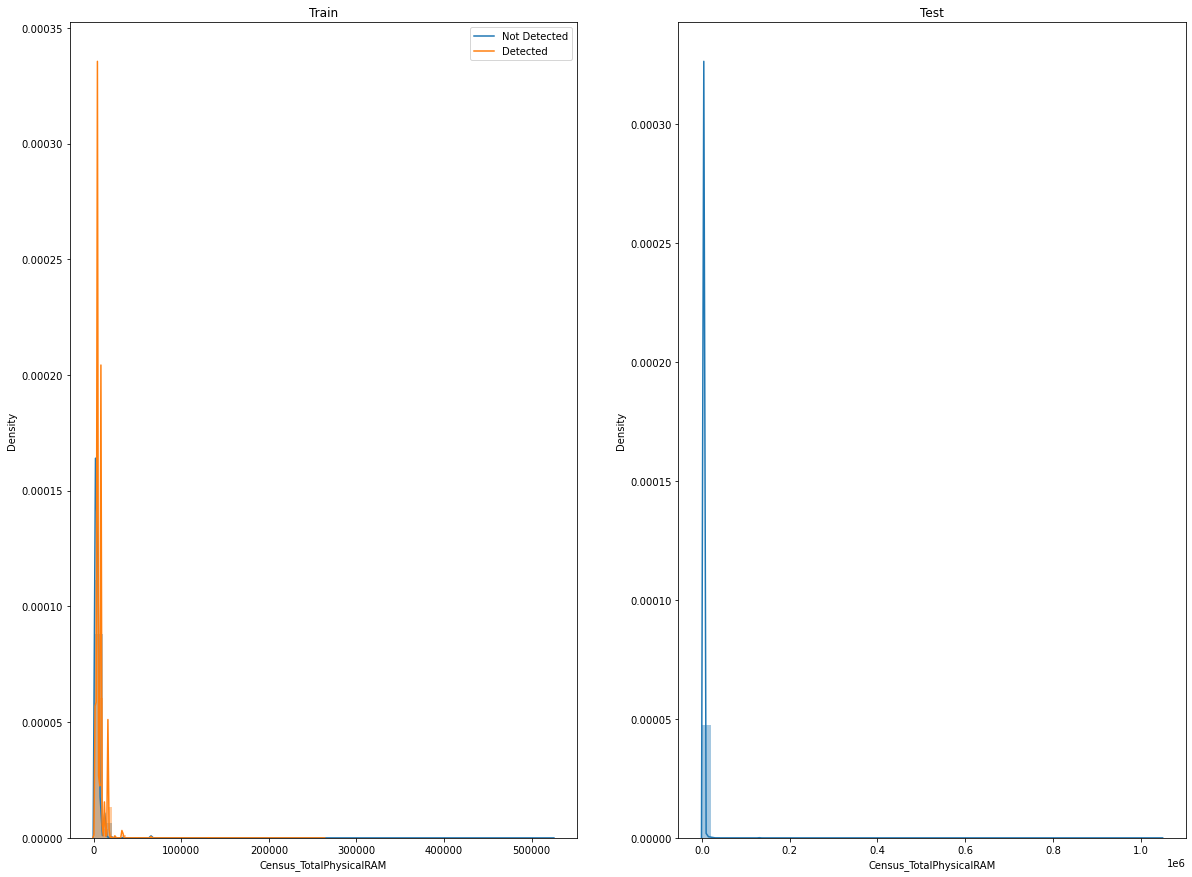

In [98]:
dist_plot("Census_TotalPhysicalRAM")

In [ ]:
# fill na to maintain dist

In [101]:
def plot_kde_hist_for_numeric(col):
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    sns.kdeplot(train.loc[train['HasDetections'] == 0, col], ax=ax[0], label='NoDetection(0)')
    sns.kdeplot(train.loc[train['HasDetections'] == 1, col], ax=ax[0], label='HasDetection(1)')

    train.loc[train['HasDetections'] == 0, col].hist(ax=ax[1], bins=100)
    train.loc[train['HasDetections'] == 1, col].hist(ax=ax[1], bins=100)

    plt.suptitle(col, fontsize=30)
    ax[0].set_yscale('log')
    ax[0].set_title('KDE plot')
    
    ax[1].set_title('Histogram')
    ax[1].legend(['NoDetection(0)', 'HasDetection(1)'])
    ax[1].set_yscale('log')
    plt.show()

# Census_InternalPrimaryDiagonalDisplaySizeInInches
##  Retrieves the physical diagonal length in inches of the primary display

In [100]:
train["Census_InternalPrimaryDiagonalDisplaySizeInInches"].isnull().sum()

2967

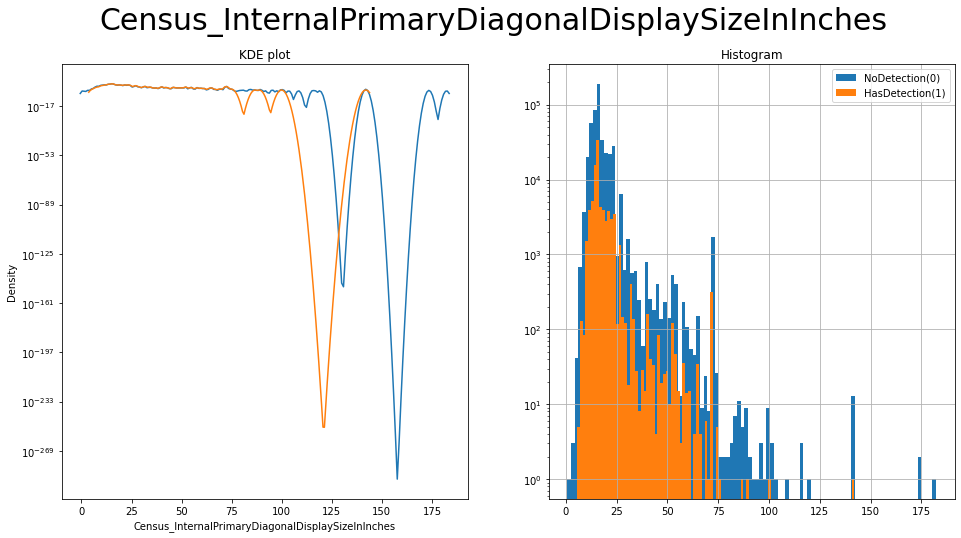

In [102]:
plot_kde_hist_for_numeric("Census_InternalPrimaryDiagonalDisplaySizeInInches")

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

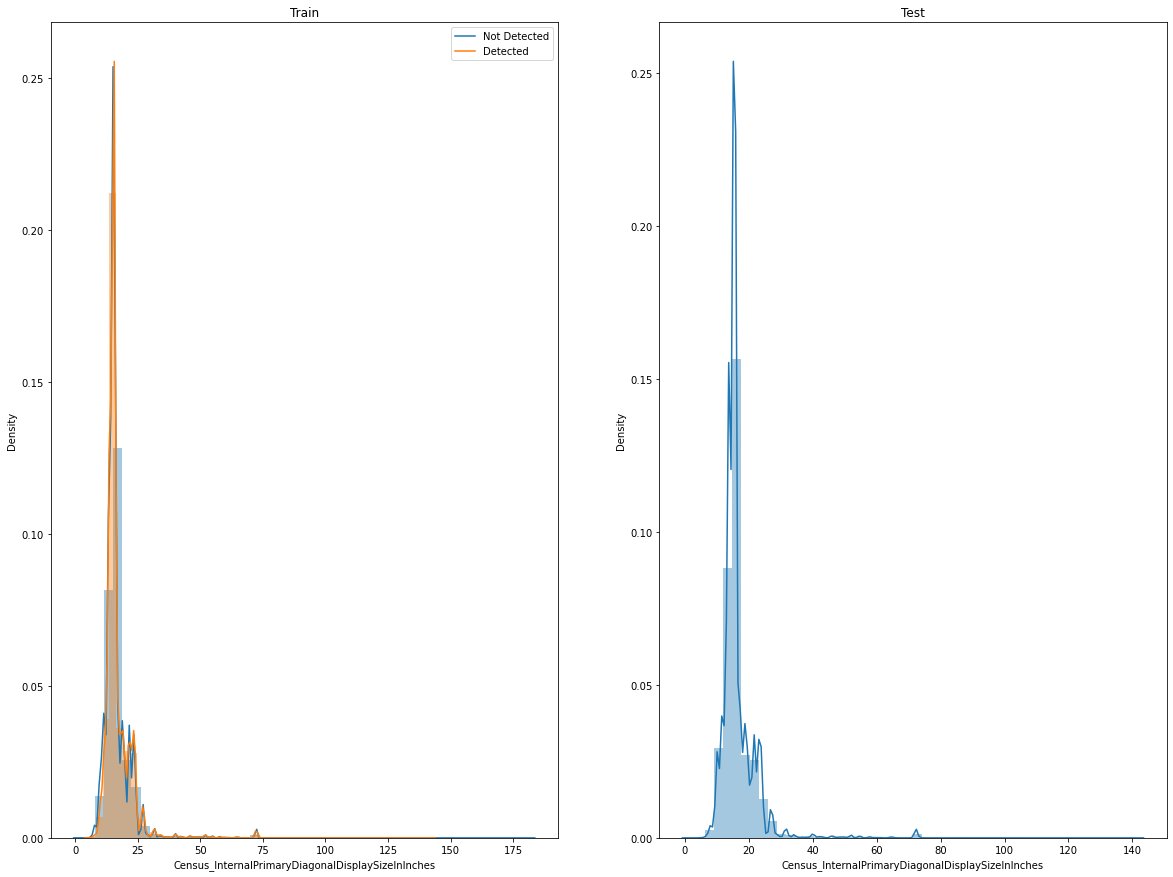

In [103]:
dist_plot("Census_InternalPrimaryDiagonalDisplaySizeInInches")

In [ ]:
# fill na according to distri

# Census_InternalPrimaryDisplayResolutionHorizontal
## Retrieves the number of pixels in the horizontal direction of the internal display

In [104]:
train["Census_InternalPrimaryDisplayResolutionHorizontal"].isnull().sum()

2954

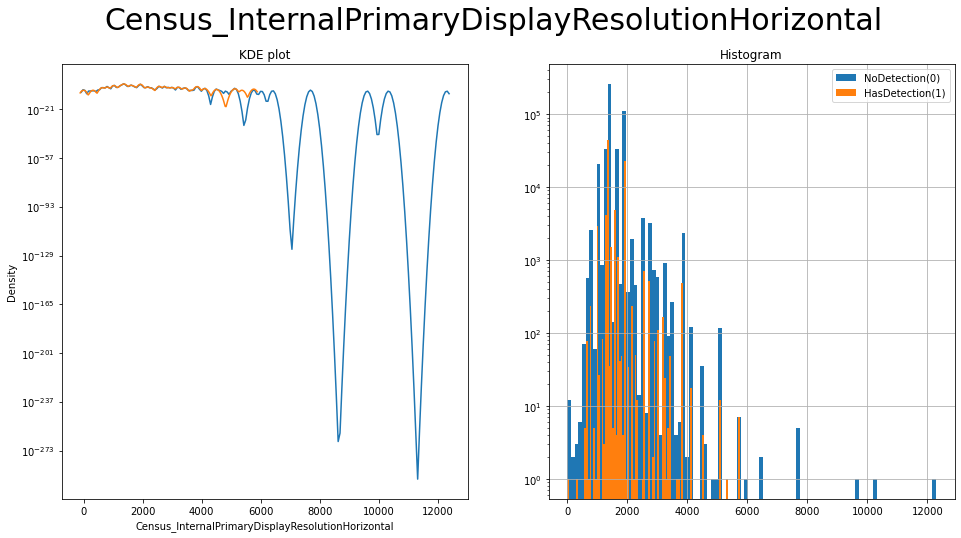

In [105]:
plot_kde_hist_for_numeric("Census_InternalPrimaryDisplayResolutionHorizontal")

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

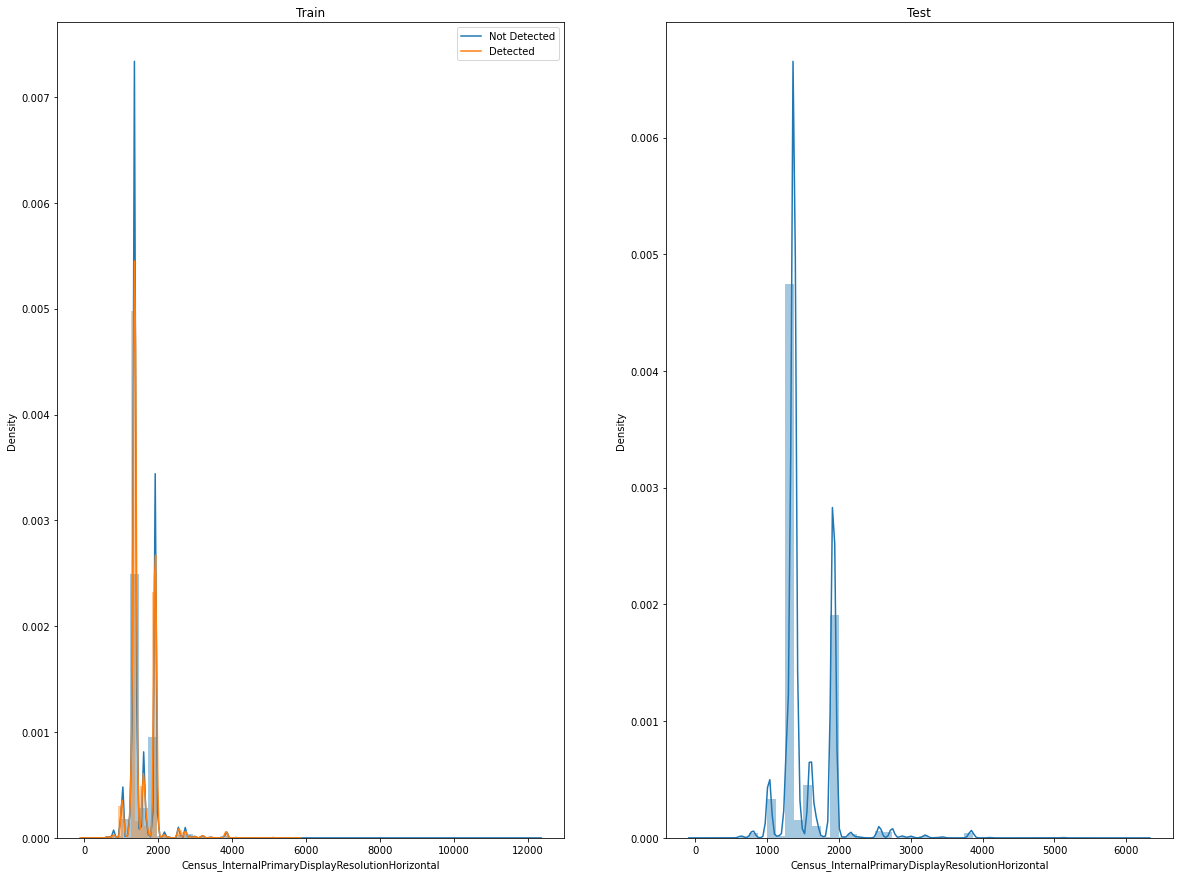

In [106]:
dist_plot("Census_InternalPrimaryDisplayResolutionHorizontal")

In [107]:
# fill na according to dist , high rate for small values

# Census_InternalPrimaryDisplayResolutionVertical
## Retrieves the number of pixels in the vertical direction of the internal display

In [108]:
train["Census_InternalPrimaryDisplayResolutionVertical"].isnull().sum()

2954

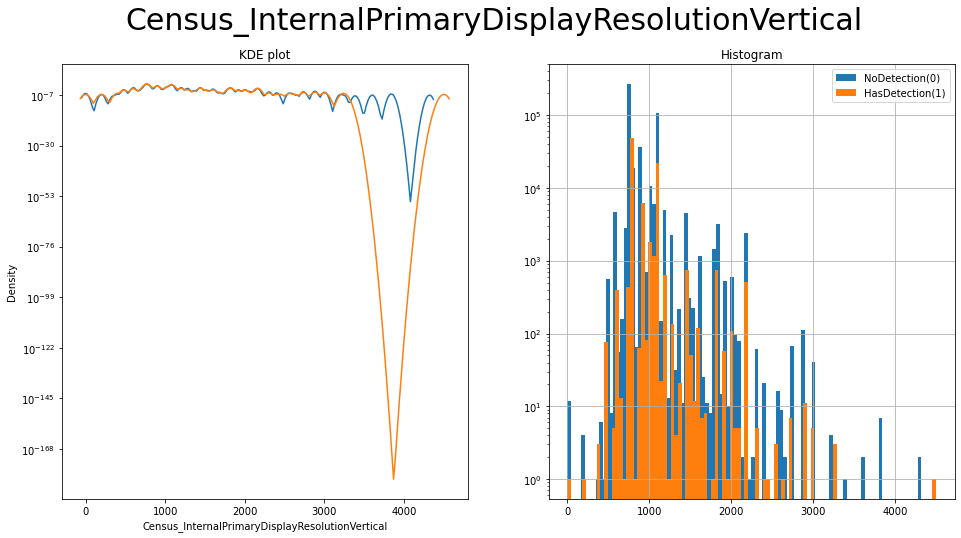

In [109]:
plot_kde_hist_for_numeric("Census_InternalPrimaryDisplayResolutionVertical")

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

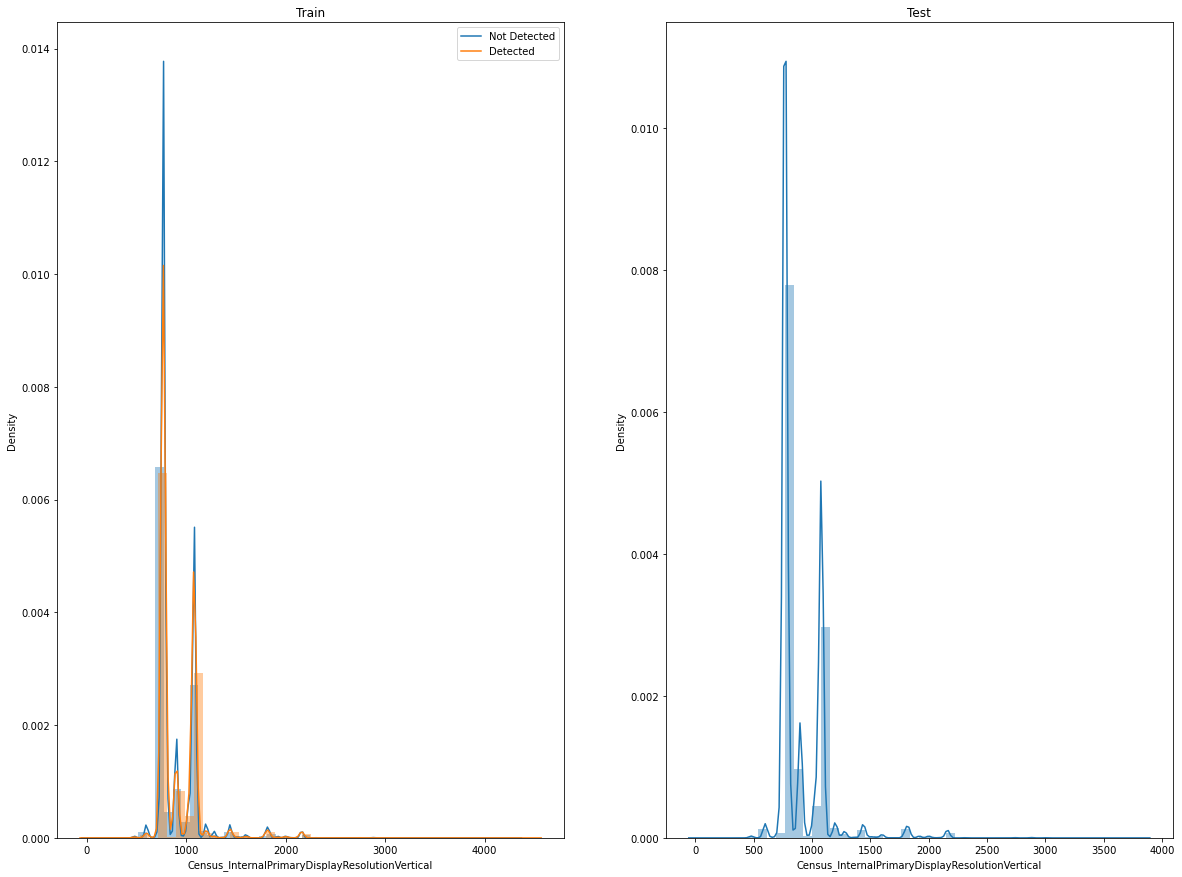

In [110]:
dist_plot("Census_InternalPrimaryDisplayResolutionVertical")

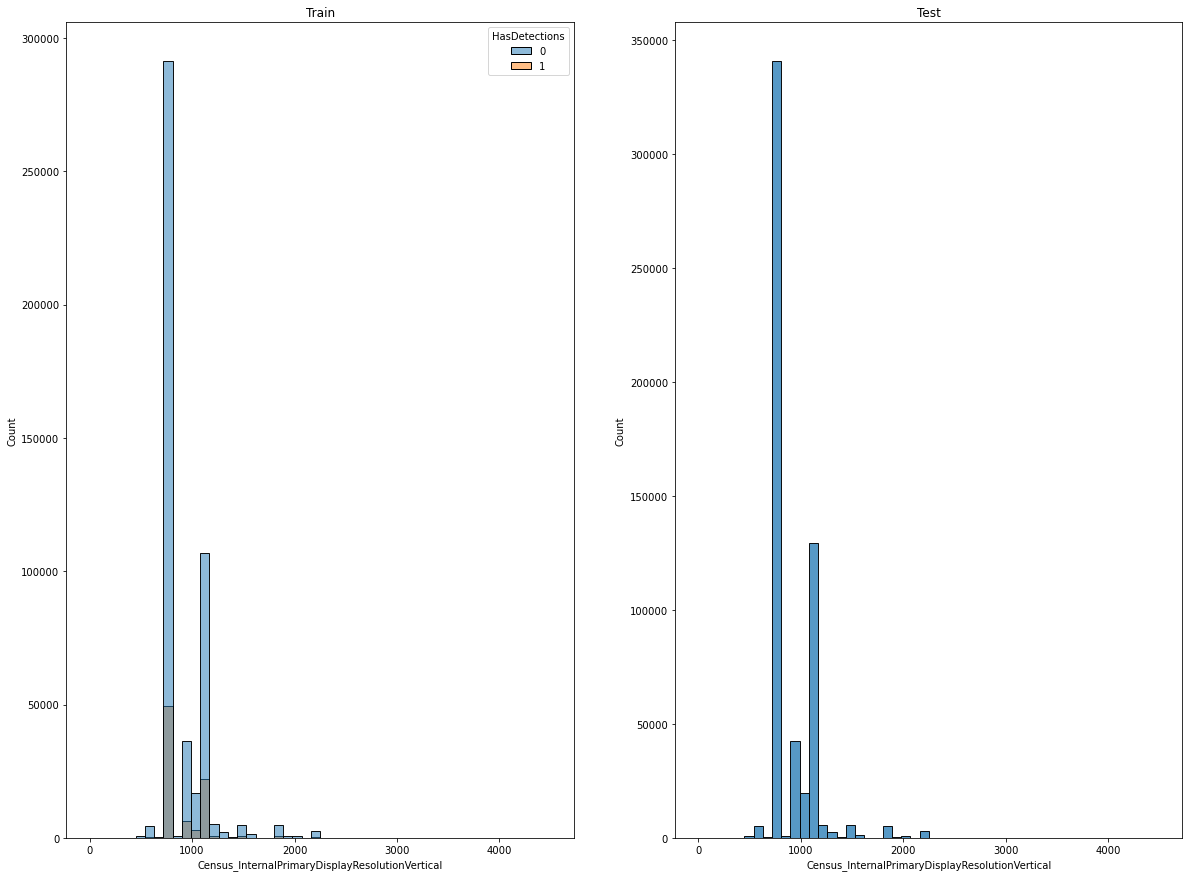

In [111]:
hist_plot("Census_InternalPrimaryDisplayResolutionVertical")

In [ ]:
# high rate is in smaller values , fill na according to dist

# Census_OSBuildNumber
## OS Build number extracted from the OsVersionFull. Example - OsBuildNumber = 10512 or 10240

In [112]:
train["Census_OSBuildNumber"].isnull().sum()

0

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

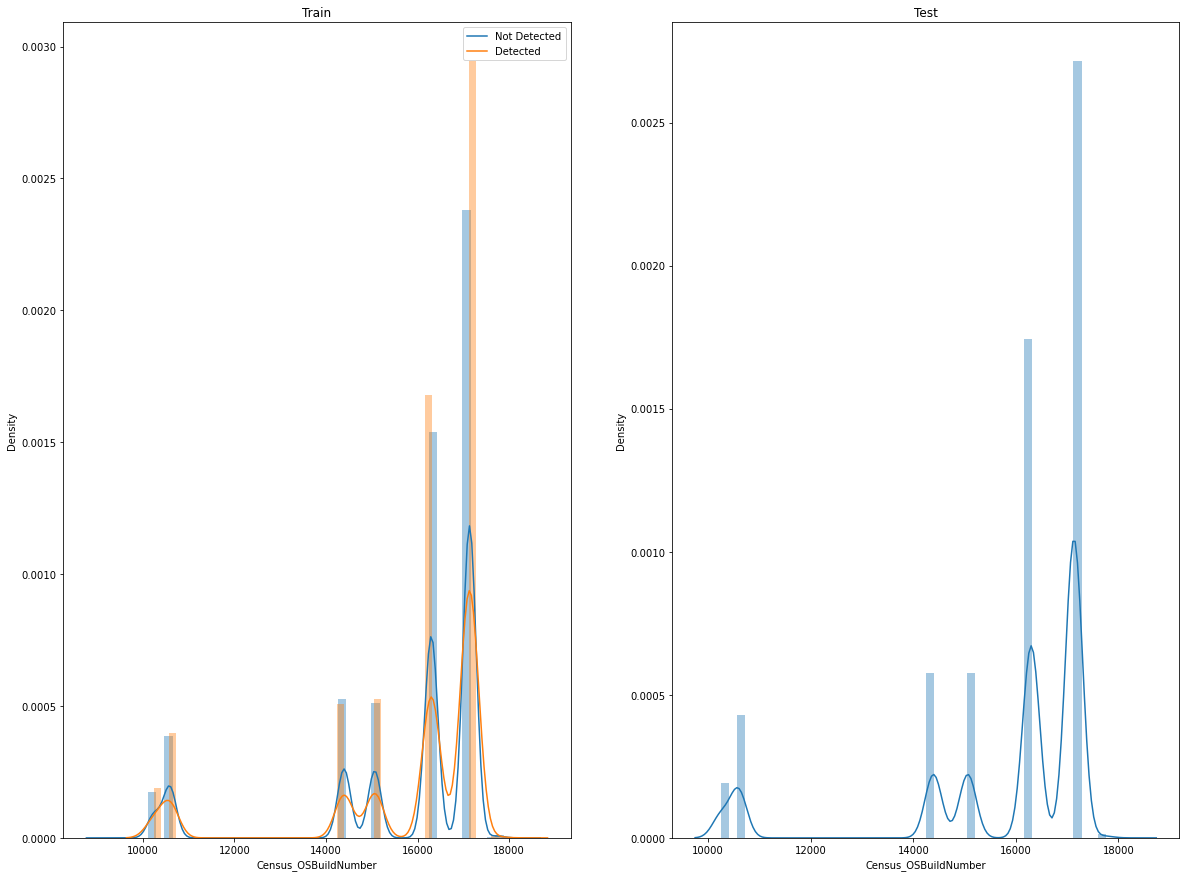

In [113]:
dist_plot("Census_OSBuildNumber")

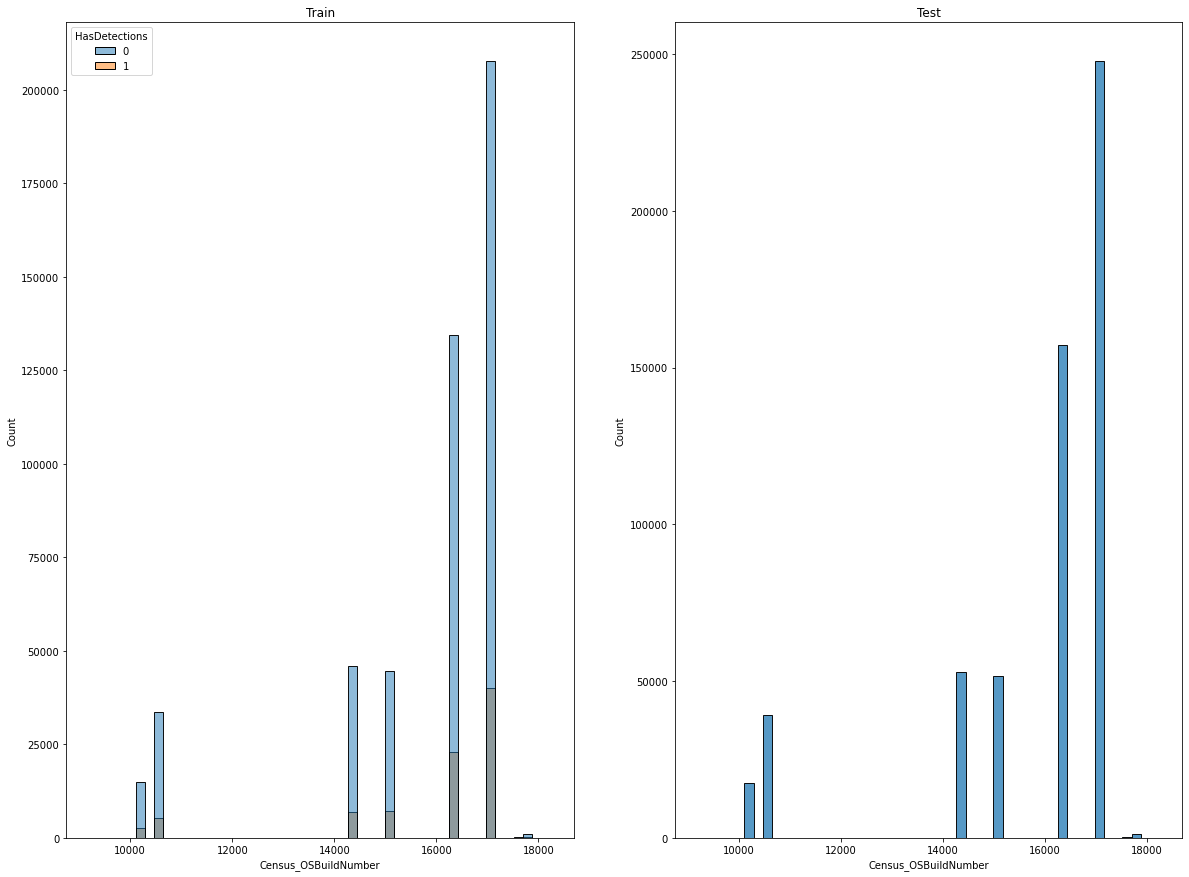

In [114]:
hist_plot("Census_OSBuildNumber")

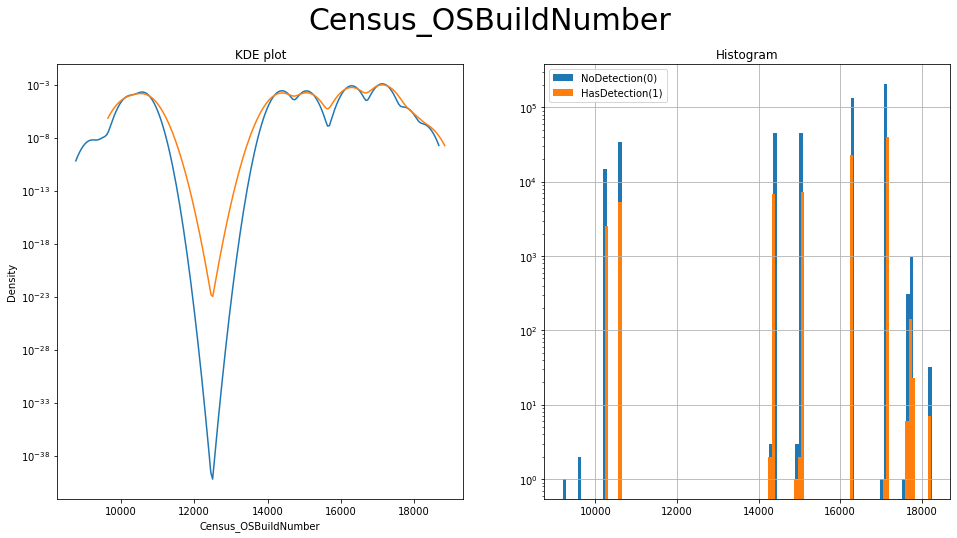

In [115]:
plot_kde_hist_for_numeric("Census_OSBuildNumber")

# Census_OSInstallLanguageIdentifier
## NA

In [116]:
train["Census_OSInstallLanguageIdentifier"].isnull().sum()

3833

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

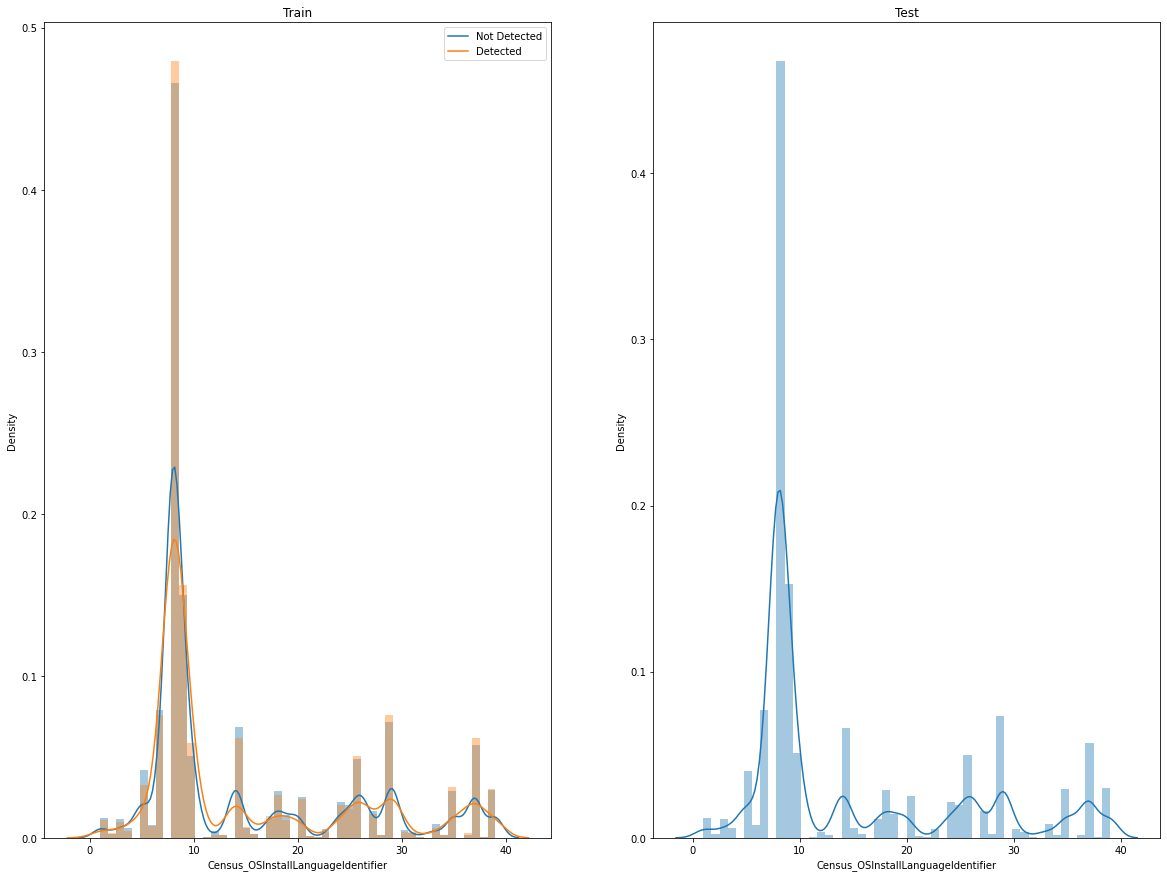

In [117]:
dist_plot("Census_OSInstallLanguageIdentifier")

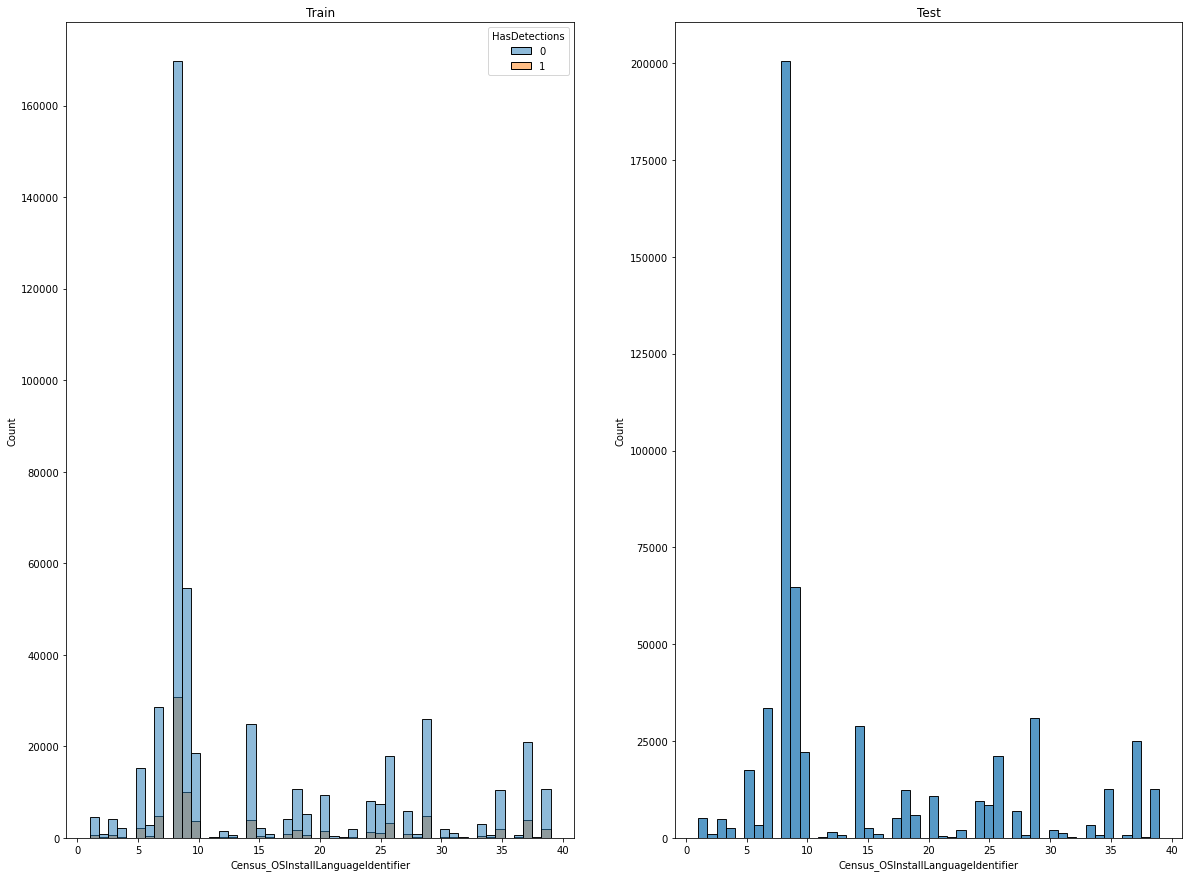

In [118]:
hist_plot("Census_OSInstallLanguageIdentifier")

In [119]:
# some values have high rate , fill na with mode

# Census_OSUILocaleIdentifier
## NA

In [120]:
train["Census_OSUILocaleIdentifier"].isnull().sum()

0

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

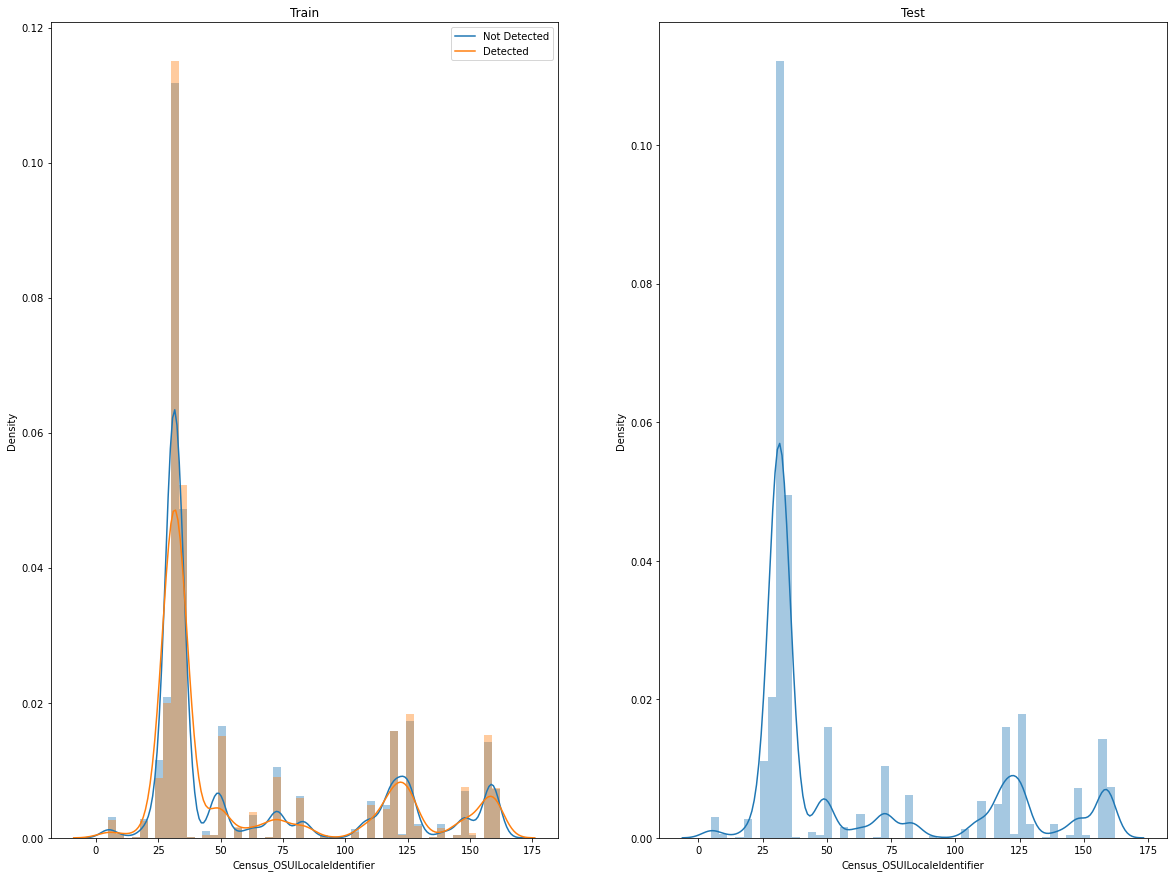

In [121]:
dist_plot("Census_OSUILocaleIdentifier")

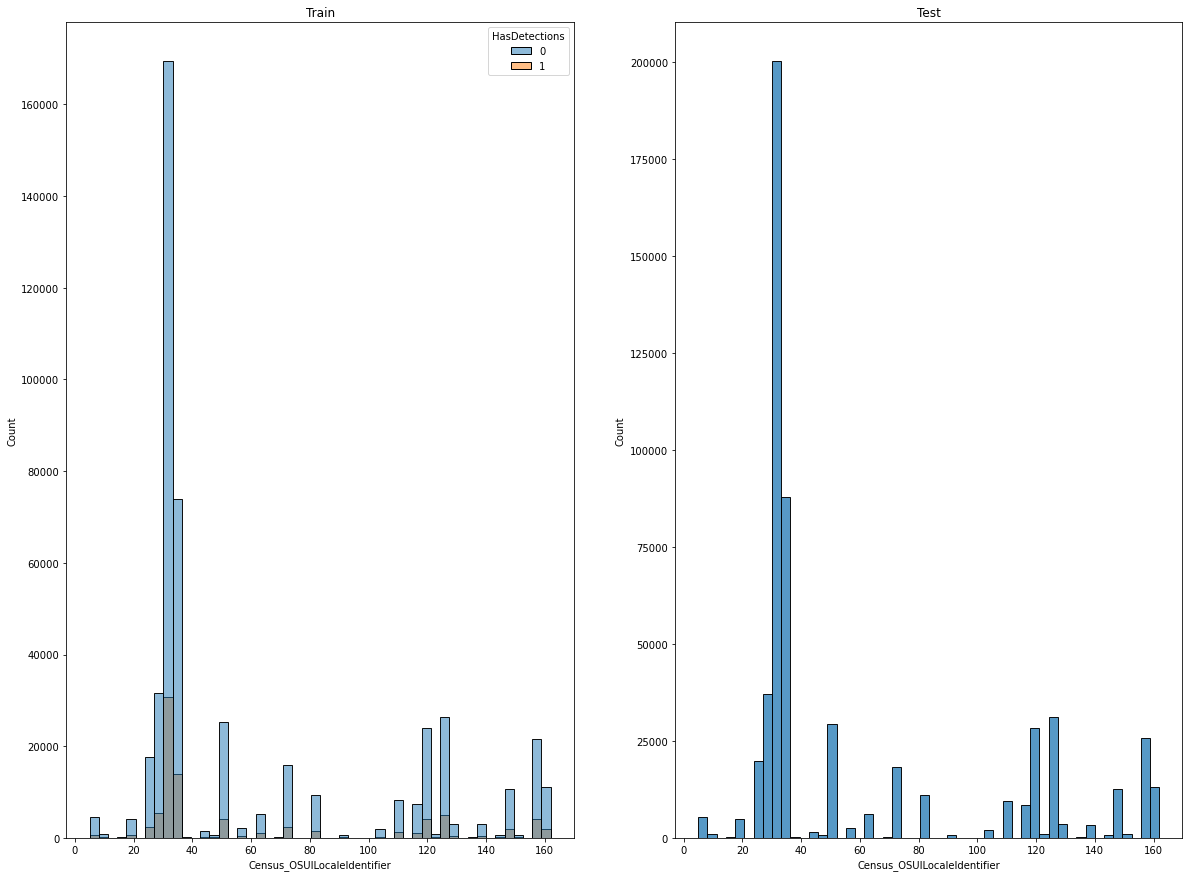

In [122]:
hist_plot("Census_OSUILocaleIdentifier")

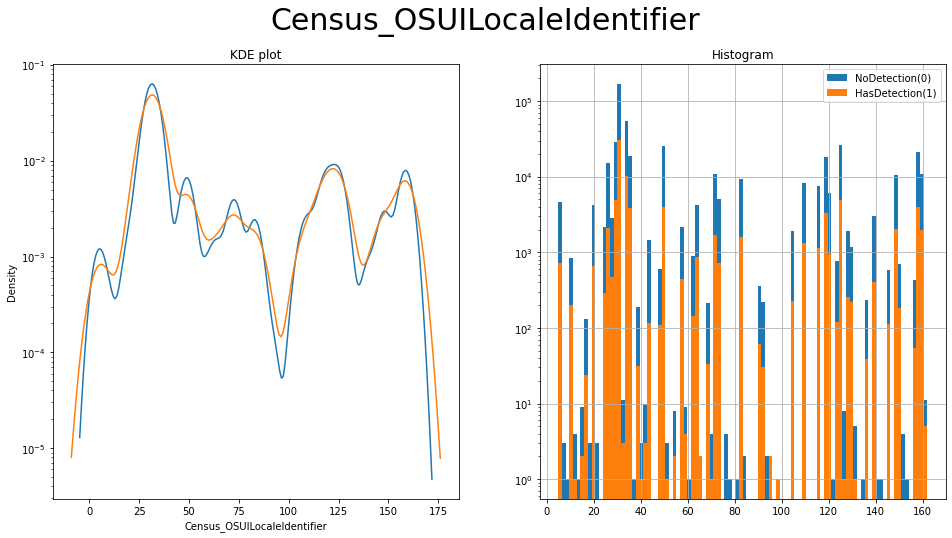

In [123]:
plot_kde_hist_for_numeric("Census_OSUILocaleIdentifier")

# Census_IsPortableOperatingSystem
##  Indicates whether OS is booted up and running via Windows-To-Go on a USB stick.

In [124]:
train["Census_IsPortableOperatingSystem"].isnull().sum()

0

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

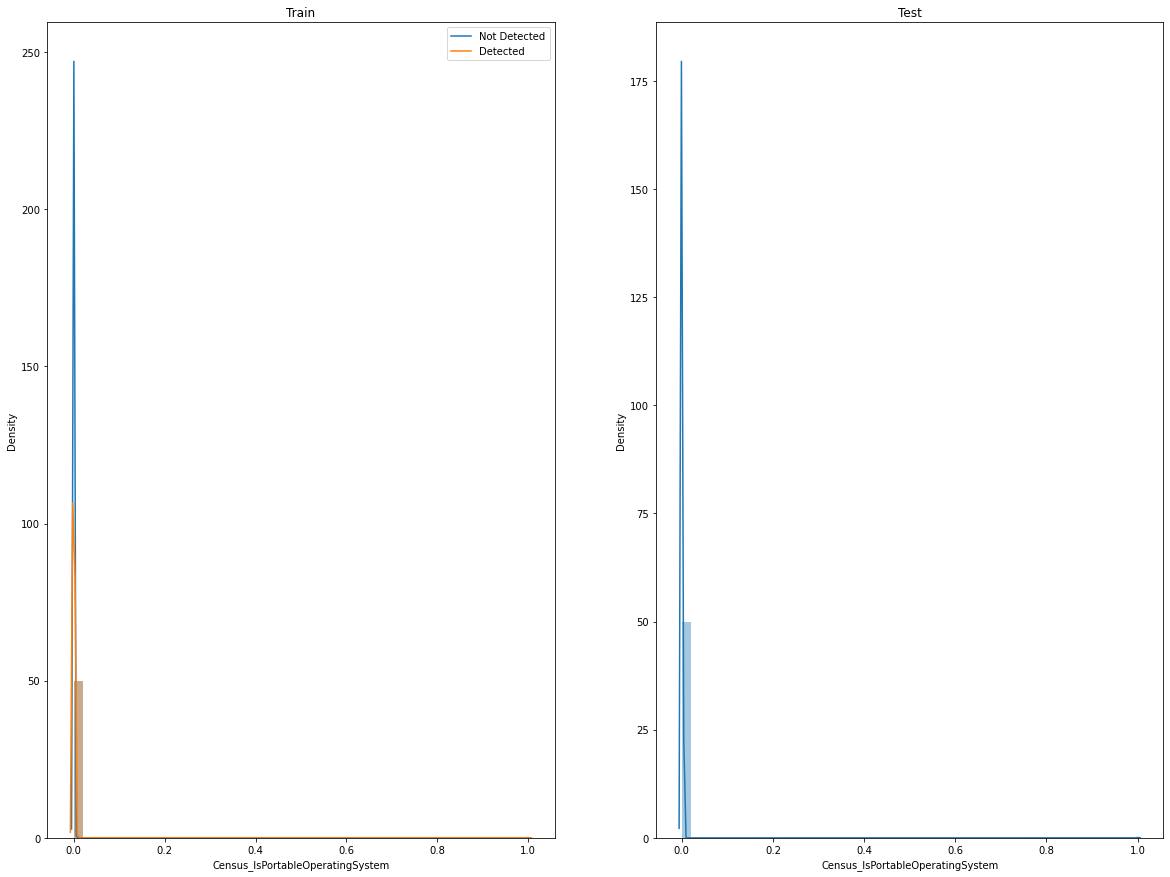

In [125]:
dist_plot("Census_IsPortableOperatingSystem")

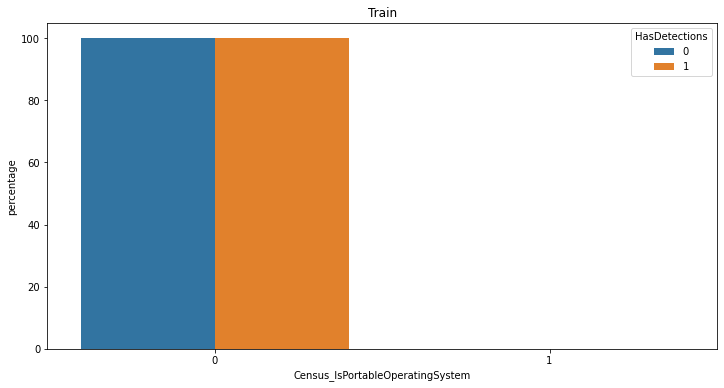

In [126]:
percent_plot("Census_IsPortableOperatingSystem")

In [127]:
# no useful info

In [128]:
numerical_df.columns

Index(['IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild',
       'OsSuite', 'IsProtected', 'AutoSampleOptIn', 'SMode', 'IeVerIdentifier',
       'Firewall', 'UacLuaenable', 'Census_OEMNameIdentifier',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive',
       'Census_TotalPhysicalRAM',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_InternalBatteryNumberOfCharges', 'Census_

# Census_IsFlightsDisabled
##  Indicates if the machine is participating in flighting

In [129]:
train["Census_IsFlightsDisabled"].isnull().sum()

10105

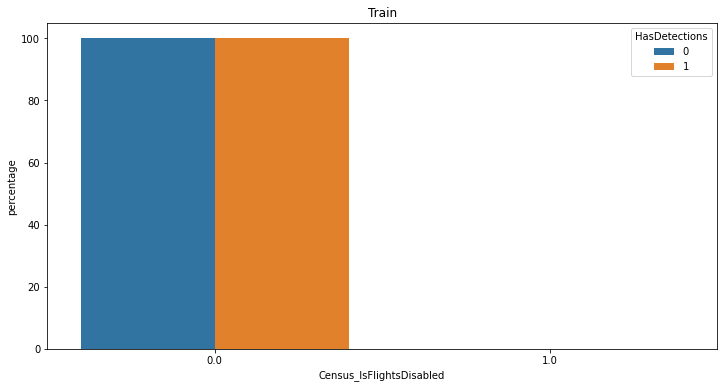

In [130]:
percent_plot("Census_IsFlightsDisabled")

In [131]:
# nothing usefull , fill na with 0

# Census_ThresholdOptIn
## NA

In [132]:
train["Census_ThresholdOptIn"].isnull().sum()

358962

In [133]:
# high null value

In [134]:
train["Census_ThresholdOptIn"].unique().shape

(3,)

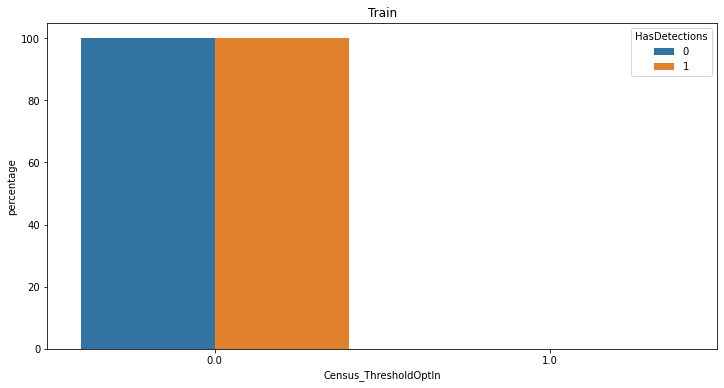

In [135]:
percent_plot("Census_ThresholdOptIn")

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


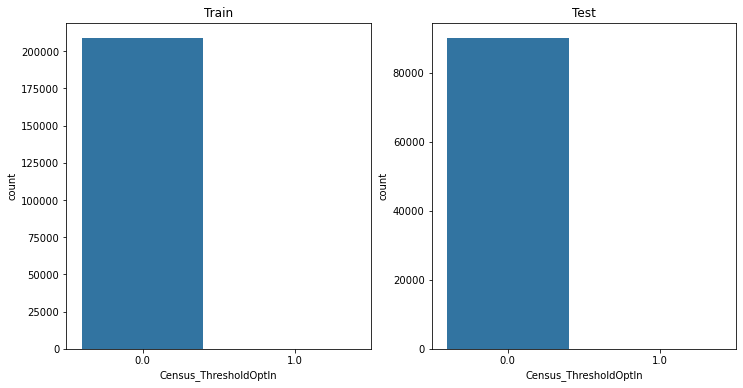

In [136]:
count_plot("Census_ThresholdOptIn")

In [ ]:
# nothing usefull fill na with zero or drop column

# Census_FirmwareManufacturerIdentifier
## NA

In [137]:
train["Census_FirmwareManufacturerIdentifier"].isnull().sum()

12939

In [138]:
train["Census_FirmwareManufacturerIdentifier"].unique().shape

(324,)

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

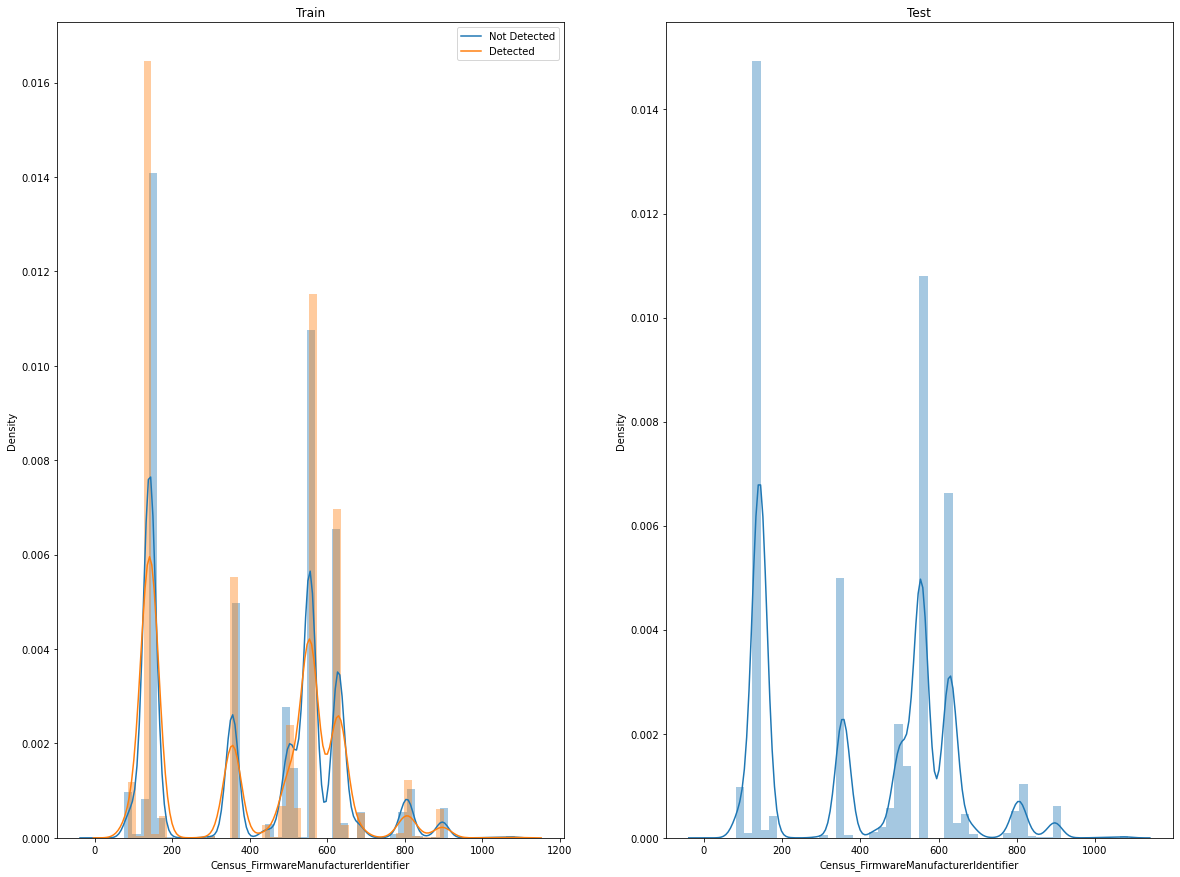

In [139]:
dist_plot("Census_FirmwareManufacturerIdentifier")

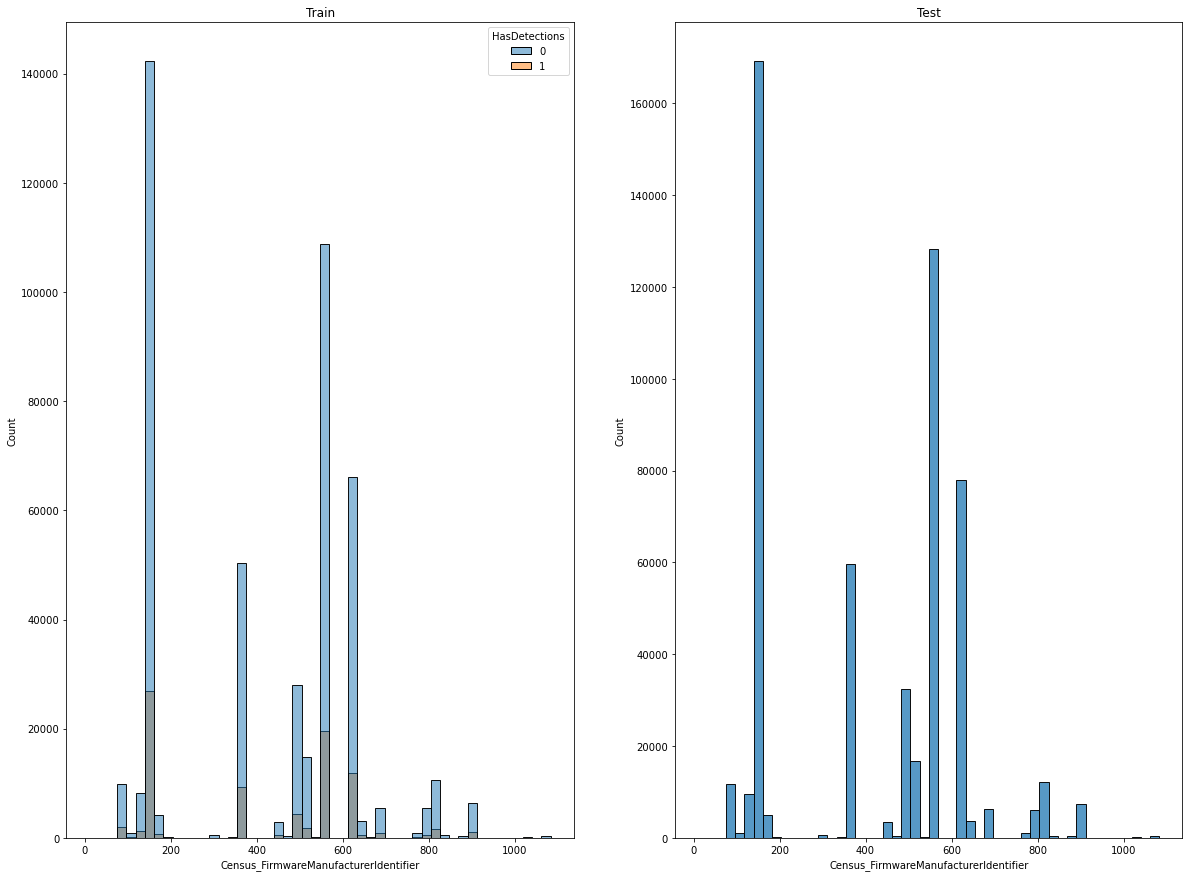

In [140]:
hist_plot("Census_FirmwareManufacturerIdentifier")

In [141]:
# fill na with mean 

# Census_FirmwareVersionIdentifier
# NA

In [142]:
train["Census_FirmwareVersionIdentifier"].isnull().sum()

11320

In [143]:
train["Census_FirmwareVersionIdentifier"].unique().shape

(25030,)

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

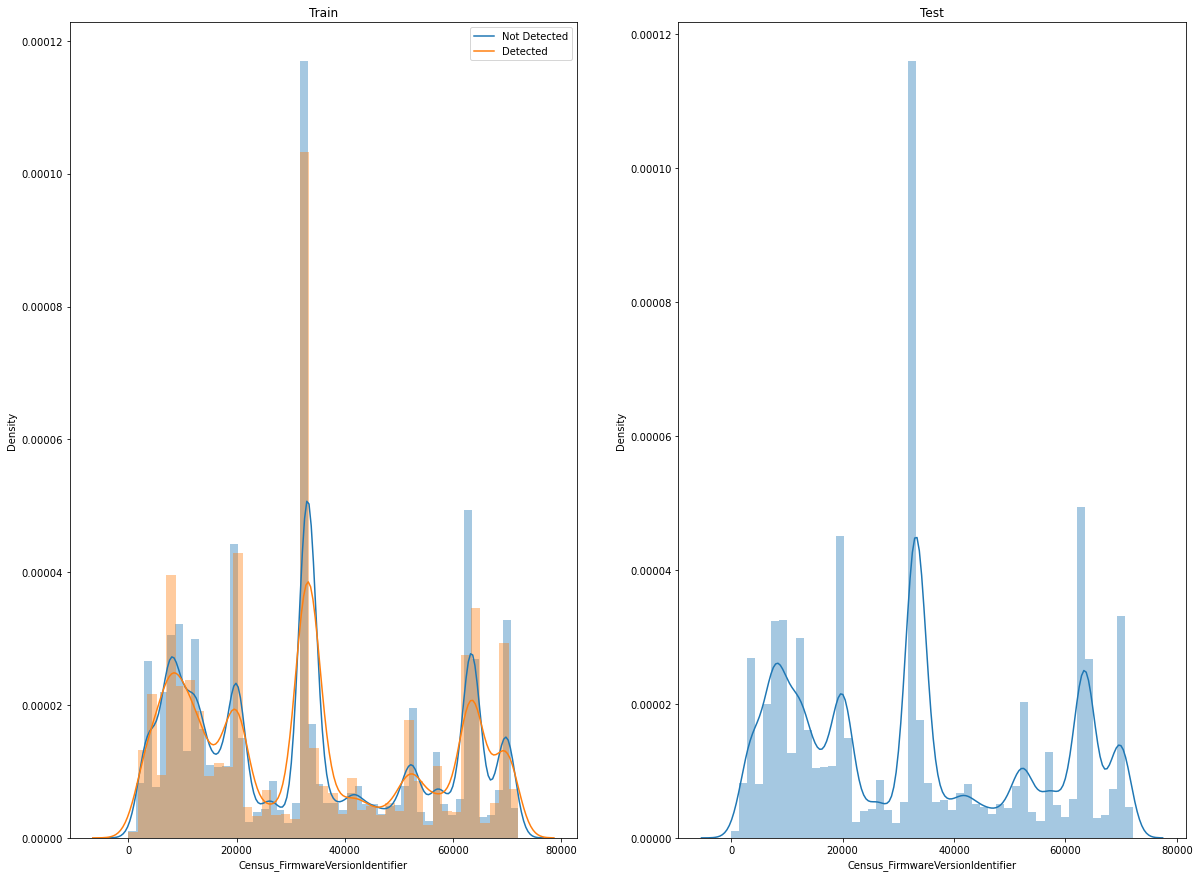

In [144]:
dist_plot("Census_FirmwareVersionIdentifier")

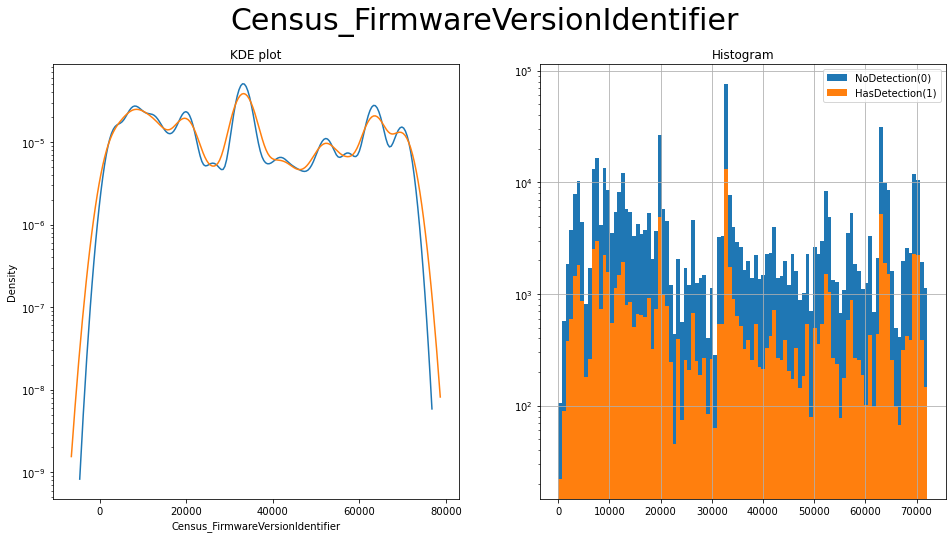

In [145]:
plot_kde_hist_for_numeric("Census_FirmwareVersionIdentifier")

In [ ]:
# fill na with mean

# Census_IsSecureBootEnabled
##  Indicates if Secure Boot mode is enabled

In [146]:
train["Census_IsSecureBootEnabled"].isnull().sum()

0

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

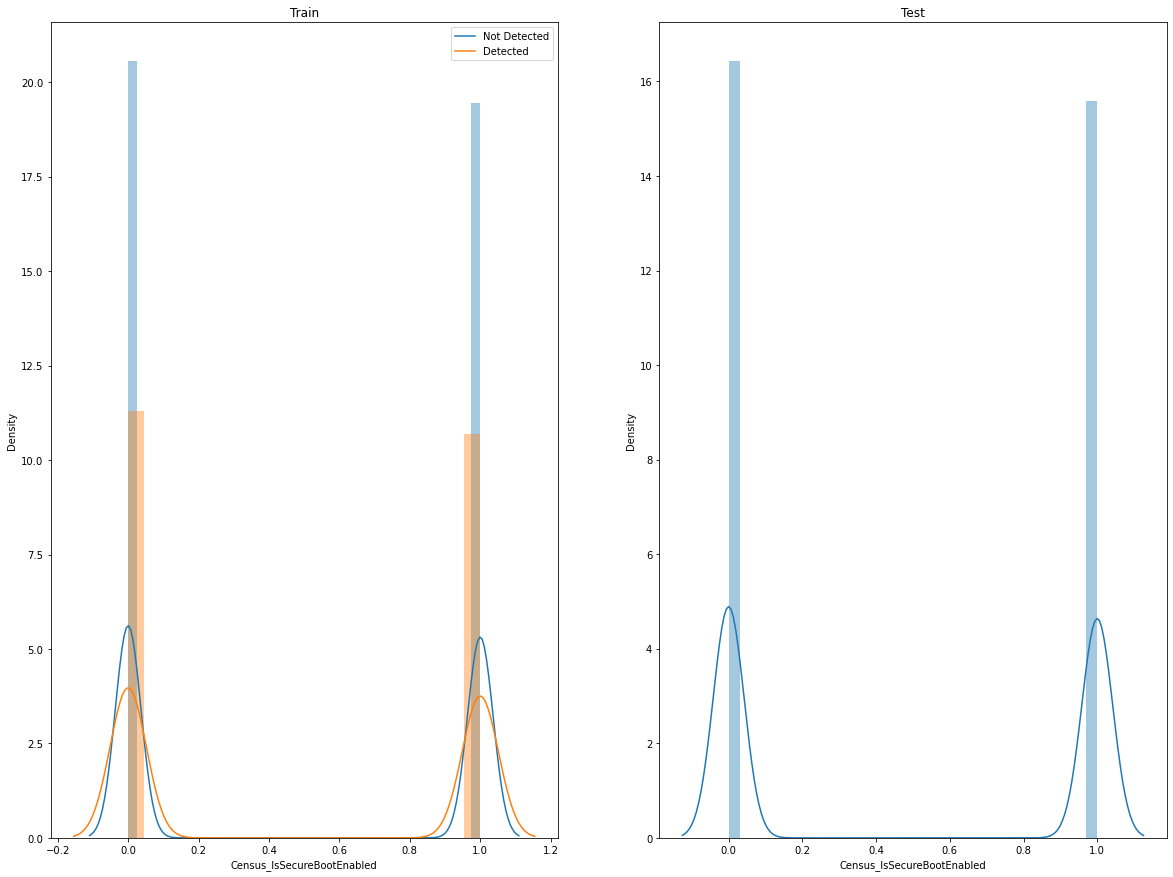

In [147]:
dist_plot("Census_IsSecureBootEnabled")

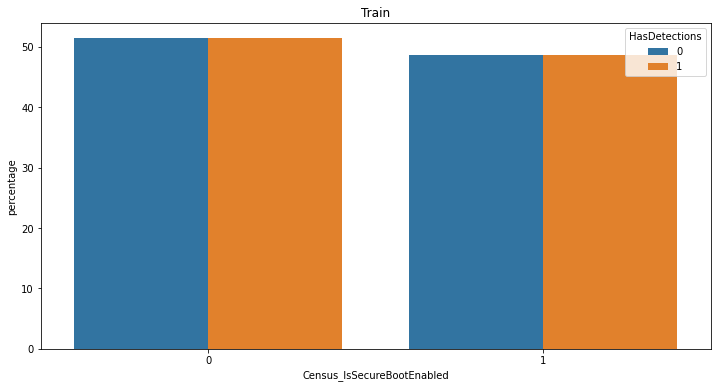

In [148]:
percent_plot("Census_IsSecureBootEnabled")

In [151]:
# fill na , to maintain dist , nothing interesting 

# Census_IsWIMBootEnabled
## NA

In [152]:
train["Census_IsWIMBootEnabled"].isnull().sum()

358433

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


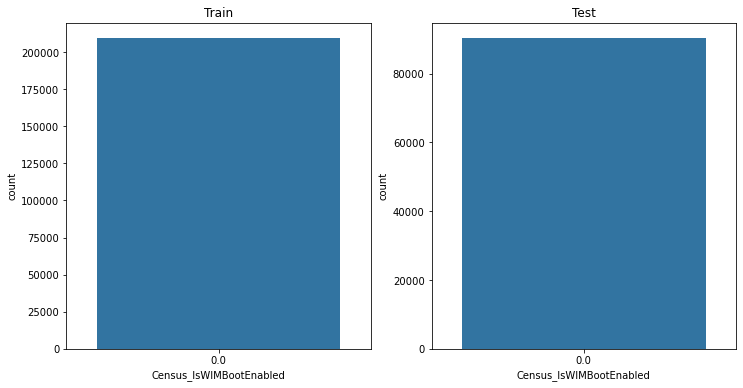

In [153]:
count_plot("Census_IsWIMBootEnabled")

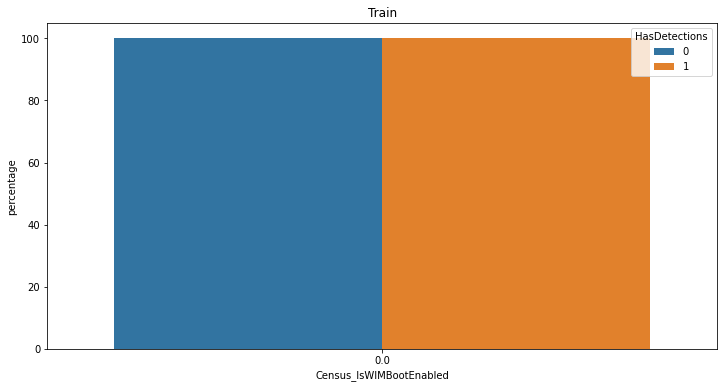

In [154]:
percent_plot("Census_IsWIMBootEnabled")

In [20]:
# only one value present , drop column 

In [21]:
train.drop(["Census_IsWIMBootEnabled"],inplace=True,axis=1)

In [22]:
test.drop(["Census_IsWIMBootEnabled"],inplace=True,axis=1)

# Census_IsVirtualDevice
##  Identifies a Virtual Machine (machine learning model)

In [156]:
train["Census_IsVirtualDevice"].isnull().sum()

1039

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


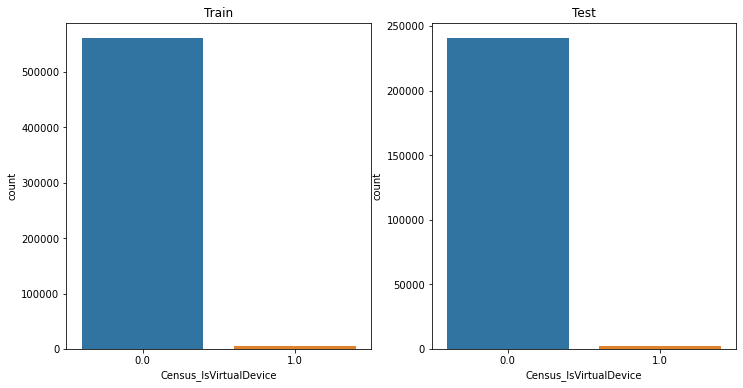

In [157]:
count_plot("Census_IsVirtualDevice")

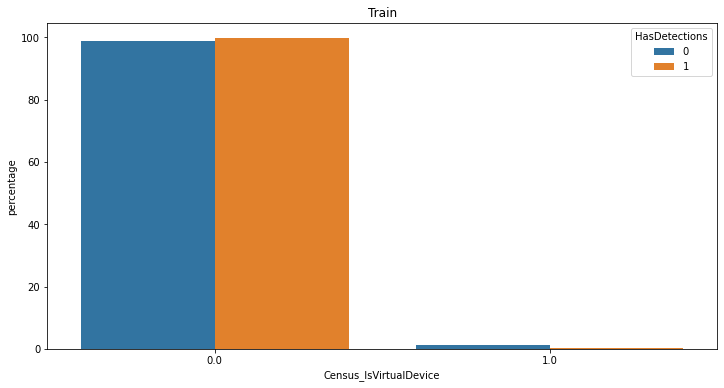

In [158]:
percent_plot("Census_IsVirtualDevice")

In [159]:
# fill na values with mode , nothing interesting can drop col as well

# Census_IsTouchEnabled
## Is this a touch device ?

In [160]:
train["Census_IsTouchEnabled"].isnull().sum()

0

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


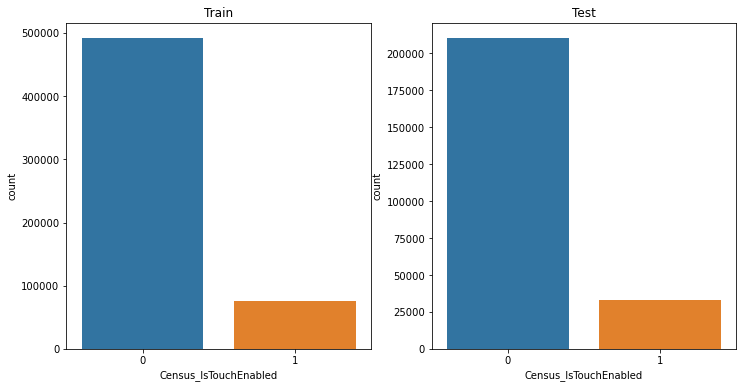

In [161]:
count_plot("Census_IsTouchEnabled")

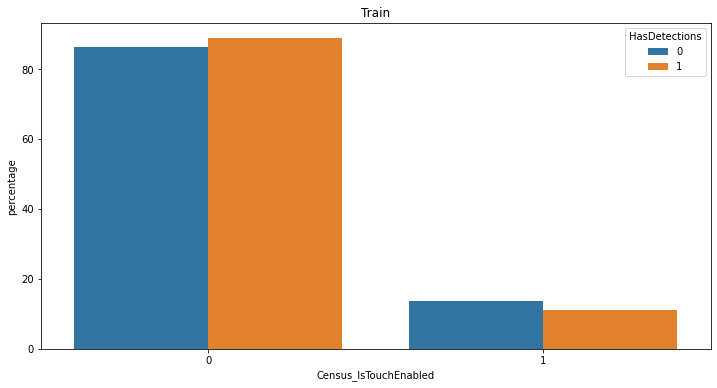

In [162]:
percent_plot("Census_IsTouchEnabled")

# Census_IsPenCapable
## Is the device capable of pen input ?

In [163]:
train["Census_IsPenCapable"].isnull().sum()

0

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


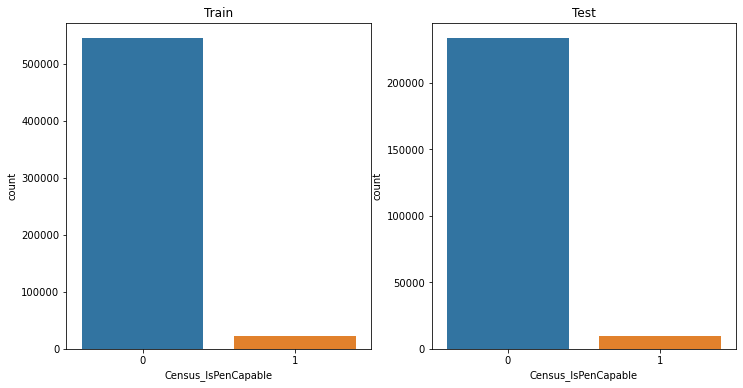

In [164]:
count_plot("Census_IsPenCapable")

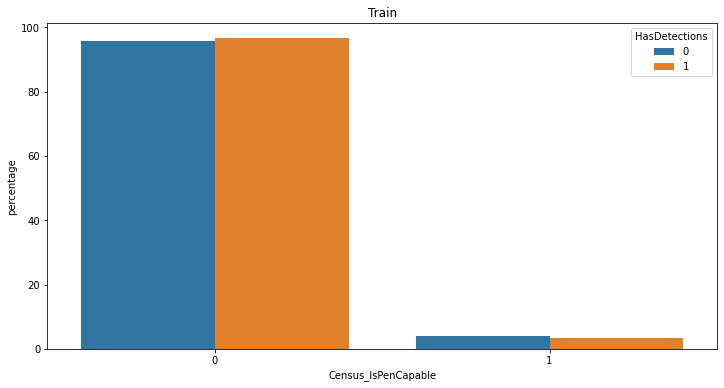

In [165]:
percent_plot("Census_IsPenCapable")

# Census_IsAlwaysOnAlwaysConnectedCapable
##  Retreives information about whether the battery enables the device to be AlwaysOnAlwaysConnected 

In [166]:
train["Census_IsAlwaysOnAlwaysConnectedCapable"].isnull().sum()

4504

In [167]:
train["Census_IsAlwaysOnAlwaysConnectedCapable"].unique().shape

(3,)

/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/abhi/miniconda2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


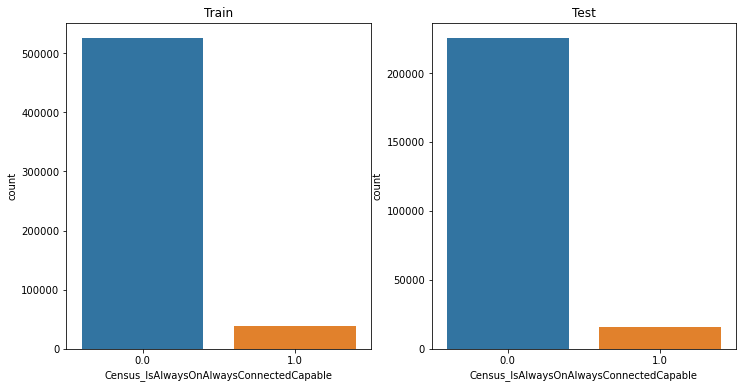

In [168]:
count_plot("Census_IsAlwaysOnAlwaysConnectedCapable")

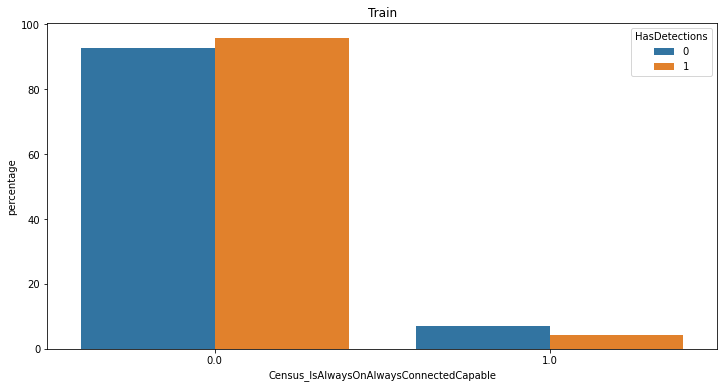

In [169]:
percent_plot("Census_IsAlwaysOnAlwaysConnectedCapable")

In [ ]:
# fill na with mode

In [170]:
numerical_df.columns

Index(['IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild',
       'OsSuite', 'IsProtected', 'AutoSampleOptIn', 'SMode', 'IeVerIdentifier',
       'Firewall', 'UacLuaenable', 'Census_OEMNameIdentifier',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive',
       'Census_TotalPhysicalRAM',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_InternalBatteryNumberOfCharges', 'Census_

# Census_IsFlightingInternal


In [18]:
train["Census_IsFlightingInternal"].value_counts()

0.0    97775
1.0        2
Name: Census_IsFlightingInternal, dtype: int64

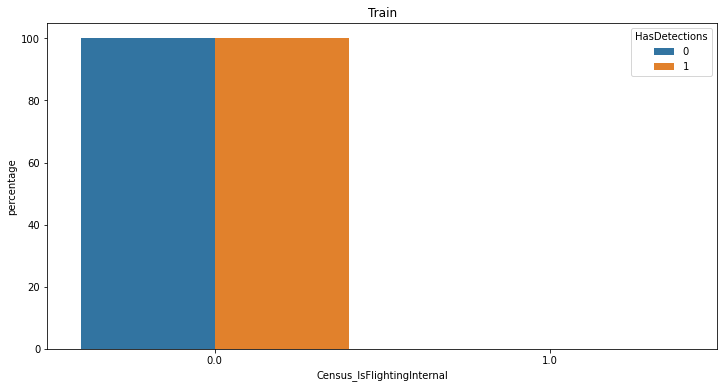

In [19]:
percent_plot("Census_IsFlightingInternal")

In [24]:
train.to_csv("train1.csv")
test.to_csv("test1.csv")

In [ ]:
# END of EDA -----------------